#  CM50265 Machine Learning 2

## Coursework 2: Deep learning
### Youssef Alami Mejjati, Jordan Taylor, Jake Deane and Mohammad Golbabaee


This coursework is worth 75 points from the overall mark of 100 for this unit. Marks are given beside each task. The report will be your main method of assessment. __Students should form groups of 3 individuals and submit one report per group.__ For this coursework students can choose their partners until __20th February__.  Each group will receive a total mark for this course work and individuals in that group will share this mark (with weights) according to their contributions.  

- The __submission deadline__ for your report is
__17th May 2020, 12:00: online Moodle submission of your final report__

The main part of your report should not exceed __3000 word limit__. After the main part please attach a Table of individuals’ contributions and appendices including ONLY the codes (these are excluded from the word limit). The report should be submitted in PDF format. __Table of contributions__ should include both students’ names/university IDs, the list of contributions of each student, and finally the contribution percentage for each student. This percentage should be agreed between both individuals and it will be used to weigh their marks. We highly encourage individuals to evenly share the workload. Further, you should __include all codes__ relevant to your implementations as an appendix or appendices with a clear referencing to the main body of your report. Codes must be well commented (indicating major steps).

First and foremost your report should demonstrate and evaluate your results. It must include figures and screenshots with appropriate resolutions. Evaluation can be qualitative (how it looks) and, wherever possible, quantitative (tested numerically). Second you should provide evidence that you understood the mathematics behind the assignment in each task/question. You should concisely explain your approach to solve each task/question, and the choices you make (e.g. hyper-parameters etc) for each part.

Usual university rules apply, please check your MSc program handbook, particularly regarding plagiarism and delayed deliveries. 

__Note:__ All tasks should be implemented in TensorFlow. Guidelines below (tasks 3-5, 7) should work for a TensorFlow version 1. If you use TF v2 please note that some syntaxes have changed during the recent update, but you can still use version compatiblity to resolve the issue. The list includes but might not be limited to:

tf.layers.conv2d -> tf.nn.conv2d

tf.layers.dense -> tf.nn.dense

tf.layers.flatten -> tf.compat.v1.layers.flatten

tf.variable_scope -> tf.compat.v1.variable_scope

tf.get_collection -> tf.compat.v1.get_collection

similarly for tf.compat.v1.InteractiveSession, tf.compat.v1.train.AdamOptimizer, tf.compat.v1.placeholder, tf.compat.v1.global_variables_initializer, tf.compat.v1.local_variables_initializer, tf.compat.v1.train.Saver, tf.compat.v1.summary.FileWriter, tf.compat.v1.trainable_variables

See TF web documentation in case you encounter version incompatibility. 

Guides on tasks 6 and 8 should be already compatible with TF2. 


## The coursework 


In [4]:
import warnings
warnings.filterwarnings('ignore')

try:
    import tensorflow.compat.v1 as tf
    tf.disable_eager_execution()
except:
    import tensorflow as tf

# import tensorflow as tf # This may laod Tensorflow 2.0.0 if that is the verison of the package on your distribution
#use import tensorflow.compat.v1 as tf for tensorflow 1
# tf.disable_v2_behaviour() # Only needed if using tensorflow 1 with tensorflow 2 being the package avlaiable  
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from IPython.display import Image
%matplotlib inline


In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0]
n_test = x_test.shape[0]

We scale the data to be in $[-1,1]$.

In [3]:
x_train, x_test = x_train / 127.5 - 1, x_test / 127.5 - 1

The size of each data points is $28 \times 28$. While this format will be useful when using CNNs, we will vectorize the datapoints for visualization and preliminary questions.

In [4]:
nb_features = np.prod(x_train.shape[1:])
x_train.resize((n_train, nb_features))
x_test.resize((n_test, nb_features))

### 1. Data visualisation (5 points)
Project the training data points in a 2D space using PCA. Use the obtained 2D embedding and plot the training data-points with different markers or colors for each class (you are allowed to use PCA from scikit learn). 
- Why PCA is a good option to visualize data? 
- Add this plot in your report and discuss your observations. 
- Which classes can be linearly separated?


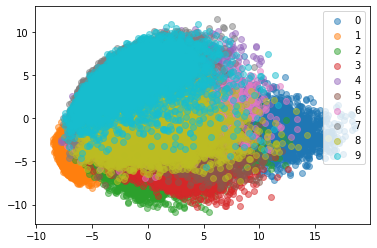

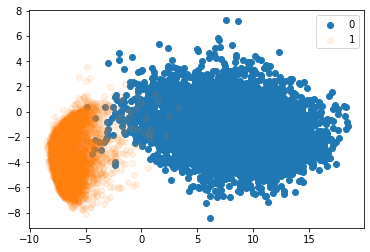

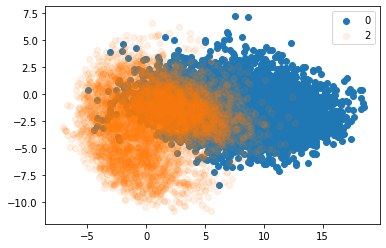

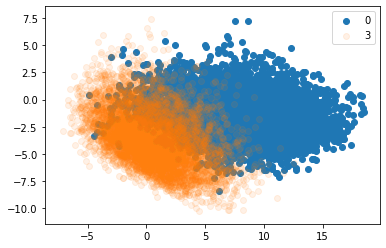

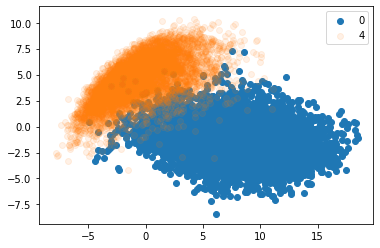

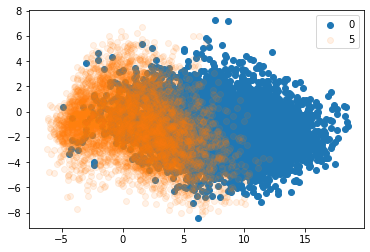

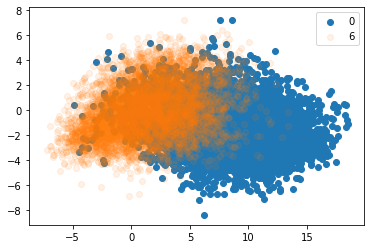

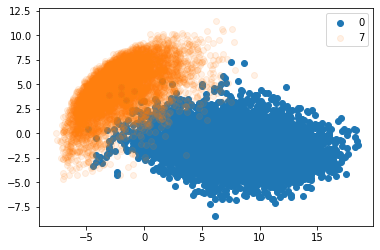

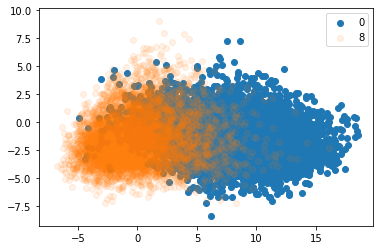

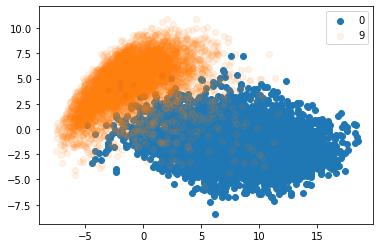

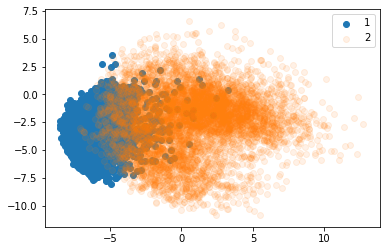

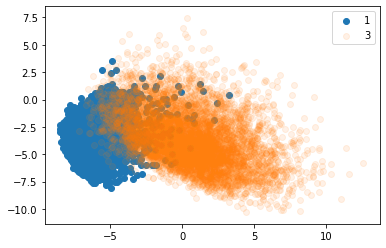

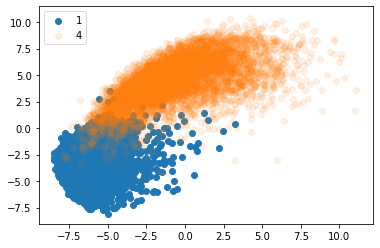

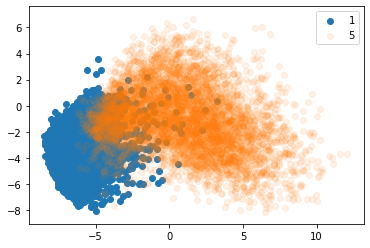

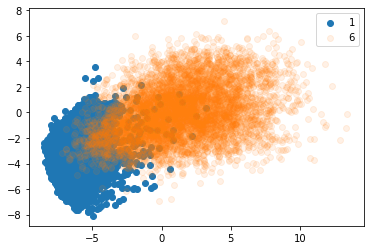

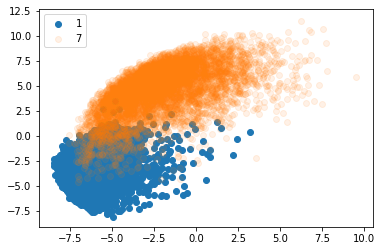

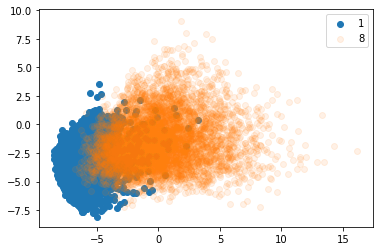

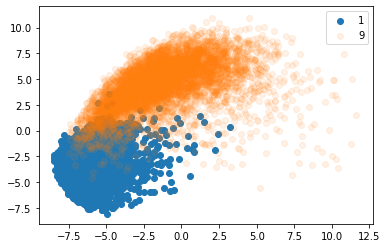

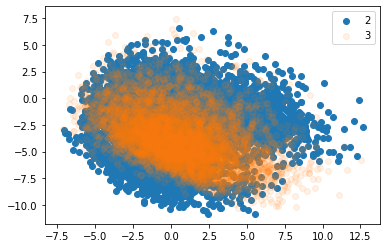

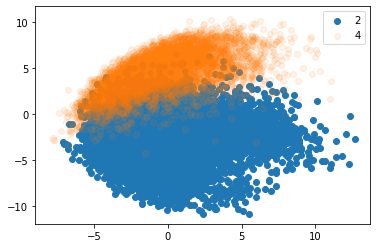

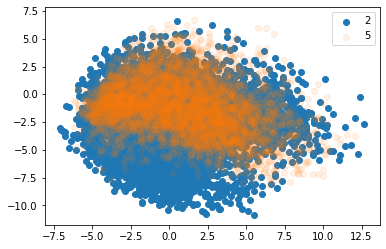

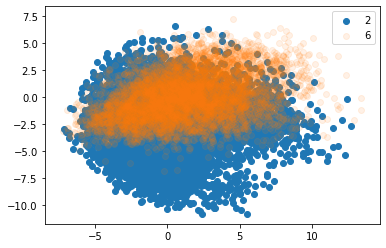

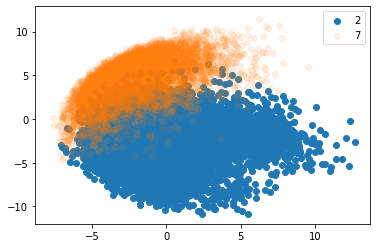

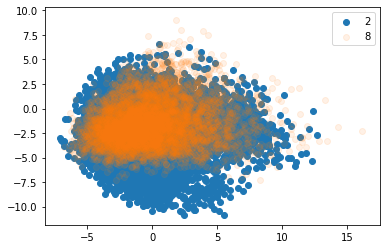

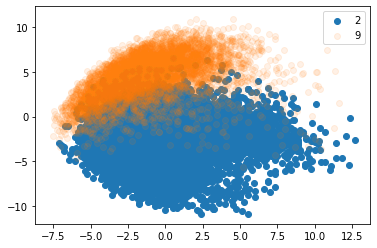

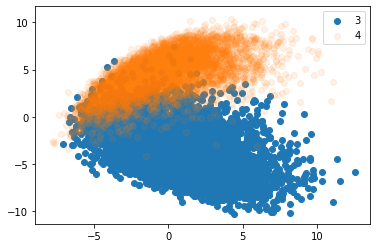

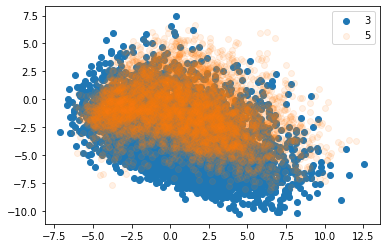

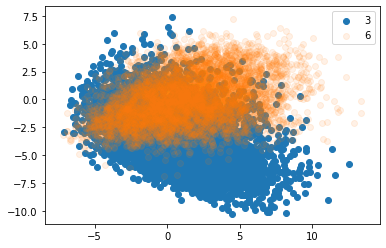

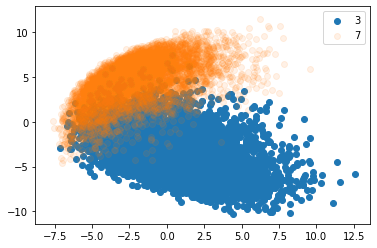

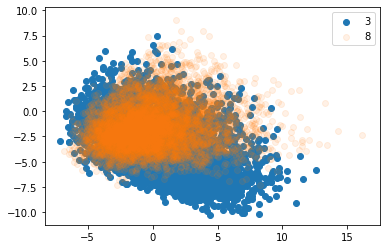

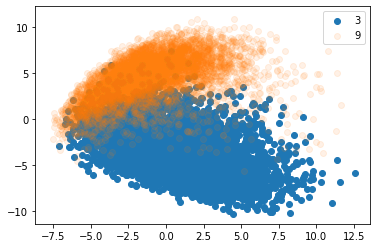

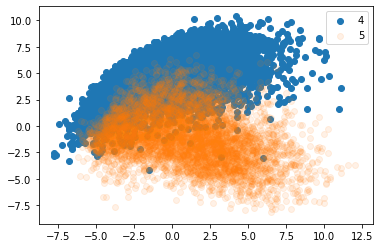

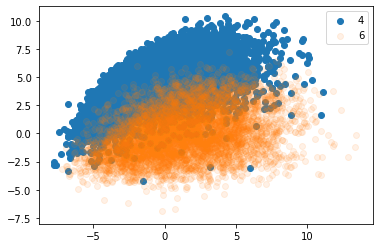

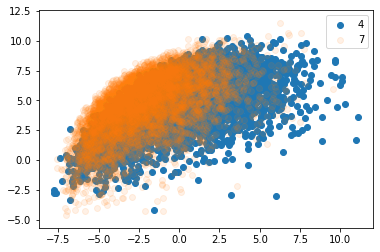

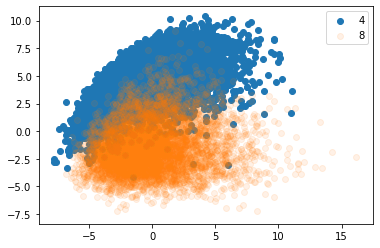

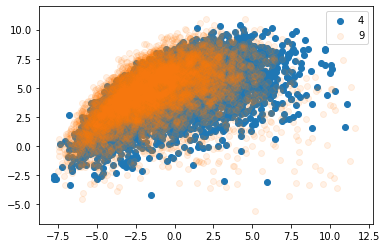

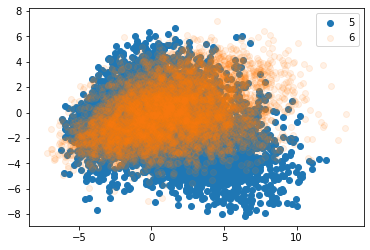

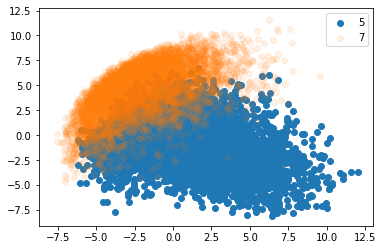

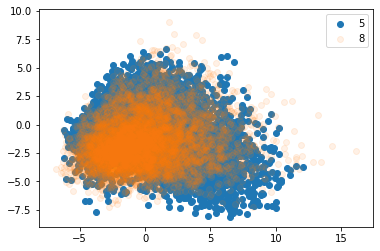

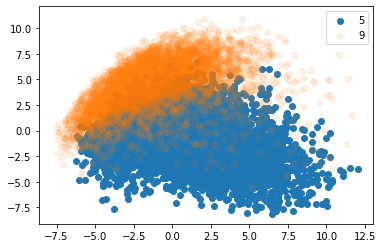

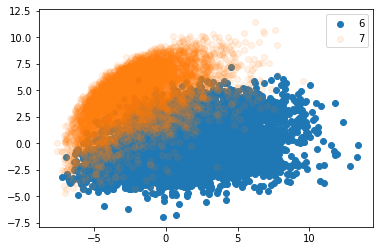

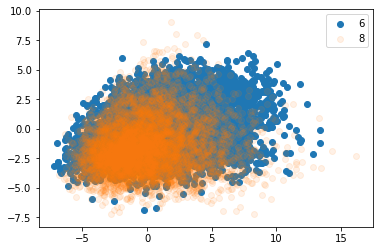

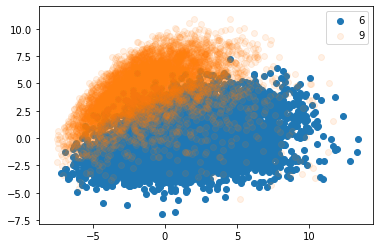

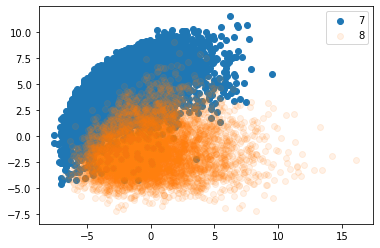

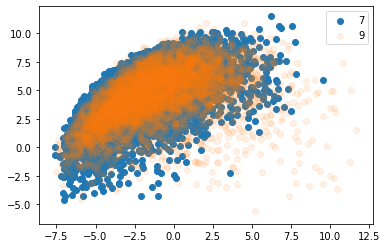

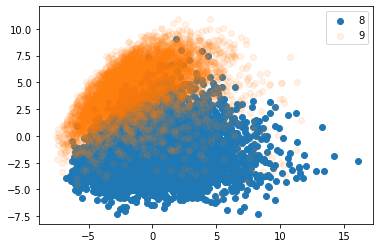

In [9]:
from sklearn.decomposition import PCA
x_pca = PCA(n_components=2).fit_transform(x_train)
items = np.unique(y_train)

for n,item in enumerate(items):
    plt.scatter(x_pca[y_train==item][:,0],x_pca[y_train==item][:,1],label = str(item), alpha=0.5)
plt.legend()
plt.show()

for n,item in enumerate(items):
    for item1 in items[n+1:]:
        plt.scatter(x_pca[y_train==item][:,0],x_pca[y_train==item][:,1],label = str(item))
        plt.scatter(x_pca[y_train==item1][:,0],x_pca[y_train==item1][:,1],label = str(item1),alpha=0.1)
        plt.legend()
        plt.show()



### 2. Perceptrons: (10 points)
Single Layer Perceptron is one of the most basic binary classifiers one can use. In this part of the CW you should implement an iterative algorithm for training the Single Layer Perceptron.

As we are dealing with a binary classification problem, we will pick data points corresponding to classes 0 and 1 (handwritten digits). In addition we choose our binary labels to be -1 and 1, respectively.

In [5]:
cond = (y_train == 0) + (y_train == 1)
binary_x_train = x_train[cond,:]
binary_y_train = y_train[cond]*1.0

In [6]:
binary_y_train[binary_y_train == 0] = -1
binary_y_train[binary_y_train == 1] = 1

#### Task 2.1
Complete the function 'predict' below.
#### inputs:

+ $x\in\mathbb{R^{n*m}}$, with $n$ being the number of datapoints and $m$ being the feature dimensionality. 
+ $w \in\mathbb{R^m}$ is the parameter vector we wish to learn. 
+ $b \in\mathbb{R}$ is the corresponding bias.

#### outputs: 
+ 'prediction'$\in\mathbb{R^n}$, a vector containing prediction values associated with $x$. 

In [12]:
def predict(x, w, b):

    ######### Complete the function- x point ######### 
    prediction = np.sign(x@w+b)
    ######################################
    return prediction


#### Task 2.2
+ Use the funtion 'predict' above to implement the Single Layer Perceptron algorithm by completing the function 'optimize' defined below.
    #### inputs:

    + $x\in\mathbb{R^{n*m}}$, with $n$ being the number of datapoints and $m$ being the feature dimensionality. 
    + $w \in\mathbb{R^m}$ is the initial parameter vector.
    + $b \in\mathbb{R}$ is the initial bias value.
    + $y\in\mathbb{R^n}$ is the training labels associated with x.
    #### outputs:
    + $w$ is the optimized parameter vector.
    + $b$ the corresponding learned bias.
    + $\text{error}$ is the classification error obtained.  
    
    
 
    
Use the learned parameters $w$, $b$ (obtained via function 'optimize') and the function 'predict' to return the classification accuracy on the test set using x_train and y_train as training data. 

- Demonstrate that your algorithm converges to a good local minima. Plot the training error curve vs. number of iterations. 
- Show what feature $w$ has learned and discuss why? (demonstrate $w$ as an image with the same size as inputs).

- Repeat this training/testing procedure to classify different pairs. Report the accuracies of 5 pairs in a Table and dicuss why some are easier to classify than others.


In [13]:
try:
    import cupy as cp     #Using cupy library if available
except:
    import numpy as cp
    
    
def optimize(x, y):
    iter = 0
    x = cp.array(x) #loading variables to GPU if cupy is available
    y = cp.array(y)
    y_logist = y.copy() #y to be used with logsitic regression
    y_logist[y==-1] = 0

    error=np.inf
    n, m = x.shape
    w = cp.random.rand(m)*0 # Initialize the w vector
    b = cp.random.rand()*0  # Initialize the b vector
    alpha = 0.1

    def loss(x,y,w,b):
        temp = x@w+b
        return -temp@y + cp.log(1+cp.exp(temp)).sum()
    
    error_list = [float(cp.mean(cp.sign(x@w+b)!=y)),]
    redo = False
    while (iter <= 1000) & (error > 1e-5):
        ######### Complete the function- x points #########
        if redo == False:
            grad_w = (1/(1+cp.exp(-x@w-b)) - y_logist)@x
            grad_b = (1/(1+cp.exp(-x@w-b)) - y_logist).sum()
        
        temp_w = w - alpha*grad_w
        temp_b = b - alpha*grad_b

        diff = loss(x, y_logist, temp_w, temp_b) - loss(x, y_logist, w, b)
        if diff<0:
            b = temp_b
            w = temp_w
            alpha*=5
        else:
            alpha/=10
            redo == True
            
        error = cp.mean(cp.sign(x@w+b)!=y)
        error_list.append(float(error))
        iter+=1
    try:
        w = cp.asnumpy(w) #converting back to numpy array if cupy was used
        b = cp.asnumpy(b)
    except:
        pass

    return w, b, error_list

Train Accuracy: 0 vs. 1 = 100.00%
Test Accuracy: 0 vs. 1 = 99.95%


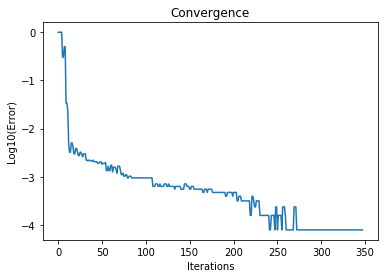

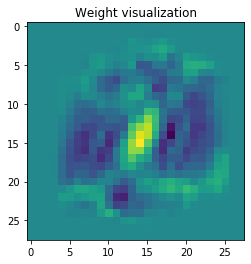

Wall time: 2.34 s


In [14]:
%%time
the_w, the_b, training_error = optimize(binary_x_train, binary_y_train)
cond = (y_test == 0) + (y_test == 1)
binary_x_test = x_test[cond,:]
binary_y_test = y_test[cond]*1.0
binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 1] = 1
    
test_accuracy = np.mean(predict(binary_x_test, the_w, the_b)==binary_y_test)
print("Train Accuracy: {} vs. {} = {:.2f}%".format(0, 1, (1-training_error[-1])*100))
print("Test Accuracy: {} vs. {} = {:.2f}%".format(0, 1, test_accuracy*100))

plt.plot(np.log10(training_error))
plt.xlabel("Iterations")
plt.ylabel("Log10(Error)")
plt.title("Convergence")
plt.show()
plt.imshow(the_w.reshape(28,28))
plt.title("Weight visualization")
plt.show()

Accuracy: 0 vs. 1 = Train: 100.00 | Test: 99.95%
Accuracy: 0 vs. 2 = Train: 99.45 | Test: 99.30%
Accuracy: 0 vs. 3 = Train: 99.75 | Test: 99.80%
Accuracy: 0 vs. 4 = Train: 99.95 | Test: 99.75%
Accuracy: 0 vs. 5 = Train: 99.12 | Test: 99.20%
Accuracy: 0 vs. 6 = Train: 99.58 | Test: 98.92%


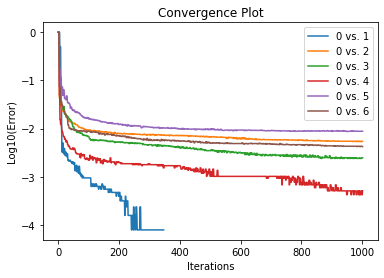

In [15]:
from itertools import combinations
pairs = combinations(np.arange(10), 2)
for pair in list(pairs)[0:6]:
    cond = (y_train == pair[0]) + (y_train == pair[1])
    binary_x_train = x_train[cond,:]
    binary_y_train = y_train[cond]*1.0
    binary_y_train[binary_y_train == pair[0]] = -1
    binary_y_train[binary_y_train == pair[1]] = 1
    
    cond = (y_test == pair[0]) + (y_test == pair[1])
    binary_x_test = x_test[cond,:]
    binary_y_test = y_test[cond]*1.0
    binary_y_test[binary_y_test == pair[0]] = -1
    binary_y_test[binary_y_test == pair[1]] = 1
    
    the_w, the_b, training_error = optimize(binary_x_train, binary_y_train)
    test_accuracy = np.mean(predict(binary_x_test, the_w, the_b)==binary_y_test)
    print("Accuracy: {} vs. {} = Train: {:.2f} | Test: {:.2f}%".format(
          pair[0], pair[1], (1-training_error[-1])*100,test_accuracy*100))
    plt.plot(np.log10(training_error), label="{} vs. {}".format(pair[0], pair[1]))

plt.xlabel("Iterations")
plt.ylabel("Log10(Error)")
plt.legend()
plt.title("Convergence Plot")

plt.show()


### 3: Multi Layer Perceptron (10 points)

Multi Layer Perceptron (MLP) is a fully connected deep (more than one hidden layer) network. In this part of the coursework we will implement a 2 hidden layers MLP with Recified Linear Unit (ReLU) activations. We will train the model via ADAM optimizer over a cross-entropy loss function.

First of all, we will convert our label vectors to matrices via one-hot encoding (e.g. $y=2$ would become $[0,0,1,0,0,0,0,0,0,0]$). This can be simply done using commands below:

In [7]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

Below, we define a class MLP. It is initialized via:  

+ x_train: The training matrix.
+ y_train: One hot encoding of the corresponding labels.
+ lr: Learning rate used for ADAM optimizer
+ nb_epochs: Number of epochs to use
+ batch_size: The number of data point in each mini-batch
+ output_dir: The directory where model parameters and tensorboard event files will be stored.

We also define the methods: 
* 'create_model' which will desribe a neural network architecture of the form $[784, 1000, 1000, 10]$, each integer representing the number of neurons in a given layer while the length of the vector defines the number of layers accordingly. 
* 'compute_loss' which given the output of 'create_model' will calculate the cross-entropy loss of the mini-batches.
* 'train' where we initiate a tensorflow session and perform the training iterations. 
* 'test' where we load our trained model and perform inference on the test set.

##### Task 3.1
- Complete the method 'create_model' in order to implement a network of the shape $[784, 1000, 1000, 10]$, use ReLU as the non linear activation for hidden layers.

   The function 'create_model' to complete defines the class variables: 

   + self.logits $\in \mathbb{R^{10}}$ containing the output __<font color='red'>without activation of the MLP.</font>__
   + self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.

- Using self.logits complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss. 

Hints: 
- You may use tf.layers.dense to implement a fully connected layer. 
- To obtain the probabilities you must normalize your outputs in a way that their sum is equal to one using a softmax function.

In [17]:
class MLP:
    def __init__(self, x_train, y_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.nb_features = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.placeholder(tf.float32, [None, 784])
        self.labels = tf.placeholder(tf.float32, [None, 10])
        self.x_train = x_train
        self.y_train = y_train
        
    def create_model(self):
        with tf.variable_scope('MLP', reuse=tf.AUTO_REUSE):
        ######### Complete the function ######### 
            self.l1 = tf.layers.Dense(784)(self.im)
            self.l2 = tf.layers.Dense(1000, activation='relu')(self.l1)
            self.l3 = tf.layers.Dense(1000, activation='relu')(self.l2)
            
            self.logits = tf.layers.Dense(10)(self.l3)
            self.preds = tf.nn.softmax(self.logits)
            
        #########################################
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.labels, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss)
            
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

Now that we defined our model, our loss and its optimizer. we can instantate the MLP class, initiate our variables, and start the tensorflow session:

In [18]:
tf.reset_default_graph()
model = MLP(x_train, y_train, './MLP_logdir/', 0.001, 10, 100)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary = tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



We can now start training. We loop over the training data points and we feed them to the session in mini-batches form. we repeat this process several times (for several epochs). 

In [19]:
%%time
for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in = model.y_train[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train = y_in[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds, loss, loss_summ = sess.run([model.trainer, model.preds, model.loss, model.loss_summ], 
                                 feed_dict={model.im: input_x_train, 
                                            model.labels: input_y_train})
        y_preds = np.argmax(preds, axis=1)
        y_real = np.argmax(input_y_train, axis=1)
        acc_train = np.mean((y_preds==y_real)*1)
        print('Epoch %d, Iteration %d, loss %.3f, batch accuracy %.3f' %(epoch, i, loss, acc_train))
        writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch)  
# sess.close()

Epoch 0, Iteration 0, loss 2.399, batch accuracy 0.080
Epoch 0, Iteration 1, loss 4.511, batch accuracy 0.260
Epoch 0, Iteration 2, loss 4.171, batch accuracy 0.210
Epoch 0, Iteration 3, loss 2.882, batch accuracy 0.290
Epoch 0, Iteration 4, loss 2.730, batch accuracy 0.260
Epoch 0, Iteration 5, loss 2.327, batch accuracy 0.430
Epoch 0, Iteration 6, loss 1.663, batch accuracy 0.360
Epoch 0, Iteration 7, loss 1.442, batch accuracy 0.540
Epoch 0, Iteration 8, loss 1.037, batch accuracy 0.620
Epoch 0, Iteration 9, loss 0.998, batch accuracy 0.640
Epoch 0, Iteration 10, loss 0.768, batch accuracy 0.720
Epoch 0, Iteration 11, loss 0.666, batch accuracy 0.780
Epoch 0, Iteration 12, loss 0.760, batch accuracy 0.760
Epoch 0, Iteration 13, loss 0.681, batch accuracy 0.760
Epoch 0, Iteration 14, loss 1.024, batch accuracy 0.650
Epoch 0, Iteration 15, loss 0.594, batch accuracy 0.760
Epoch 0, Iteration 16, loss 0.703, batch accuracy 0.790
Epoch 0, Iteration 17, loss 0.634, batch accuracy 0.820
Ep

Epoch 0, Iteration 172, loss 0.311, batch accuracy 0.900
Epoch 0, Iteration 173, loss 0.253, batch accuracy 0.930
Epoch 0, Iteration 174, loss 0.267, batch accuracy 0.920
Epoch 0, Iteration 175, loss 0.101, batch accuracy 0.980
Epoch 0, Iteration 176, loss 0.273, batch accuracy 0.920
Epoch 0, Iteration 177, loss 0.379, batch accuracy 0.910
Epoch 0, Iteration 178, loss 0.139, batch accuracy 0.950
Epoch 0, Iteration 179, loss 0.160, batch accuracy 0.970
Epoch 0, Iteration 180, loss 0.246, batch accuracy 0.920
Epoch 0, Iteration 181, loss 0.155, batch accuracy 0.960
Epoch 0, Iteration 182, loss 0.275, batch accuracy 0.890
Epoch 0, Iteration 183, loss 0.389, batch accuracy 0.870
Epoch 0, Iteration 184, loss 0.308, batch accuracy 0.910
Epoch 0, Iteration 185, loss 0.266, batch accuracy 0.900
Epoch 0, Iteration 186, loss 0.348, batch accuracy 0.910
Epoch 0, Iteration 187, loss 0.336, batch accuracy 0.890
Epoch 0, Iteration 188, loss 0.122, batch accuracy 0.950
Epoch 0, Iteration 189, loss 0.

Epoch 0, Iteration 343, loss 0.299, batch accuracy 0.900
Epoch 0, Iteration 344, loss 0.254, batch accuracy 0.900
Epoch 0, Iteration 345, loss 0.416, batch accuracy 0.900
Epoch 0, Iteration 346, loss 0.209, batch accuracy 0.940
Epoch 0, Iteration 347, loss 0.218, batch accuracy 0.960
Epoch 0, Iteration 348, loss 0.222, batch accuracy 0.940
Epoch 0, Iteration 349, loss 0.168, batch accuracy 0.950
Epoch 0, Iteration 350, loss 0.232, batch accuracy 0.930
Epoch 0, Iteration 351, loss 0.186, batch accuracy 0.940
Epoch 0, Iteration 352, loss 0.290, batch accuracy 0.900
Epoch 0, Iteration 353, loss 0.335, batch accuracy 0.910
Epoch 0, Iteration 354, loss 0.307, batch accuracy 0.900
Epoch 0, Iteration 355, loss 0.118, batch accuracy 0.970
Epoch 0, Iteration 356, loss 0.177, batch accuracy 0.950
Epoch 0, Iteration 357, loss 0.200, batch accuracy 0.960
Epoch 0, Iteration 358, loss 0.194, batch accuracy 0.950
Epoch 0, Iteration 359, loss 0.198, batch accuracy 0.940
Epoch 0, Iteration 360, loss 0.

Epoch 0, Iteration 517, loss 0.208, batch accuracy 0.920
Epoch 0, Iteration 518, loss 0.130, batch accuracy 0.960
Epoch 0, Iteration 519, loss 0.187, batch accuracy 0.970
Epoch 0, Iteration 520, loss 0.082, batch accuracy 0.980
Epoch 0, Iteration 521, loss 0.298, batch accuracy 0.920
Epoch 0, Iteration 522, loss 0.102, batch accuracy 0.980
Epoch 0, Iteration 523, loss 0.189, batch accuracy 0.950
Epoch 0, Iteration 524, loss 0.155, batch accuracy 0.960
Epoch 0, Iteration 525, loss 0.202, batch accuracy 0.930
Epoch 0, Iteration 526, loss 0.222, batch accuracy 0.910
Epoch 0, Iteration 527, loss 0.128, batch accuracy 0.970
Epoch 0, Iteration 528, loss 0.168, batch accuracy 0.950
Epoch 0, Iteration 529, loss 0.218, batch accuracy 0.930
Epoch 0, Iteration 530, loss 0.158, batch accuracy 0.920
Epoch 0, Iteration 531, loss 0.088, batch accuracy 0.970
Epoch 0, Iteration 532, loss 0.108, batch accuracy 0.970
Epoch 0, Iteration 533, loss 0.107, batch accuracy 0.940
Epoch 0, Iteration 534, loss 0.

Epoch 1, Iteration 80, loss 0.120, batch accuracy 0.960
Epoch 1, Iteration 81, loss 0.099, batch accuracy 0.980
Epoch 1, Iteration 82, loss 0.088, batch accuracy 0.970
Epoch 1, Iteration 83, loss 0.330, batch accuracy 0.910
Epoch 1, Iteration 84, loss 0.035, batch accuracy 0.990
Epoch 1, Iteration 85, loss 0.227, batch accuracy 0.940
Epoch 1, Iteration 86, loss 0.238, batch accuracy 0.940
Epoch 1, Iteration 87, loss 0.065, batch accuracy 0.990
Epoch 1, Iteration 88, loss 0.135, batch accuracy 0.960
Epoch 1, Iteration 89, loss 0.149, batch accuracy 0.960
Epoch 1, Iteration 90, loss 0.079, batch accuracy 0.980
Epoch 1, Iteration 91, loss 0.128, batch accuracy 0.960
Epoch 1, Iteration 92, loss 0.190, batch accuracy 0.930
Epoch 1, Iteration 93, loss 0.102, batch accuracy 0.970
Epoch 1, Iteration 94, loss 0.133, batch accuracy 0.970
Epoch 1, Iteration 95, loss 0.116, batch accuracy 0.970
Epoch 1, Iteration 96, loss 0.108, batch accuracy 0.960
Epoch 1, Iteration 97, loss 0.106, batch accurac

Epoch 1, Iteration 256, loss 0.233, batch accuracy 0.950
Epoch 1, Iteration 257, loss 0.065, batch accuracy 0.980
Epoch 1, Iteration 258, loss 0.174, batch accuracy 0.910
Epoch 1, Iteration 259, loss 0.075, batch accuracy 0.970
Epoch 1, Iteration 260, loss 0.226, batch accuracy 0.920
Epoch 1, Iteration 261, loss 0.270, batch accuracy 0.910
Epoch 1, Iteration 262, loss 0.203, batch accuracy 0.930
Epoch 1, Iteration 263, loss 0.239, batch accuracy 0.950
Epoch 1, Iteration 264, loss 0.128, batch accuracy 0.960
Epoch 1, Iteration 265, loss 0.195, batch accuracy 0.920
Epoch 1, Iteration 266, loss 0.250, batch accuracy 0.940
Epoch 1, Iteration 267, loss 0.054, batch accuracy 0.990
Epoch 1, Iteration 268, loss 0.111, batch accuracy 0.970
Epoch 1, Iteration 269, loss 0.074, batch accuracy 0.980
Epoch 1, Iteration 270, loss 0.103, batch accuracy 0.980
Epoch 1, Iteration 271, loss 0.110, batch accuracy 0.970
Epoch 1, Iteration 272, loss 0.090, batch accuracy 0.980
Epoch 1, Iteration 273, loss 0.

Epoch 1, Iteration 427, loss 0.173, batch accuracy 0.950
Epoch 1, Iteration 428, loss 0.159, batch accuracy 0.960
Epoch 1, Iteration 429, loss 0.050, batch accuracy 0.980
Epoch 1, Iteration 430, loss 0.166, batch accuracy 0.930
Epoch 1, Iteration 431, loss 0.095, batch accuracy 0.950
Epoch 1, Iteration 432, loss 0.181, batch accuracy 0.960
Epoch 1, Iteration 433, loss 0.115, batch accuracy 0.940
Epoch 1, Iteration 434, loss 0.124, batch accuracy 0.990
Epoch 1, Iteration 435, loss 0.176, batch accuracy 0.960
Epoch 1, Iteration 436, loss 0.123, batch accuracy 0.960
Epoch 1, Iteration 437, loss 0.045, batch accuracy 0.980
Epoch 1, Iteration 438, loss 0.244, batch accuracy 0.950
Epoch 1, Iteration 439, loss 0.354, batch accuracy 0.910
Epoch 1, Iteration 440, loss 0.150, batch accuracy 0.940
Epoch 1, Iteration 441, loss 0.164, batch accuracy 0.940
Epoch 1, Iteration 442, loss 0.080, batch accuracy 0.990
Epoch 1, Iteration 443, loss 0.061, batch accuracy 0.980
Epoch 1, Iteration 444, loss 0.

Epoch 2, Iteration 0, loss 0.152, batch accuracy 0.950
Epoch 2, Iteration 1, loss 0.067, batch accuracy 0.990
Epoch 2, Iteration 2, loss 0.078, batch accuracy 0.980
Epoch 2, Iteration 3, loss 0.099, batch accuracy 0.970
Epoch 2, Iteration 4, loss 0.128, batch accuracy 0.950
Epoch 2, Iteration 5, loss 0.035, batch accuracy 0.990
Epoch 2, Iteration 6, loss 0.064, batch accuracy 0.980
Epoch 2, Iteration 7, loss 0.075, batch accuracy 0.970
Epoch 2, Iteration 8, loss 0.051, batch accuracy 0.980
Epoch 2, Iteration 9, loss 0.126, batch accuracy 0.960
Epoch 2, Iteration 10, loss 0.161, batch accuracy 0.950
Epoch 2, Iteration 11, loss 0.036, batch accuracy 0.990
Epoch 2, Iteration 12, loss 0.152, batch accuracy 0.930
Epoch 2, Iteration 13, loss 0.024, batch accuracy 1.000
Epoch 2, Iteration 14, loss 0.158, batch accuracy 0.940
Epoch 2, Iteration 15, loss 0.154, batch accuracy 0.940
Epoch 2, Iteration 16, loss 0.084, batch accuracy 0.960
Epoch 2, Iteration 17, loss 0.040, batch accuracy 0.990
Ep

Epoch 2, Iteration 163, loss 0.076, batch accuracy 0.970
Epoch 2, Iteration 164, loss 0.063, batch accuracy 0.980
Epoch 2, Iteration 165, loss 0.057, batch accuracy 0.990
Epoch 2, Iteration 166, loss 0.267, batch accuracy 0.920
Epoch 2, Iteration 167, loss 0.130, batch accuracy 0.940
Epoch 2, Iteration 168, loss 0.060, batch accuracy 0.970
Epoch 2, Iteration 169, loss 0.106, batch accuracy 0.970
Epoch 2, Iteration 170, loss 0.142, batch accuracy 0.970
Epoch 2, Iteration 171, loss 0.115, batch accuracy 0.950
Epoch 2, Iteration 172, loss 0.062, batch accuracy 0.980
Epoch 2, Iteration 173, loss 0.096, batch accuracy 0.970
Epoch 2, Iteration 174, loss 0.026, batch accuracy 1.000
Epoch 2, Iteration 175, loss 0.084, batch accuracy 0.970
Epoch 2, Iteration 176, loss 0.034, batch accuracy 0.980
Epoch 2, Iteration 177, loss 0.116, batch accuracy 0.960
Epoch 2, Iteration 178, loss 0.048, batch accuracy 0.980
Epoch 2, Iteration 179, loss 0.163, batch accuracy 0.950
Epoch 2, Iteration 180, loss 0.

Epoch 2, Iteration 329, loss 0.165, batch accuracy 0.940
Epoch 2, Iteration 330, loss 0.179, batch accuracy 0.950
Epoch 2, Iteration 331, loss 0.205, batch accuracy 0.950
Epoch 2, Iteration 332, loss 0.097, batch accuracy 0.980
Epoch 2, Iteration 333, loss 0.023, batch accuracy 1.000
Epoch 2, Iteration 334, loss 0.133, batch accuracy 0.970
Epoch 2, Iteration 335, loss 0.066, batch accuracy 0.960
Epoch 2, Iteration 336, loss 0.125, batch accuracy 0.960
Epoch 2, Iteration 337, loss 0.080, batch accuracy 0.970
Epoch 2, Iteration 338, loss 0.044, batch accuracy 0.990
Epoch 2, Iteration 339, loss 0.115, batch accuracy 0.960
Epoch 2, Iteration 340, loss 0.119, batch accuracy 0.970
Epoch 2, Iteration 341, loss 0.129, batch accuracy 0.960
Epoch 2, Iteration 342, loss 0.212, batch accuracy 0.930
Epoch 2, Iteration 343, loss 0.066, batch accuracy 0.970
Epoch 2, Iteration 344, loss 0.088, batch accuracy 0.980
Epoch 2, Iteration 345, loss 0.143, batch accuracy 0.960
Epoch 2, Iteration 346, loss 0.

Epoch 2, Iteration 496, loss 0.168, batch accuracy 0.960
Epoch 2, Iteration 497, loss 0.152, batch accuracy 0.960
Epoch 2, Iteration 498, loss 0.117, batch accuracy 0.970
Epoch 2, Iteration 499, loss 0.106, batch accuracy 0.970
Epoch 2, Iteration 500, loss 0.054, batch accuracy 0.990
Epoch 2, Iteration 501, loss 0.108, batch accuracy 0.970
Epoch 2, Iteration 502, loss 0.024, batch accuracy 0.990
Epoch 2, Iteration 503, loss 0.069, batch accuracy 0.980
Epoch 2, Iteration 504, loss 0.028, batch accuracy 0.990
Epoch 2, Iteration 505, loss 0.071, batch accuracy 0.970
Epoch 2, Iteration 506, loss 0.072, batch accuracy 0.970
Epoch 2, Iteration 507, loss 0.077, batch accuracy 0.960
Epoch 2, Iteration 508, loss 0.085, batch accuracy 0.980
Epoch 2, Iteration 509, loss 0.080, batch accuracy 0.960
Epoch 2, Iteration 510, loss 0.082, batch accuracy 0.980
Epoch 2, Iteration 511, loss 0.258, batch accuracy 0.940
Epoch 2, Iteration 512, loss 0.111, batch accuracy 0.960
Epoch 2, Iteration 513, loss 0.

Epoch 3, Iteration 79, loss 0.101, batch accuracy 0.960
Epoch 3, Iteration 80, loss 0.018, batch accuracy 1.000
Epoch 3, Iteration 81, loss 0.054, batch accuracy 0.980
Epoch 3, Iteration 82, loss 0.026, batch accuracy 0.990
Epoch 3, Iteration 83, loss 0.026, batch accuracy 0.990
Epoch 3, Iteration 84, loss 0.129, batch accuracy 0.970
Epoch 3, Iteration 85, loss 0.039, batch accuracy 0.990
Epoch 3, Iteration 86, loss 0.008, batch accuracy 1.000
Epoch 3, Iteration 87, loss 0.080, batch accuracy 0.970
Epoch 3, Iteration 88, loss 0.137, batch accuracy 0.970
Epoch 3, Iteration 89, loss 0.146, batch accuracy 0.970
Epoch 3, Iteration 90, loss 0.066, batch accuracy 0.970
Epoch 3, Iteration 91, loss 0.139, batch accuracy 0.960
Epoch 3, Iteration 92, loss 0.171, batch accuracy 0.930
Epoch 3, Iteration 93, loss 0.144, batch accuracy 0.960
Epoch 3, Iteration 94, loss 0.047, batch accuracy 0.970
Epoch 3, Iteration 95, loss 0.086, batch accuracy 0.980
Epoch 3, Iteration 96, loss 0.030, batch accurac

Epoch 3, Iteration 241, loss 0.125, batch accuracy 0.960
Epoch 3, Iteration 242, loss 0.061, batch accuracy 0.970
Epoch 3, Iteration 243, loss 0.051, batch accuracy 0.980
Epoch 3, Iteration 244, loss 0.136, batch accuracy 0.960
Epoch 3, Iteration 245, loss 0.128, batch accuracy 0.950
Epoch 3, Iteration 246, loss 0.194, batch accuracy 0.950
Epoch 3, Iteration 247, loss 0.155, batch accuracy 0.960
Epoch 3, Iteration 248, loss 0.119, batch accuracy 0.970
Epoch 3, Iteration 249, loss 0.289, batch accuracy 0.920
Epoch 3, Iteration 250, loss 0.172, batch accuracy 0.930
Epoch 3, Iteration 251, loss 0.137, batch accuracy 0.950
Epoch 3, Iteration 252, loss 0.019, batch accuracy 0.990
Epoch 3, Iteration 253, loss 0.129, batch accuracy 0.960
Epoch 3, Iteration 254, loss 0.032, batch accuracy 1.000
Epoch 3, Iteration 255, loss 0.130, batch accuracy 0.960
Epoch 3, Iteration 256, loss 0.020, batch accuracy 1.000
Epoch 3, Iteration 257, loss 0.094, batch accuracy 0.960
Epoch 3, Iteration 258, loss 0.

Epoch 3, Iteration 389, loss 0.119, batch accuracy 0.960
Epoch 3, Iteration 390, loss 0.089, batch accuracy 0.980
Epoch 3, Iteration 391, loss 0.165, batch accuracy 0.930
Epoch 3, Iteration 392, loss 0.071, batch accuracy 0.970
Epoch 3, Iteration 393, loss 0.112, batch accuracy 0.970
Epoch 3, Iteration 394, loss 0.189, batch accuracy 0.950
Epoch 3, Iteration 395, loss 0.027, batch accuracy 0.990
Epoch 3, Iteration 396, loss 0.040, batch accuracy 0.980
Epoch 3, Iteration 397, loss 0.086, batch accuracy 0.990
Epoch 3, Iteration 398, loss 0.077, batch accuracy 0.960
Epoch 3, Iteration 399, loss 0.197, batch accuracy 0.960
Epoch 3, Iteration 400, loss 0.117, batch accuracy 0.970
Epoch 3, Iteration 401, loss 0.115, batch accuracy 0.940
Epoch 3, Iteration 402, loss 0.042, batch accuracy 0.980
Epoch 3, Iteration 403, loss 0.144, batch accuracy 0.960
Epoch 3, Iteration 404, loss 0.145, batch accuracy 0.960
Epoch 3, Iteration 405, loss 0.061, batch accuracy 0.990
Epoch 3, Iteration 406, loss 0.

Epoch 3, Iteration 547, loss 0.075, batch accuracy 0.970
Epoch 3, Iteration 548, loss 0.114, batch accuracy 0.970
Epoch 3, Iteration 549, loss 0.189, batch accuracy 0.980
Epoch 3, Iteration 550, loss 0.176, batch accuracy 0.960
Epoch 3, Iteration 551, loss 0.018, batch accuracy 1.000
Epoch 3, Iteration 552, loss 0.087, batch accuracy 0.970
Epoch 3, Iteration 553, loss 0.163, batch accuracy 0.950
Epoch 3, Iteration 554, loss 0.103, batch accuracy 0.970
Epoch 3, Iteration 555, loss 0.108, batch accuracy 0.970
Epoch 3, Iteration 556, loss 0.123, batch accuracy 0.970
Epoch 3, Iteration 557, loss 0.073, batch accuracy 0.940
Epoch 3, Iteration 558, loss 0.108, batch accuracy 0.950
Epoch 3, Iteration 559, loss 0.101, batch accuracy 0.970
Epoch 3, Iteration 560, loss 0.221, batch accuracy 0.960
Epoch 3, Iteration 561, loss 0.055, batch accuracy 0.990
Epoch 3, Iteration 562, loss 0.058, batch accuracy 0.970
Epoch 3, Iteration 563, loss 0.095, batch accuracy 0.970
Epoch 3, Iteration 564, loss 0.

Epoch 4, Iteration 150, loss 0.048, batch accuracy 0.980
Epoch 4, Iteration 151, loss 0.071, batch accuracy 0.970
Epoch 4, Iteration 152, loss 0.090, batch accuracy 0.950
Epoch 4, Iteration 153, loss 0.110, batch accuracy 0.970
Epoch 4, Iteration 154, loss 0.088, batch accuracy 0.970
Epoch 4, Iteration 155, loss 0.030, batch accuracy 0.990
Epoch 4, Iteration 156, loss 0.225, batch accuracy 0.940
Epoch 4, Iteration 157, loss 0.102, batch accuracy 0.960
Epoch 4, Iteration 158, loss 0.095, batch accuracy 0.980
Epoch 4, Iteration 159, loss 0.103, batch accuracy 0.970
Epoch 4, Iteration 160, loss 0.177, batch accuracy 0.950
Epoch 4, Iteration 161, loss 0.088, batch accuracy 0.950
Epoch 4, Iteration 162, loss 0.127, batch accuracy 0.950
Epoch 4, Iteration 163, loss 0.145, batch accuracy 0.940
Epoch 4, Iteration 164, loss 0.141, batch accuracy 0.950
Epoch 4, Iteration 165, loss 0.123, batch accuracy 0.970
Epoch 4, Iteration 166, loss 0.082, batch accuracy 0.980
Epoch 4, Iteration 167, loss 0.

Epoch 4, Iteration 304, loss 0.058, batch accuracy 0.970
Epoch 4, Iteration 305, loss 0.118, batch accuracy 0.960
Epoch 4, Iteration 306, loss 0.078, batch accuracy 0.970
Epoch 4, Iteration 307, loss 0.067, batch accuracy 0.960
Epoch 4, Iteration 308, loss 0.228, batch accuracy 0.950
Epoch 4, Iteration 309, loss 0.097, batch accuracy 0.970
Epoch 4, Iteration 310, loss 0.178, batch accuracy 0.940
Epoch 4, Iteration 311, loss 0.056, batch accuracy 0.980
Epoch 4, Iteration 312, loss 0.125, batch accuracy 0.970
Epoch 4, Iteration 313, loss 0.116, batch accuracy 0.950
Epoch 4, Iteration 314, loss 0.134, batch accuracy 0.940
Epoch 4, Iteration 315, loss 0.148, batch accuracy 0.950
Epoch 4, Iteration 316, loss 0.127, batch accuracy 0.970
Epoch 4, Iteration 317, loss 0.119, batch accuracy 0.950
Epoch 4, Iteration 318, loss 0.039, batch accuracy 1.000
Epoch 4, Iteration 319, loss 0.259, batch accuracy 0.940
Epoch 4, Iteration 320, loss 0.044, batch accuracy 0.990
Epoch 4, Iteration 321, loss 0.

Epoch 4, Iteration 463, loss 0.045, batch accuracy 0.980
Epoch 4, Iteration 464, loss 0.112, batch accuracy 0.960
Epoch 4, Iteration 465, loss 0.067, batch accuracy 0.980
Epoch 4, Iteration 466, loss 0.079, batch accuracy 0.970
Epoch 4, Iteration 467, loss 0.053, batch accuracy 0.990
Epoch 4, Iteration 468, loss 0.165, batch accuracy 0.950
Epoch 4, Iteration 469, loss 0.069, batch accuracy 0.980
Epoch 4, Iteration 470, loss 0.051, batch accuracy 0.980
Epoch 4, Iteration 471, loss 0.058, batch accuracy 0.970
Epoch 4, Iteration 472, loss 0.120, batch accuracy 0.960
Epoch 4, Iteration 473, loss 0.119, batch accuracy 0.940
Epoch 4, Iteration 474, loss 0.044, batch accuracy 1.000
Epoch 4, Iteration 475, loss 0.121, batch accuracy 0.980
Epoch 4, Iteration 476, loss 0.069, batch accuracy 0.970
Epoch 4, Iteration 477, loss 0.069, batch accuracy 0.980
Epoch 4, Iteration 478, loss 0.126, batch accuracy 0.960
Epoch 4, Iteration 479, loss 0.057, batch accuracy 0.990
Epoch 4, Iteration 480, loss 0.

Epoch 5, Iteration 72, loss 0.014, batch accuracy 1.000
Epoch 5, Iteration 73, loss 0.093, batch accuracy 0.980
Epoch 5, Iteration 74, loss 0.048, batch accuracy 0.980
Epoch 5, Iteration 75, loss 0.022, batch accuracy 0.990
Epoch 5, Iteration 76, loss 0.050, batch accuracy 0.970
Epoch 5, Iteration 77, loss 0.014, batch accuracy 1.000
Epoch 5, Iteration 78, loss 0.013, batch accuracy 1.000
Epoch 5, Iteration 79, loss 0.060, batch accuracy 0.970
Epoch 5, Iteration 80, loss 0.070, batch accuracy 0.980
Epoch 5, Iteration 81, loss 0.005, batch accuracy 1.000
Epoch 5, Iteration 82, loss 0.060, batch accuracy 0.980
Epoch 5, Iteration 83, loss 0.041, batch accuracy 0.970
Epoch 5, Iteration 84, loss 0.039, batch accuracy 0.970
Epoch 5, Iteration 85, loss 0.160, batch accuracy 0.950
Epoch 5, Iteration 86, loss 0.032, batch accuracy 0.980
Epoch 5, Iteration 87, loss 0.074, batch accuracy 0.970
Epoch 5, Iteration 88, loss 0.161, batch accuracy 0.970
Epoch 5, Iteration 89, loss 0.107, batch accurac

Epoch 5, Iteration 222, loss 0.065, batch accuracy 0.980
Epoch 5, Iteration 223, loss 0.038, batch accuracy 0.980
Epoch 5, Iteration 224, loss 0.110, batch accuracy 0.970
Epoch 5, Iteration 225, loss 0.027, batch accuracy 0.990
Epoch 5, Iteration 226, loss 0.012, batch accuracy 0.990
Epoch 5, Iteration 227, loss 0.175, batch accuracy 0.940
Epoch 5, Iteration 228, loss 0.092, batch accuracy 0.970
Epoch 5, Iteration 229, loss 0.059, batch accuracy 0.980
Epoch 5, Iteration 230, loss 0.087, batch accuracy 0.970
Epoch 5, Iteration 231, loss 0.054, batch accuracy 0.990
Epoch 5, Iteration 232, loss 0.070, batch accuracy 0.970
Epoch 5, Iteration 233, loss 0.023, batch accuracy 0.990
Epoch 5, Iteration 234, loss 0.033, batch accuracy 0.990
Epoch 5, Iteration 235, loss 0.088, batch accuracy 0.970
Epoch 5, Iteration 236, loss 0.064, batch accuracy 0.980
Epoch 5, Iteration 237, loss 0.038, batch accuracy 0.980
Epoch 5, Iteration 238, loss 0.082, batch accuracy 0.950
Epoch 5, Iteration 239, loss 0.

Epoch 5, Iteration 437, loss 0.122, batch accuracy 0.980
Epoch 5, Iteration 438, loss 0.077, batch accuracy 0.960
Epoch 5, Iteration 439, loss 0.216, batch accuracy 0.940
Epoch 5, Iteration 440, loss 0.122, batch accuracy 0.970
Epoch 5, Iteration 441, loss 0.033, batch accuracy 1.000
Epoch 5, Iteration 442, loss 0.202, batch accuracy 0.970
Epoch 5, Iteration 443, loss 0.082, batch accuracy 0.970
Epoch 5, Iteration 444, loss 0.108, batch accuracy 0.960
Epoch 5, Iteration 445, loss 0.093, batch accuracy 0.970
Epoch 5, Iteration 446, loss 0.266, batch accuracy 0.930
Epoch 5, Iteration 447, loss 0.097, batch accuracy 0.960
Epoch 5, Iteration 448, loss 0.140, batch accuracy 0.940
Epoch 5, Iteration 449, loss 0.054, batch accuracy 0.980
Epoch 5, Iteration 450, loss 0.109, batch accuracy 0.970
Epoch 5, Iteration 451, loss 0.043, batch accuracy 0.990
Epoch 5, Iteration 452, loss 0.083, batch accuracy 0.980
Epoch 5, Iteration 453, loss 0.137, batch accuracy 0.980
Epoch 5, Iteration 454, loss 0.

Epoch 6, Iteration 0, loss 0.089, batch accuracy 0.970
Epoch 6, Iteration 1, loss 0.124, batch accuracy 0.970
Epoch 6, Iteration 2, loss 0.032, batch accuracy 0.990
Epoch 6, Iteration 3, loss 0.021, batch accuracy 1.000
Epoch 6, Iteration 4, loss 0.183, batch accuracy 0.940
Epoch 6, Iteration 5, loss 0.047, batch accuracy 0.980
Epoch 6, Iteration 6, loss 0.034, batch accuracy 0.990
Epoch 6, Iteration 7, loss 0.056, batch accuracy 0.980
Epoch 6, Iteration 8, loss 0.080, batch accuracy 0.980
Epoch 6, Iteration 9, loss 0.009, batch accuracy 1.000
Epoch 6, Iteration 10, loss 0.078, batch accuracy 0.980
Epoch 6, Iteration 11, loss 0.077, batch accuracy 0.980
Epoch 6, Iteration 12, loss 0.137, batch accuracy 0.950
Epoch 6, Iteration 13, loss 0.003, batch accuracy 1.000
Epoch 6, Iteration 14, loss 0.154, batch accuracy 0.960
Epoch 6, Iteration 15, loss 0.065, batch accuracy 0.980
Epoch 6, Iteration 16, loss 0.075, batch accuracy 0.970
Epoch 6, Iteration 17, loss 0.050, batch accuracy 0.990
Ep

Epoch 6, Iteration 158, loss 0.161, batch accuracy 0.970
Epoch 6, Iteration 159, loss 0.030, batch accuracy 0.990
Epoch 6, Iteration 160, loss 0.035, batch accuracy 0.980
Epoch 6, Iteration 161, loss 0.035, batch accuracy 0.990
Epoch 6, Iteration 162, loss 0.052, batch accuracy 0.980
Epoch 6, Iteration 163, loss 0.098, batch accuracy 0.980
Epoch 6, Iteration 164, loss 0.126, batch accuracy 0.950
Epoch 6, Iteration 165, loss 0.079, batch accuracy 0.960
Epoch 6, Iteration 166, loss 0.079, batch accuracy 0.960
Epoch 6, Iteration 167, loss 0.015, batch accuracy 0.990
Epoch 6, Iteration 168, loss 0.005, batch accuracy 1.000
Epoch 6, Iteration 169, loss 0.042, batch accuracy 0.980
Epoch 6, Iteration 170, loss 0.025, batch accuracy 0.990
Epoch 6, Iteration 171, loss 0.058, batch accuracy 0.970
Epoch 6, Iteration 172, loss 0.016, batch accuracy 0.990
Epoch 6, Iteration 173, loss 0.026, batch accuracy 0.990
Epoch 6, Iteration 174, loss 0.029, batch accuracy 0.980
Epoch 6, Iteration 175, loss 0.

Epoch 6, Iteration 320, loss 0.232, batch accuracy 0.940
Epoch 6, Iteration 321, loss 0.050, batch accuracy 0.980
Epoch 6, Iteration 322, loss 0.098, batch accuracy 0.960
Epoch 6, Iteration 323, loss 0.095, batch accuracy 0.990
Epoch 6, Iteration 324, loss 0.052, batch accuracy 0.970
Epoch 6, Iteration 325, loss 0.203, batch accuracy 0.950
Epoch 6, Iteration 326, loss 0.069, batch accuracy 0.990
Epoch 6, Iteration 327, loss 0.073, batch accuracy 0.980
Epoch 6, Iteration 328, loss 0.013, batch accuracy 1.000
Epoch 6, Iteration 329, loss 0.129, batch accuracy 0.960
Epoch 6, Iteration 330, loss 0.058, batch accuracy 0.970
Epoch 6, Iteration 331, loss 0.021, batch accuracy 0.990
Epoch 6, Iteration 332, loss 0.031, batch accuracy 0.990
Epoch 6, Iteration 333, loss 0.030, batch accuracy 0.990
Epoch 6, Iteration 334, loss 0.068, batch accuracy 0.980
Epoch 6, Iteration 335, loss 0.013, batch accuracy 1.000
Epoch 6, Iteration 336, loss 0.085, batch accuracy 0.990
Epoch 6, Iteration 337, loss 0.

Epoch 6, Iteration 490, loss 0.011, batch accuracy 1.000
Epoch 6, Iteration 491, loss 0.085, batch accuracy 0.970
Epoch 6, Iteration 492, loss 0.063, batch accuracy 0.970
Epoch 6, Iteration 493, loss 0.040, batch accuracy 0.990
Epoch 6, Iteration 494, loss 0.062, batch accuracy 0.990
Epoch 6, Iteration 495, loss 0.081, batch accuracy 0.960
Epoch 6, Iteration 496, loss 0.017, batch accuracy 1.000
Epoch 6, Iteration 497, loss 0.113, batch accuracy 0.950
Epoch 6, Iteration 498, loss 0.094, batch accuracy 0.960
Epoch 6, Iteration 499, loss 0.050, batch accuracy 0.990
Epoch 6, Iteration 500, loss 0.087, batch accuracy 0.980
Epoch 6, Iteration 501, loss 0.061, batch accuracy 0.970
Epoch 6, Iteration 502, loss 0.073, batch accuracy 0.980
Epoch 6, Iteration 503, loss 0.011, batch accuracy 1.000
Epoch 6, Iteration 504, loss 0.040, batch accuracy 0.990
Epoch 6, Iteration 505, loss 0.083, batch accuracy 0.970
Epoch 6, Iteration 506, loss 0.127, batch accuracy 0.940
Epoch 6, Iteration 507, loss 0.

Epoch 7, Iteration 78, loss 0.053, batch accuracy 0.980
Epoch 7, Iteration 79, loss 0.183, batch accuracy 0.920
Epoch 7, Iteration 80, loss 0.091, batch accuracy 0.980
Epoch 7, Iteration 81, loss 0.009, batch accuracy 1.000
Epoch 7, Iteration 82, loss 0.008, batch accuracy 1.000
Epoch 7, Iteration 83, loss 0.033, batch accuracy 0.990
Epoch 7, Iteration 84, loss 0.096, batch accuracy 0.980
Epoch 7, Iteration 85, loss 0.033, batch accuracy 0.990
Epoch 7, Iteration 86, loss 0.064, batch accuracy 0.960
Epoch 7, Iteration 87, loss 0.051, batch accuracy 0.980
Epoch 7, Iteration 88, loss 0.007, batch accuracy 1.000
Epoch 7, Iteration 89, loss 0.012, batch accuracy 1.000
Epoch 7, Iteration 90, loss 0.046, batch accuracy 0.980
Epoch 7, Iteration 91, loss 0.032, batch accuracy 0.980
Epoch 7, Iteration 92, loss 0.058, batch accuracy 0.980
Epoch 7, Iteration 93, loss 0.134, batch accuracy 0.970
Epoch 7, Iteration 94, loss 0.058, batch accuracy 0.980
Epoch 7, Iteration 95, loss 0.121, batch accurac

Epoch 7, Iteration 282, loss 0.128, batch accuracy 0.970
Epoch 7, Iteration 283, loss 0.089, batch accuracy 0.980
Epoch 7, Iteration 284, loss 0.019, batch accuracy 1.000
Epoch 7, Iteration 285, loss 0.075, batch accuracy 0.960
Epoch 7, Iteration 286, loss 0.026, batch accuracy 0.990
Epoch 7, Iteration 287, loss 0.107, batch accuracy 0.980
Epoch 7, Iteration 288, loss 0.046, batch accuracy 0.990
Epoch 7, Iteration 289, loss 0.121, batch accuracy 0.970
Epoch 7, Iteration 290, loss 0.182, batch accuracy 0.950
Epoch 7, Iteration 291, loss 0.027, batch accuracy 0.990
Epoch 7, Iteration 292, loss 0.084, batch accuracy 0.980
Epoch 7, Iteration 293, loss 0.045, batch accuracy 0.990
Epoch 7, Iteration 294, loss 0.043, batch accuracy 0.990
Epoch 7, Iteration 295, loss 0.041, batch accuracy 0.990
Epoch 7, Iteration 296, loss 0.058, batch accuracy 0.990
Epoch 7, Iteration 297, loss 0.051, batch accuracy 0.970
Epoch 7, Iteration 298, loss 0.064, batch accuracy 0.980
Epoch 7, Iteration 299, loss 0.

Epoch 7, Iteration 426, loss 0.142, batch accuracy 0.960
Epoch 7, Iteration 427, loss 0.224, batch accuracy 0.940
Epoch 7, Iteration 428, loss 0.139, batch accuracy 0.950
Epoch 7, Iteration 429, loss 0.145, batch accuracy 0.950
Epoch 7, Iteration 430, loss 0.030, batch accuracy 0.990
Epoch 7, Iteration 431, loss 0.125, batch accuracy 0.980
Epoch 7, Iteration 432, loss 0.101, batch accuracy 0.970
Epoch 7, Iteration 433, loss 0.061, batch accuracy 0.980
Epoch 7, Iteration 434, loss 0.010, batch accuracy 1.000
Epoch 7, Iteration 435, loss 0.025, batch accuracy 0.990
Epoch 7, Iteration 436, loss 0.119, batch accuracy 0.970
Epoch 7, Iteration 437, loss 0.115, batch accuracy 0.980
Epoch 7, Iteration 438, loss 0.098, batch accuracy 0.960
Epoch 7, Iteration 439, loss 0.046, batch accuracy 0.980
Epoch 7, Iteration 440, loss 0.095, batch accuracy 0.990
Epoch 7, Iteration 441, loss 0.151, batch accuracy 0.950
Epoch 7, Iteration 442, loss 0.179, batch accuracy 0.970
Epoch 7, Iteration 443, loss 0.

Epoch 7, Iteration 589, loss 0.185, batch accuracy 0.940
Epoch 7, Iteration 590, loss 0.091, batch accuracy 0.980
Epoch 7, Iteration 591, loss 0.140, batch accuracy 0.960
Epoch 7, Iteration 592, loss 0.053, batch accuracy 0.990
Epoch 7, Iteration 593, loss 0.129, batch accuracy 0.950
Epoch 7, Iteration 594, loss 0.036, batch accuracy 0.990
Epoch 7, Iteration 595, loss 0.125, batch accuracy 0.950
Epoch 7, Iteration 596, loss 0.069, batch accuracy 0.980
Epoch 7, Iteration 597, loss 0.032, batch accuracy 0.990
Epoch 7, Iteration 598, loss 0.100, batch accuracy 0.970
Epoch 7, Iteration 599, loss 0.058, batch accuracy 0.970
Epoch 8, Iteration 0, loss 0.098, batch accuracy 0.960
Epoch 8, Iteration 1, loss 0.015, batch accuracy 1.000
Epoch 8, Iteration 2, loss 0.185, batch accuracy 0.940
Epoch 8, Iteration 3, loss 0.136, batch accuracy 0.950
Epoch 8, Iteration 4, loss 0.009, batch accuracy 1.000
Epoch 8, Iteration 5, loss 0.021, batch accuracy 0.990
Epoch 8, Iteration 6, loss 0.012, batch acc

Epoch 8, Iteration 184, loss 0.047, batch accuracy 0.980
Epoch 8, Iteration 185, loss 0.048, batch accuracy 0.990
Epoch 8, Iteration 186, loss 0.026, batch accuracy 0.990
Epoch 8, Iteration 187, loss 0.092, batch accuracy 0.960
Epoch 8, Iteration 188, loss 0.018, batch accuracy 0.990
Epoch 8, Iteration 189, loss 0.084, batch accuracy 0.990
Epoch 8, Iteration 190, loss 0.009, batch accuracy 1.000
Epoch 8, Iteration 191, loss 0.029, batch accuracy 0.980
Epoch 8, Iteration 192, loss 0.047, batch accuracy 0.980
Epoch 8, Iteration 193, loss 0.035, batch accuracy 0.980
Epoch 8, Iteration 194, loss 0.025, batch accuracy 0.970
Epoch 8, Iteration 195, loss 0.027, batch accuracy 0.980
Epoch 8, Iteration 196, loss 0.041, batch accuracy 0.990
Epoch 8, Iteration 197, loss 0.030, batch accuracy 0.990
Epoch 8, Iteration 198, loss 0.016, batch accuracy 1.000
Epoch 8, Iteration 199, loss 0.159, batch accuracy 0.950
Epoch 8, Iteration 200, loss 0.054, batch accuracy 0.960
Epoch 8, Iteration 201, loss 0.

Epoch 8, Iteration 335, loss 0.157, batch accuracy 0.970
Epoch 8, Iteration 336, loss 0.140, batch accuracy 0.960
Epoch 8, Iteration 337, loss 0.037, batch accuracy 0.990
Epoch 8, Iteration 338, loss 0.107, batch accuracy 0.980
Epoch 8, Iteration 339, loss 0.073, batch accuracy 0.970
Epoch 8, Iteration 340, loss 0.022, batch accuracy 0.990
Epoch 8, Iteration 341, loss 0.013, batch accuracy 1.000
Epoch 8, Iteration 342, loss 0.132, batch accuracy 0.950
Epoch 8, Iteration 343, loss 0.039, batch accuracy 0.980
Epoch 8, Iteration 344, loss 0.281, batch accuracy 0.940
Epoch 8, Iteration 345, loss 0.066, batch accuracy 0.970
Epoch 8, Iteration 346, loss 0.061, batch accuracy 0.980
Epoch 8, Iteration 347, loss 0.062, batch accuracy 0.990
Epoch 8, Iteration 348, loss 0.200, batch accuracy 0.960
Epoch 8, Iteration 349, loss 0.122, batch accuracy 0.970
Epoch 8, Iteration 350, loss 0.057, batch accuracy 0.980
Epoch 8, Iteration 351, loss 0.183, batch accuracy 0.950
Epoch 8, Iteration 352, loss 0.

Epoch 8, Iteration 495, loss 0.083, batch accuracy 0.970
Epoch 8, Iteration 496, loss 0.068, batch accuracy 0.960
Epoch 8, Iteration 497, loss 0.168, batch accuracy 0.950
Epoch 8, Iteration 498, loss 0.012, batch accuracy 1.000
Epoch 8, Iteration 499, loss 0.043, batch accuracy 0.980
Epoch 8, Iteration 500, loss 0.078, batch accuracy 0.980
Epoch 8, Iteration 501, loss 0.032, batch accuracy 0.990
Epoch 8, Iteration 502, loss 0.044, batch accuracy 0.990
Epoch 8, Iteration 503, loss 0.008, batch accuracy 1.000
Epoch 8, Iteration 504, loss 0.017, batch accuracy 1.000
Epoch 8, Iteration 505, loss 0.011, batch accuracy 1.000
Epoch 8, Iteration 506, loss 0.080, batch accuracy 0.990
Epoch 8, Iteration 507, loss 0.090, batch accuracy 0.990
Epoch 8, Iteration 508, loss 0.017, batch accuracy 1.000
Epoch 8, Iteration 509, loss 0.101, batch accuracy 0.960
Epoch 8, Iteration 510, loss 0.048, batch accuracy 0.980
Epoch 8, Iteration 511, loss 0.055, batch accuracy 0.990
Epoch 8, Iteration 512, loss 0.

Epoch 9, Iteration 75, loss 0.067, batch accuracy 0.980
Epoch 9, Iteration 76, loss 0.003, batch accuracy 1.000
Epoch 9, Iteration 77, loss 0.098, batch accuracy 0.970
Epoch 9, Iteration 78, loss 0.206, batch accuracy 0.950
Epoch 9, Iteration 79, loss 0.073, batch accuracy 0.970
Epoch 9, Iteration 80, loss 0.034, batch accuracy 1.000
Epoch 9, Iteration 81, loss 0.059, batch accuracy 0.990
Epoch 9, Iteration 82, loss 0.125, batch accuracy 0.970
Epoch 9, Iteration 83, loss 0.131, batch accuracy 0.960
Epoch 9, Iteration 84, loss 0.114, batch accuracy 0.970
Epoch 9, Iteration 85, loss 0.183, batch accuracy 0.950
Epoch 9, Iteration 86, loss 0.118, batch accuracy 0.960
Epoch 9, Iteration 87, loss 0.162, batch accuracy 0.960
Epoch 9, Iteration 88, loss 0.074, batch accuracy 0.980
Epoch 9, Iteration 89, loss 0.054, batch accuracy 0.980
Epoch 9, Iteration 90, loss 0.134, batch accuracy 0.950
Epoch 9, Iteration 91, loss 0.028, batch accuracy 0.990
Epoch 9, Iteration 92, loss 0.056, batch accurac

Epoch 9, Iteration 238, loss 0.085, batch accuracy 0.980
Epoch 9, Iteration 239, loss 0.142, batch accuracy 0.950
Epoch 9, Iteration 240, loss 0.027, batch accuracy 0.990
Epoch 9, Iteration 241, loss 0.041, batch accuracy 0.990
Epoch 9, Iteration 242, loss 0.061, batch accuracy 0.990
Epoch 9, Iteration 243, loss 0.088, batch accuracy 0.980
Epoch 9, Iteration 244, loss 0.104, batch accuracy 0.970
Epoch 9, Iteration 245, loss 0.093, batch accuracy 0.960
Epoch 9, Iteration 246, loss 0.078, batch accuracy 0.950
Epoch 9, Iteration 247, loss 0.059, batch accuracy 0.990
Epoch 9, Iteration 248, loss 0.036, batch accuracy 0.980
Epoch 9, Iteration 249, loss 0.050, batch accuracy 0.980
Epoch 9, Iteration 250, loss 0.030, batch accuracy 0.990
Epoch 9, Iteration 251, loss 0.021, batch accuracy 0.980
Epoch 9, Iteration 252, loss 0.075, batch accuracy 0.990
Epoch 9, Iteration 253, loss 0.038, batch accuracy 0.980
Epoch 9, Iteration 254, loss 0.091, batch accuracy 0.950
Epoch 9, Iteration 255, loss 0.

Epoch 9, Iteration 399, loss 0.061, batch accuracy 0.980
Epoch 9, Iteration 400, loss 0.121, batch accuracy 0.960
Epoch 9, Iteration 401, loss 0.101, batch accuracy 0.960
Epoch 9, Iteration 402, loss 0.089, batch accuracy 0.970
Epoch 9, Iteration 403, loss 0.092, batch accuracy 0.960
Epoch 9, Iteration 404, loss 0.112, batch accuracy 0.950
Epoch 9, Iteration 405, loss 0.079, batch accuracy 0.970
Epoch 9, Iteration 406, loss 0.163, batch accuracy 0.970
Epoch 9, Iteration 407, loss 0.186, batch accuracy 0.950
Epoch 9, Iteration 408, loss 0.056, batch accuracy 0.980
Epoch 9, Iteration 409, loss 0.295, batch accuracy 0.910
Epoch 9, Iteration 410, loss 0.261, batch accuracy 0.950
Epoch 9, Iteration 411, loss 0.107, batch accuracy 0.970
Epoch 9, Iteration 412, loss 0.093, batch accuracy 0.970
Epoch 9, Iteration 413, loss 0.161, batch accuracy 0.950
Epoch 9, Iteration 414, loss 0.059, batch accuracy 0.990
Epoch 9, Iteration 415, loss 0.026, batch accuracy 0.990
Epoch 9, Iteration 416, loss 0.

Epoch 9, Iteration 558, loss 0.079, batch accuracy 0.950
Epoch 9, Iteration 559, loss 0.095, batch accuracy 0.970
Epoch 9, Iteration 560, loss 0.004, batch accuracy 1.000
Epoch 9, Iteration 561, loss 0.156, batch accuracy 0.970
Epoch 9, Iteration 562, loss 0.021, batch accuracy 0.990
Epoch 9, Iteration 563, loss 0.039, batch accuracy 0.980
Epoch 9, Iteration 564, loss 0.055, batch accuracy 0.980
Epoch 9, Iteration 565, loss 0.045, batch accuracy 0.980
Epoch 9, Iteration 566, loss 0.096, batch accuracy 0.980
Epoch 9, Iteration 567, loss 0.102, batch accuracy 0.980
Epoch 9, Iteration 568, loss 0.098, batch accuracy 0.970
Epoch 9, Iteration 569, loss 0.015, batch accuracy 0.990
Epoch 9, Iteration 570, loss 0.044, batch accuracy 0.990
Epoch 9, Iteration 571, loss 0.010, batch accuracy 0.990
Epoch 9, Iteration 572, loss 0.064, batch accuracy 0.980
Epoch 9, Iteration 573, loss 0.030, batch accuracy 0.990
Epoch 9, Iteration 574, loss 0.095, batch accuracy 0.970
Epoch 9, Iteration 575, loss 0.

During and after training visualize the training and the created graph via tensorboard. Tensorboard is accessible via the command "tensorboard --logdir=#yourlogdir#". Check out https://www.tensorflow.org/guide/summaries_and_tensorboard for more details.

Similarly we loop over the test dataset and get the test accuracy via:

In [20]:
batch_size_test = 2000
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
    preds.append(np.argmax(preds_test, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
        preds.append(np.argmax(preds, axis=1))
all_preds = np.concatenate(preds, axis =0)
y_real = np.argmax(y_test, axis=1)
acc_test = np.mean((all_preds==y_real)*1)
print('Test accuracy achieved: %.3f' %acc_test)

Test accuracy achieved: 0.964



- Include a figure to visualize your training & testing(see below) performances during iterations and discuss your observations in your report.


We now close the tensorflow session:

In [21]:
sess.close()

##### Task 3.2
Using a similar format as before, discuss how the number of layers affects the classification accuracy. 
- Train four different networks with more hidden layers for example 3,4,5 and 7 hidden layers (choice is yours here to make a good conclusion). Choose an appropriate width i.e. number of neurons per layer so to achieve good accuracy and feasible training time. How many paramters (weights/biases) do these models have? How do they compare to the former MLP you implemented? 
- Compare the classification accuracies of these networks with the previous MLP.


- Plot a graph showing the accuracy vs. depth v.s. complexity (number of paramters) of the all five MLPs with different depths/widths. Additionally report the results in a Table. Discuss the results and provide conclusion. 


### 4. Convolutional Neural Network (10 points)
Now that we are more familiar with the MLP algorithm, it is time to see how it compares with a Convolutional Neural Network (CNN). CNNs leverage dependencies between neighbouring pixels, making them more efficient and light weight compared to their fully connected counter part. In this section we will implement a Class CNN similar to the one we defined before for MLP.

##### Task 4.1
Complete the function 'create_model' of the class CNN above. Implement a CNN of the shape [32, 64, 128]; where 32, 64, 128 represent the number of convolutional filters for each hidden layer. We will use a kernel size of size $4\times4$. 

Use a stride of 1 in the first convolutional layer, followed by a stride of 2 for the following layers (a stride of two help downsampling without requiring the use of pooling layers). Vectorize the obtained output using tf.layer.flatten, and end the model with a fully connected layer of 10 neurons. Use ReLU as the non linear activation for the hidden layers.

   The function 'create_model' to complete defines the class variables: 

   + self.logits $\in \mathbb{R^{10}}$ containing the output without activation of the last __<font color='red'>fully connected layer</font>.__ 

   + self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.

- Using self.logits complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss. 

Hints: 
+ You may use tf.layers.conv2d to implement a convolutional layer. 
+ To obtain the probabilities you must normalize your outputs in a way that their sum is equal to one using a softmax function.

In [8]:
class CNN:
    def __init__(self, x_train, y_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.compat.v1.placeholder(tf.float32, [None, 28, 28, 1])
        self.labels = tf.compat.v1.placeholder(tf.float32, [None, 10])
        self.x_train = x_train[:,:,:, np.newaxis]
        self.y_train = y_train
        
    def create_model(self):
        with tf.variable_scope('CNN', reuse=tf.AUTO_REUSE):
            ######### Complete the function ######### 
            self.l1 = tf.layers.Conv2D(32, kernel_size=(4,4), strides = (1,1), padding="VALID")(self.im)
            self.l2 = tf.layers.Conv2D(64, kernel_size=(4,4), strides = (2,2), padding="VALID", activation = 'relu')(self.l1)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(4,4), strides = (2,2), padding="VALID", activation = 'relu')(self.l2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.logits = tf.layers.Dense(10, activation='sigmoid')(self.l4)
            self.preds = tf.nn.softmax(self.logits)
            #########################################
    
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.labels, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss)
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

CNNs leverage dependencies between neighbouring pixels, however this information is partially lost when we vectorized our data. For training CNNs we will need to recover our initial shape of $N \times 28 \times 28$.

In [9]:
edge = int(np.sqrt(nb_features))
x_train.resize([n_train, edge, edge])
x_test.resize([n_test, edge, edge])

We instantiate our CNN class, start the corresponging tensorflow session and initiate the trainable variables. 

In [10]:
tf.reset_default_graph()

model = CNN(x_train, y_train, './CNN_logdir/', 0.001, 10, 100)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



We start training:

In [11]:
%%time
for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in = model.y_train[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train = y_in[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds, loss, loss_summ = sess.run([model.trainer, model.preds, model.loss, model.loss_summ], 
                                 feed_dict={model.im: input_x_train, 
                                            model.labels: input_y_train})
        y_preds = np.argmax(preds, axis=1)
        y_real = np.argmax(input_y_train, axis=1)
        acc_train = np.mean((y_preds==y_real)*1)
        print('Epoch %d, Iteration %d, loss %.3f, batch accuracy %.3f' %(epoch, i, loss, acc_train))
        writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch)  
# sess.close()

Epoch 0, Iteration 0, loss 2.304, batch accuracy 0.100
Epoch 0, Iteration 1, loss 2.274, batch accuracy 0.390
Epoch 0, Iteration 2, loss 2.244, batch accuracy 0.310
Epoch 0, Iteration 3, loss 2.205, batch accuracy 0.390
Epoch 0, Iteration 4, loss 2.165, batch accuracy 0.460
Epoch 0, Iteration 5, loss 2.089, batch accuracy 0.500
Epoch 0, Iteration 6, loss 2.001, batch accuracy 0.570
Epoch 0, Iteration 7, loss 1.947, batch accuracy 0.570
Epoch 0, Iteration 8, loss 1.852, batch accuracy 0.690
Epoch 0, Iteration 9, loss 1.785, batch accuracy 0.800
Epoch 0, Iteration 10, loss 1.774, batch accuracy 0.720
Epoch 0, Iteration 11, loss 1.753, batch accuracy 0.770
Epoch 0, Iteration 12, loss 1.689, batch accuracy 0.810
Epoch 0, Iteration 13, loss 1.723, batch accuracy 0.750
Epoch 0, Iteration 14, loss 1.669, batch accuracy 0.770
Epoch 0, Iteration 15, loss 1.641, batch accuracy 0.870
Epoch 0, Iteration 16, loss 1.703, batch accuracy 0.770
Epoch 0, Iteration 17, loss 1.675, batch accuracy 0.790
Ep

Epoch 0, Iteration 146, loss 1.523, batch accuracy 0.930
Epoch 0, Iteration 147, loss 1.506, batch accuracy 0.960
Epoch 0, Iteration 148, loss 1.515, batch accuracy 0.940
Epoch 0, Iteration 149, loss 1.529, batch accuracy 0.930
Epoch 0, Iteration 150, loss 1.511, batch accuracy 0.950
Epoch 0, Iteration 151, loss 1.521, batch accuracy 0.940
Epoch 0, Iteration 152, loss 1.522, batch accuracy 0.940
Epoch 0, Iteration 153, loss 1.508, batch accuracy 0.980
Epoch 0, Iteration 154, loss 1.518, batch accuracy 0.940
Epoch 0, Iteration 155, loss 1.523, batch accuracy 0.970
Epoch 0, Iteration 156, loss 1.507, batch accuracy 0.960
Epoch 0, Iteration 157, loss 1.520, batch accuracy 0.960
Epoch 0, Iteration 158, loss 1.542, batch accuracy 0.930
Epoch 0, Iteration 159, loss 1.529, batch accuracy 0.950
Epoch 0, Iteration 160, loss 1.507, batch accuracy 0.970
Epoch 0, Iteration 161, loss 1.542, batch accuracy 0.920
Epoch 0, Iteration 162, loss 1.536, batch accuracy 0.940
Epoch 0, Iteration 163, loss 1.

Epoch 0, Iteration 309, loss 1.522, batch accuracy 0.930
Epoch 0, Iteration 310, loss 1.488, batch accuracy 0.930
Epoch 0, Iteration 311, loss 1.523, batch accuracy 0.940
Epoch 0, Iteration 312, loss 1.495, batch accuracy 0.970
Epoch 0, Iteration 313, loss 1.486, batch accuracy 1.000
Epoch 0, Iteration 314, loss 1.488, batch accuracy 0.970
Epoch 0, Iteration 315, loss 1.526, batch accuracy 0.940
Epoch 0, Iteration 316, loss 1.491, batch accuracy 0.960
Epoch 0, Iteration 317, loss 1.488, batch accuracy 0.990
Epoch 0, Iteration 318, loss 1.495, batch accuracy 0.980
Epoch 0, Iteration 319, loss 1.510, batch accuracy 0.950
Epoch 0, Iteration 320, loss 1.490, batch accuracy 0.970
Epoch 0, Iteration 321, loss 1.501, batch accuracy 0.960
Epoch 0, Iteration 322, loss 1.519, batch accuracy 0.950
Epoch 0, Iteration 323, loss 1.493, batch accuracy 0.970
Epoch 0, Iteration 324, loss 1.498, batch accuracy 0.970
Epoch 0, Iteration 325, loss 1.500, batch accuracy 0.930
Epoch 0, Iteration 326, loss 1.

Epoch 0, Iteration 476, loss 1.502, batch accuracy 0.930
Epoch 0, Iteration 477, loss 1.490, batch accuracy 0.990
Epoch 0, Iteration 478, loss 1.497, batch accuracy 0.950
Epoch 0, Iteration 479, loss 1.518, batch accuracy 0.940
Epoch 0, Iteration 480, loss 1.485, batch accuracy 0.980
Epoch 0, Iteration 481, loss 1.497, batch accuracy 0.960
Epoch 0, Iteration 482, loss 1.476, batch accuracy 0.990
Epoch 0, Iteration 483, loss 1.466, batch accuracy 1.000
Epoch 0, Iteration 484, loss 1.479, batch accuracy 0.980
Epoch 0, Iteration 485, loss 1.486, batch accuracy 0.990
Epoch 0, Iteration 486, loss 1.492, batch accuracy 0.980
Epoch 0, Iteration 487, loss 1.498, batch accuracy 0.970
Epoch 0, Iteration 488, loss 1.492, batch accuracy 0.980
Epoch 0, Iteration 489, loss 1.485, batch accuracy 0.990
Epoch 0, Iteration 490, loss 1.494, batch accuracy 0.990
Epoch 0, Iteration 491, loss 1.503, batch accuracy 0.950
Epoch 0, Iteration 492, loss 1.478, batch accuracy 0.990
Epoch 0, Iteration 493, loss 1.

Epoch 1, Iteration 53, loss 1.478, batch accuracy 0.980
Epoch 1, Iteration 54, loss 1.514, batch accuracy 0.940
Epoch 1, Iteration 55, loss 1.501, batch accuracy 0.950
Epoch 1, Iteration 56, loss 1.481, batch accuracy 0.990
Epoch 1, Iteration 57, loss 1.488, batch accuracy 0.960
Epoch 1, Iteration 58, loss 1.495, batch accuracy 0.970
Epoch 1, Iteration 59, loss 1.483, batch accuracy 1.000
Epoch 1, Iteration 60, loss 1.480, batch accuracy 0.990
Epoch 1, Iteration 61, loss 1.493, batch accuracy 0.950
Epoch 1, Iteration 62, loss 1.496, batch accuracy 0.980
Epoch 1, Iteration 63, loss 1.480, batch accuracy 0.990
Epoch 1, Iteration 64, loss 1.490, batch accuracy 0.960
Epoch 1, Iteration 65, loss 1.506, batch accuracy 0.970
Epoch 1, Iteration 66, loss 1.486, batch accuracy 0.980
Epoch 1, Iteration 67, loss 1.474, batch accuracy 0.960
Epoch 1, Iteration 68, loss 1.480, batch accuracy 0.970
Epoch 1, Iteration 69, loss 1.487, batch accuracy 0.970
Epoch 1, Iteration 70, loss 1.486, batch accurac

Epoch 1, Iteration 213, loss 1.469, batch accuracy 0.990
Epoch 1, Iteration 214, loss 1.502, batch accuracy 0.960
Epoch 1, Iteration 215, loss 1.490, batch accuracy 0.960
Epoch 1, Iteration 216, loss 1.487, batch accuracy 0.990
Epoch 1, Iteration 217, loss 1.478, batch accuracy 0.980
Epoch 1, Iteration 218, loss 1.503, batch accuracy 0.980
Epoch 1, Iteration 219, loss 1.496, batch accuracy 0.970
Epoch 1, Iteration 220, loss 1.481, batch accuracy 0.970
Epoch 1, Iteration 221, loss 1.473, batch accuracy 0.990
Epoch 1, Iteration 222, loss 1.506, batch accuracy 0.950
Epoch 1, Iteration 223, loss 1.486, batch accuracy 0.960
Epoch 1, Iteration 224, loss 1.479, batch accuracy 0.980
Epoch 1, Iteration 225, loss 1.487, batch accuracy 0.980
Epoch 1, Iteration 226, loss 1.488, batch accuracy 0.950
Epoch 1, Iteration 227, loss 1.486, batch accuracy 0.980
Epoch 1, Iteration 228, loss 1.496, batch accuracy 0.980
Epoch 1, Iteration 229, loss 1.480, batch accuracy 0.990
Epoch 1, Iteration 230, loss 1.

Epoch 1, Iteration 373, loss 1.498, batch accuracy 0.980
Epoch 1, Iteration 374, loss 1.481, batch accuracy 0.990
Epoch 1, Iteration 375, loss 1.477, batch accuracy 0.990
Epoch 1, Iteration 376, loss 1.504, batch accuracy 0.960
Epoch 1, Iteration 377, loss 1.482, batch accuracy 0.970
Epoch 1, Iteration 378, loss 1.478, batch accuracy 0.990
Epoch 1, Iteration 379, loss 1.498, batch accuracy 0.980
Epoch 1, Iteration 380, loss 1.498, batch accuracy 0.940
Epoch 1, Iteration 381, loss 1.494, batch accuracy 0.980
Epoch 1, Iteration 382, loss 1.483, batch accuracy 0.980
Epoch 1, Iteration 383, loss 1.494, batch accuracy 0.960
Epoch 1, Iteration 384, loss 1.485, batch accuracy 0.980
Epoch 1, Iteration 385, loss 1.480, batch accuracy 0.980
Epoch 1, Iteration 386, loss 1.480, batch accuracy 0.980
Epoch 1, Iteration 387, loss 1.474, batch accuracy 0.960
Epoch 1, Iteration 388, loss 1.478, batch accuracy 0.980
Epoch 1, Iteration 389, loss 1.469, batch accuracy 0.990
Epoch 1, Iteration 390, loss 1.

Epoch 1, Iteration 517, loss 1.511, batch accuracy 0.940
Epoch 1, Iteration 518, loss 1.470, batch accuracy 0.990
Epoch 1, Iteration 519, loss 1.508, batch accuracy 0.960
Epoch 1, Iteration 520, loss 1.479, batch accuracy 0.990
Epoch 1, Iteration 521, loss 1.480, batch accuracy 0.980
Epoch 1, Iteration 522, loss 1.490, batch accuracy 0.980
Epoch 1, Iteration 523, loss 1.476, batch accuracy 0.990
Epoch 1, Iteration 524, loss 1.476, batch accuracy 0.990
Epoch 1, Iteration 525, loss 1.478, batch accuracy 0.980
Epoch 1, Iteration 526, loss 1.486, batch accuracy 0.980
Epoch 1, Iteration 527, loss 1.501, batch accuracy 0.980
Epoch 1, Iteration 528, loss 1.477, batch accuracy 0.990
Epoch 1, Iteration 529, loss 1.502, batch accuracy 0.970
Epoch 1, Iteration 530, loss 1.473, batch accuracy 0.990
Epoch 1, Iteration 531, loss 1.480, batch accuracy 0.980
Epoch 1, Iteration 532, loss 1.472, batch accuracy 0.970
Epoch 1, Iteration 533, loss 1.490, batch accuracy 0.980
Epoch 1, Iteration 534, loss 1.

Epoch 2, Iteration 98, loss 1.494, batch accuracy 0.950
Epoch 2, Iteration 99, loss 1.473, batch accuracy 0.980
Epoch 2, Iteration 100, loss 1.479, batch accuracy 0.980
Epoch 2, Iteration 101, loss 1.470, batch accuracy 1.000
Epoch 2, Iteration 102, loss 1.486, batch accuracy 0.970
Epoch 2, Iteration 103, loss 1.474, batch accuracy 0.990
Epoch 2, Iteration 104, loss 1.476, batch accuracy 0.990
Epoch 2, Iteration 105, loss 1.470, batch accuracy 1.000
Epoch 2, Iteration 106, loss 1.476, batch accuracy 1.000
Epoch 2, Iteration 107, loss 1.479, batch accuracy 0.970
Epoch 2, Iteration 108, loss 1.470, batch accuracy 0.980
Epoch 2, Iteration 109, loss 1.470, batch accuracy 0.980
Epoch 2, Iteration 110, loss 1.473, batch accuracy 1.000
Epoch 2, Iteration 111, loss 1.471, batch accuracy 0.990
Epoch 2, Iteration 112, loss 1.482, batch accuracy 0.970
Epoch 2, Iteration 113, loss 1.483, batch accuracy 0.980
Epoch 2, Iteration 114, loss 1.489, batch accuracy 0.980
Epoch 2, Iteration 115, loss 1.47

Epoch 2, Iteration 254, loss 1.479, batch accuracy 0.990
Epoch 2, Iteration 255, loss 1.491, batch accuracy 0.960
Epoch 2, Iteration 256, loss 1.487, batch accuracy 0.970
Epoch 2, Iteration 257, loss 1.476, batch accuracy 0.990
Epoch 2, Iteration 258, loss 1.484, batch accuracy 0.990
Epoch 2, Iteration 259, loss 1.497, batch accuracy 0.950
Epoch 2, Iteration 260, loss 1.496, batch accuracy 0.960
Epoch 2, Iteration 261, loss 1.479, batch accuracy 0.990
Epoch 2, Iteration 262, loss 1.464, batch accuracy 1.000
Epoch 2, Iteration 263, loss 1.496, batch accuracy 0.960
Epoch 2, Iteration 264, loss 1.479, batch accuracy 0.980
Epoch 2, Iteration 265, loss 1.469, batch accuracy 0.980
Epoch 2, Iteration 266, loss 1.478, batch accuracy 0.990
Epoch 2, Iteration 267, loss 1.466, batch accuracy 1.000
Epoch 2, Iteration 268, loss 1.479, batch accuracy 0.990
Epoch 2, Iteration 269, loss 1.481, batch accuracy 0.980
Epoch 2, Iteration 270, loss 1.466, batch accuracy 1.000
Epoch 2, Iteration 271, loss 1.

Epoch 2, Iteration 409, loss 1.481, batch accuracy 0.970
Epoch 2, Iteration 410, loss 1.486, batch accuracy 0.970
Epoch 2, Iteration 411, loss 1.491, batch accuracy 0.970
Epoch 2, Iteration 412, loss 1.469, batch accuracy 0.990
Epoch 2, Iteration 413, loss 1.491, batch accuracy 0.970
Epoch 2, Iteration 414, loss 1.483, batch accuracy 0.990
Epoch 2, Iteration 415, loss 1.473, batch accuracy 0.980
Epoch 2, Iteration 416, loss 1.473, batch accuracy 1.000
Epoch 2, Iteration 417, loss 1.485, batch accuracy 0.980
Epoch 2, Iteration 418, loss 1.485, batch accuracy 0.990
Epoch 2, Iteration 419, loss 1.462, batch accuracy 1.000
Epoch 2, Iteration 420, loss 1.485, batch accuracy 0.980
Epoch 2, Iteration 421, loss 1.473, batch accuracy 0.990
Epoch 2, Iteration 422, loss 1.496, batch accuracy 0.970
Epoch 2, Iteration 423, loss 1.480, batch accuracy 0.990
Epoch 2, Iteration 424, loss 1.486, batch accuracy 0.980
Epoch 2, Iteration 425, loss 1.515, batch accuracy 0.970
Epoch 2, Iteration 426, loss 1.

Epoch 2, Iteration 570, loss 1.506, batch accuracy 0.970
Epoch 2, Iteration 571, loss 1.505, batch accuracy 0.940
Epoch 2, Iteration 572, loss 1.481, batch accuracy 0.990
Epoch 2, Iteration 573, loss 1.499, batch accuracy 0.960
Epoch 2, Iteration 574, loss 1.472, batch accuracy 0.990
Epoch 2, Iteration 575, loss 1.503, batch accuracy 0.980
Epoch 2, Iteration 576, loss 1.485, batch accuracy 0.980
Epoch 2, Iteration 577, loss 1.471, batch accuracy 0.980
Epoch 2, Iteration 578, loss 1.505, batch accuracy 0.950
Epoch 2, Iteration 579, loss 1.495, batch accuracy 0.960
Epoch 2, Iteration 580, loss 1.491, batch accuracy 0.950
Epoch 2, Iteration 581, loss 1.515, batch accuracy 0.950
Epoch 2, Iteration 582, loss 1.479, batch accuracy 0.980
Epoch 2, Iteration 583, loss 1.491, batch accuracy 0.980
Epoch 2, Iteration 584, loss 1.481, batch accuracy 0.970
Epoch 2, Iteration 585, loss 1.476, batch accuracy 0.990
Epoch 2, Iteration 586, loss 1.496, batch accuracy 0.960
Epoch 2, Iteration 587, loss 1.

Epoch 3, Iteration 165, loss 1.500, batch accuracy 0.970
Epoch 3, Iteration 166, loss 1.477, batch accuracy 0.990
Epoch 3, Iteration 167, loss 1.487, batch accuracy 0.980
Epoch 3, Iteration 168, loss 1.469, batch accuracy 0.970
Epoch 3, Iteration 169, loss 1.467, batch accuracy 1.000
Epoch 3, Iteration 170, loss 1.469, batch accuracy 1.000
Epoch 3, Iteration 171, loss 1.473, batch accuracy 0.990
Epoch 3, Iteration 172, loss 1.481, batch accuracy 0.970
Epoch 3, Iteration 173, loss 1.473, batch accuracy 0.990
Epoch 3, Iteration 174, loss 1.482, batch accuracy 0.970
Epoch 3, Iteration 175, loss 1.491, batch accuracy 0.960
Epoch 3, Iteration 176, loss 1.470, batch accuracy 0.990
Epoch 3, Iteration 177, loss 1.472, batch accuracy 0.970
Epoch 3, Iteration 178, loss 1.480, batch accuracy 0.990
Epoch 3, Iteration 179, loss 1.467, batch accuracy 1.000
Epoch 3, Iteration 180, loss 1.512, batch accuracy 0.960
Epoch 3, Iteration 181, loss 1.487, batch accuracy 0.960
Epoch 3, Iteration 182, loss 1.

Epoch 3, Iteration 333, loss 1.498, batch accuracy 0.980
Epoch 3, Iteration 334, loss 1.484, batch accuracy 0.970
Epoch 3, Iteration 335, loss 1.485, batch accuracy 0.980
Epoch 3, Iteration 336, loss 1.478, batch accuracy 0.980
Epoch 3, Iteration 337, loss 1.477, batch accuracy 0.980
Epoch 3, Iteration 338, loss 1.472, batch accuracy 0.990
Epoch 3, Iteration 339, loss 1.478, batch accuracy 0.970
Epoch 3, Iteration 340, loss 1.472, batch accuracy 1.000
Epoch 3, Iteration 341, loss 1.491, batch accuracy 0.980
Epoch 3, Iteration 342, loss 1.477, batch accuracy 0.990
Epoch 3, Iteration 343, loss 1.474, batch accuracy 0.990
Epoch 3, Iteration 344, loss 1.487, batch accuracy 0.980
Epoch 3, Iteration 345, loss 1.486, batch accuracy 0.980
Epoch 3, Iteration 346, loss 1.477, batch accuracy 0.990
Epoch 3, Iteration 347, loss 1.479, batch accuracy 0.970
Epoch 3, Iteration 348, loss 1.466, batch accuracy 0.990
Epoch 3, Iteration 349, loss 1.472, batch accuracy 0.990
Epoch 3, Iteration 350, loss 1.

Epoch 3, Iteration 491, loss 1.476, batch accuracy 0.990
Epoch 3, Iteration 492, loss 1.508, batch accuracy 0.950
Epoch 3, Iteration 493, loss 1.517, batch accuracy 0.940
Epoch 3, Iteration 494, loss 1.478, batch accuracy 0.980
Epoch 3, Iteration 495, loss 1.476, batch accuracy 0.990
Epoch 3, Iteration 496, loss 1.479, batch accuracy 0.990
Epoch 3, Iteration 497, loss 1.464, batch accuracy 1.000
Epoch 3, Iteration 498, loss 1.475, batch accuracy 0.990
Epoch 3, Iteration 499, loss 1.483, batch accuracy 0.960
Epoch 3, Iteration 500, loss 1.478, batch accuracy 0.980
Epoch 3, Iteration 501, loss 1.489, batch accuracy 0.960
Epoch 3, Iteration 502, loss 1.468, batch accuracy 1.000
Epoch 3, Iteration 503, loss 1.484, batch accuracy 0.970
Epoch 3, Iteration 504, loss 1.489, batch accuracy 0.980
Epoch 3, Iteration 505, loss 1.490, batch accuracy 0.970
Epoch 3, Iteration 506, loss 1.480, batch accuracy 0.980
Epoch 3, Iteration 507, loss 1.463, batch accuracy 1.000
Epoch 3, Iteration 508, loss 1.

Epoch 4, Iteration 50, loss 1.473, batch accuracy 0.990
Epoch 4, Iteration 51, loss 1.471, batch accuracy 1.000
Epoch 4, Iteration 52, loss 1.474, batch accuracy 0.990
Epoch 4, Iteration 53, loss 1.465, batch accuracy 0.990
Epoch 4, Iteration 54, loss 1.472, batch accuracy 0.980
Epoch 4, Iteration 55, loss 1.471, batch accuracy 0.990
Epoch 4, Iteration 56, loss 1.468, batch accuracy 0.980
Epoch 4, Iteration 57, loss 1.463, batch accuracy 1.000
Epoch 4, Iteration 58, loss 1.469, batch accuracy 0.990
Epoch 4, Iteration 59, loss 1.464, batch accuracy 1.000
Epoch 4, Iteration 60, loss 1.463, batch accuracy 1.000
Epoch 4, Iteration 61, loss 1.500, batch accuracy 0.960
Epoch 4, Iteration 62, loss 1.466, batch accuracy 0.990
Epoch 4, Iteration 63, loss 1.479, batch accuracy 1.000
Epoch 4, Iteration 64, loss 1.466, batch accuracy 1.000
Epoch 4, Iteration 65, loss 1.485, batch accuracy 0.970
Epoch 4, Iteration 66, loss 1.478, batch accuracy 1.000
Epoch 4, Iteration 67, loss 1.469, batch accurac

Epoch 4, Iteration 214, loss 1.467, batch accuracy 0.990
Epoch 4, Iteration 215, loss 1.471, batch accuracy 0.980
Epoch 4, Iteration 216, loss 1.470, batch accuracy 0.990
Epoch 4, Iteration 217, loss 1.465, batch accuracy 1.000
Epoch 4, Iteration 218, loss 1.464, batch accuracy 1.000
Epoch 4, Iteration 219, loss 1.465, batch accuracy 0.990
Epoch 4, Iteration 220, loss 1.473, batch accuracy 0.990
Epoch 4, Iteration 221, loss 1.467, batch accuracy 0.990
Epoch 4, Iteration 222, loss 1.487, batch accuracy 0.970
Epoch 4, Iteration 223, loss 1.468, batch accuracy 0.990
Epoch 4, Iteration 224, loss 1.467, batch accuracy 0.980
Epoch 4, Iteration 225, loss 1.478, batch accuracy 0.980
Epoch 4, Iteration 226, loss 1.472, batch accuracy 0.970
Epoch 4, Iteration 227, loss 1.467, batch accuracy 0.990
Epoch 4, Iteration 228, loss 1.485, batch accuracy 0.970
Epoch 4, Iteration 229, loss 1.474, batch accuracy 0.990
Epoch 4, Iteration 230, loss 1.476, batch accuracy 0.990
Epoch 4, Iteration 231, loss 1.

Epoch 4, Iteration 373, loss 1.466, batch accuracy 0.990
Epoch 4, Iteration 374, loss 1.471, batch accuracy 0.990
Epoch 4, Iteration 375, loss 1.468, batch accuracy 1.000
Epoch 4, Iteration 376, loss 1.481, batch accuracy 0.970
Epoch 4, Iteration 377, loss 1.475, batch accuracy 0.990
Epoch 4, Iteration 378, loss 1.476, batch accuracy 0.990
Epoch 4, Iteration 379, loss 1.485, batch accuracy 0.980
Epoch 4, Iteration 380, loss 1.476, batch accuracy 0.990
Epoch 4, Iteration 381, loss 1.480, batch accuracy 0.980
Epoch 4, Iteration 382, loss 1.475, batch accuracy 0.990
Epoch 4, Iteration 383, loss 1.469, batch accuracy 0.990
Epoch 4, Iteration 384, loss 1.482, batch accuracy 0.980
Epoch 4, Iteration 385, loss 1.468, batch accuracy 1.000
Epoch 4, Iteration 386, loss 1.464, batch accuracy 1.000
Epoch 4, Iteration 387, loss 1.473, batch accuracy 0.990
Epoch 4, Iteration 388, loss 1.492, batch accuracy 0.980
Epoch 4, Iteration 389, loss 1.477, batch accuracy 1.000
Epoch 4, Iteration 390, loss 1.

Epoch 4, Iteration 537, loss 1.470, batch accuracy 0.990
Epoch 4, Iteration 538, loss 1.490, batch accuracy 0.980
Epoch 4, Iteration 539, loss 1.481, batch accuracy 0.980
Epoch 4, Iteration 540, loss 1.466, batch accuracy 1.000
Epoch 4, Iteration 541, loss 1.472, batch accuracy 1.000
Epoch 4, Iteration 542, loss 1.468, batch accuracy 1.000
Epoch 4, Iteration 543, loss 1.469, batch accuracy 0.990
Epoch 4, Iteration 544, loss 1.473, batch accuracy 0.990
Epoch 4, Iteration 545, loss 1.495, batch accuracy 0.970
Epoch 4, Iteration 546, loss 1.469, batch accuracy 1.000
Epoch 4, Iteration 547, loss 1.481, batch accuracy 0.980
Epoch 4, Iteration 548, loss 1.464, batch accuracy 1.000
Epoch 4, Iteration 549, loss 1.464, batch accuracy 0.990
Epoch 4, Iteration 550, loss 1.472, batch accuracy 0.990
Epoch 4, Iteration 551, loss 1.487, batch accuracy 0.970
Epoch 4, Iteration 552, loss 1.492, batch accuracy 0.970
Epoch 4, Iteration 553, loss 1.463, batch accuracy 1.000
Epoch 4, Iteration 554, loss 1.

Epoch 5, Iteration 105, loss 1.465, batch accuracy 0.990
Epoch 5, Iteration 106, loss 1.463, batch accuracy 1.000
Epoch 5, Iteration 107, loss 1.465, batch accuracy 1.000
Epoch 5, Iteration 108, loss 1.473, batch accuracy 1.000
Epoch 5, Iteration 109, loss 1.500, batch accuracy 0.960
Epoch 5, Iteration 110, loss 1.466, batch accuracy 1.000
Epoch 5, Iteration 111, loss 1.466, batch accuracy 1.000
Epoch 5, Iteration 112, loss 1.475, batch accuracy 1.000
Epoch 5, Iteration 113, loss 1.474, batch accuracy 0.990
Epoch 5, Iteration 114, loss 1.467, batch accuracy 1.000
Epoch 5, Iteration 115, loss 1.476, batch accuracy 0.990
Epoch 5, Iteration 116, loss 1.463, batch accuracy 1.000
Epoch 5, Iteration 117, loss 1.478, batch accuracy 0.970
Epoch 5, Iteration 118, loss 1.469, batch accuracy 1.000
Epoch 5, Iteration 119, loss 1.481, batch accuracy 0.980
Epoch 5, Iteration 120, loss 1.467, batch accuracy 0.980
Epoch 5, Iteration 121, loss 1.486, batch accuracy 0.990
Epoch 5, Iteration 122, loss 1.

Epoch 5, Iteration 263, loss 1.467, batch accuracy 0.980
Epoch 5, Iteration 264, loss 1.479, batch accuracy 0.980
Epoch 5, Iteration 265, loss 1.476, batch accuracy 0.970
Epoch 5, Iteration 266, loss 1.468, batch accuracy 0.990
Epoch 5, Iteration 267, loss 1.473, batch accuracy 0.990
Epoch 5, Iteration 268, loss 1.470, batch accuracy 0.980
Epoch 5, Iteration 269, loss 1.481, batch accuracy 0.990
Epoch 5, Iteration 270, loss 1.464, batch accuracy 1.000
Epoch 5, Iteration 271, loss 1.476, batch accuracy 0.990
Epoch 5, Iteration 272, loss 1.475, batch accuracy 0.980
Epoch 5, Iteration 273, loss 1.462, batch accuracy 1.000
Epoch 5, Iteration 274, loss 1.479, batch accuracy 0.960
Epoch 5, Iteration 275, loss 1.475, batch accuracy 0.990
Epoch 5, Iteration 276, loss 1.481, batch accuracy 0.980
Epoch 5, Iteration 277, loss 1.468, batch accuracy 0.990
Epoch 5, Iteration 278, loss 1.479, batch accuracy 1.000
Epoch 5, Iteration 279, loss 1.488, batch accuracy 0.960
Epoch 5, Iteration 280, loss 1.

Epoch 5, Iteration 423, loss 1.478, batch accuracy 0.980
Epoch 5, Iteration 424, loss 1.471, batch accuracy 0.970
Epoch 5, Iteration 425, loss 1.471, batch accuracy 1.000
Epoch 5, Iteration 426, loss 1.464, batch accuracy 1.000
Epoch 5, Iteration 427, loss 1.484, batch accuracy 0.990
Epoch 5, Iteration 428, loss 1.478, batch accuracy 0.990
Epoch 5, Iteration 429, loss 1.484, batch accuracy 0.970
Epoch 5, Iteration 430, loss 1.485, batch accuracy 0.970
Epoch 5, Iteration 431, loss 1.481, batch accuracy 0.960
Epoch 5, Iteration 432, loss 1.491, batch accuracy 0.970
Epoch 5, Iteration 433, loss 1.465, batch accuracy 1.000
Epoch 5, Iteration 434, loss 1.468, batch accuracy 1.000
Epoch 5, Iteration 435, loss 1.483, batch accuracy 0.970
Epoch 5, Iteration 436, loss 1.472, batch accuracy 0.980
Epoch 5, Iteration 437, loss 1.478, batch accuracy 0.980
Epoch 5, Iteration 438, loss 1.490, batch accuracy 0.970
Epoch 5, Iteration 439, loss 1.484, batch accuracy 0.960
Epoch 5, Iteration 440, loss 1.

Epoch 5, Iteration 586, loss 1.477, batch accuracy 0.990
Epoch 5, Iteration 587, loss 1.485, batch accuracy 0.960
Epoch 5, Iteration 588, loss 1.475, batch accuracy 0.990
Epoch 5, Iteration 589, loss 1.468, batch accuracy 1.000
Epoch 5, Iteration 590, loss 1.479, batch accuracy 0.980
Epoch 5, Iteration 591, loss 1.472, batch accuracy 0.990
Epoch 5, Iteration 592, loss 1.471, batch accuracy 1.000
Epoch 5, Iteration 593, loss 1.494, batch accuracy 0.970
Epoch 5, Iteration 594, loss 1.468, batch accuracy 0.980
Epoch 5, Iteration 595, loss 1.487, batch accuracy 0.970
Epoch 5, Iteration 596, loss 1.496, batch accuracy 0.970
Epoch 5, Iteration 597, loss 1.480, batch accuracy 0.980
Epoch 5, Iteration 598, loss 1.469, batch accuracy 0.970
Epoch 5, Iteration 599, loss 1.468, batch accuracy 0.990
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch 6, Iteration 0, loss 1.474, batch accuracy 0.980
Epoch 6, Iteration 1, loss 1.465, batch accuracy 0.990
Epoch 6,

Epoch 6, Iteration 154, loss 1.483, batch accuracy 0.980
Epoch 6, Iteration 155, loss 1.469, batch accuracy 1.000
Epoch 6, Iteration 156, loss 1.467, batch accuracy 0.990
Epoch 6, Iteration 157, loss 1.493, batch accuracy 0.970
Epoch 6, Iteration 158, loss 1.465, batch accuracy 0.970
Epoch 6, Iteration 159, loss 1.484, batch accuracy 0.960
Epoch 6, Iteration 160, loss 1.469, batch accuracy 0.990
Epoch 6, Iteration 161, loss 1.485, batch accuracy 0.970
Epoch 6, Iteration 162, loss 1.506, batch accuracy 0.930
Epoch 6, Iteration 163, loss 1.486, batch accuracy 0.970
Epoch 6, Iteration 164, loss 1.468, batch accuracy 1.000
Epoch 6, Iteration 165, loss 1.468, batch accuracy 0.990
Epoch 6, Iteration 166, loss 1.470, batch accuracy 0.980
Epoch 6, Iteration 167, loss 1.467, batch accuracy 0.990
Epoch 6, Iteration 168, loss 1.475, batch accuracy 0.970
Epoch 6, Iteration 169, loss 1.479, batch accuracy 0.980
Epoch 6, Iteration 170, loss 1.478, batch accuracy 0.990
Epoch 6, Iteration 171, loss 1.

Epoch 6, Iteration 312, loss 1.471, batch accuracy 1.000
Epoch 6, Iteration 313, loss 1.468, batch accuracy 1.000
Epoch 6, Iteration 314, loss 1.478, batch accuracy 0.970
Epoch 6, Iteration 315, loss 1.461, batch accuracy 1.000
Epoch 6, Iteration 316, loss 1.472, batch accuracy 0.990
Epoch 6, Iteration 317, loss 1.485, batch accuracy 0.980
Epoch 6, Iteration 318, loss 1.474, batch accuracy 0.990
Epoch 6, Iteration 319, loss 1.465, batch accuracy 0.990
Epoch 6, Iteration 320, loss 1.467, batch accuracy 1.000
Epoch 6, Iteration 321, loss 1.481, batch accuracy 0.970
Epoch 6, Iteration 322, loss 1.483, batch accuracy 0.980
Epoch 6, Iteration 323, loss 1.475, batch accuracy 1.000
Epoch 6, Iteration 324, loss 1.462, batch accuracy 1.000
Epoch 6, Iteration 325, loss 1.487, batch accuracy 0.980
Epoch 6, Iteration 326, loss 1.482, batch accuracy 0.990
Epoch 6, Iteration 327, loss 1.492, batch accuracy 0.970
Epoch 6, Iteration 328, loss 1.466, batch accuracy 1.000
Epoch 6, Iteration 329, loss 1.

Epoch 6, Iteration 472, loss 1.464, batch accuracy 0.980
Epoch 6, Iteration 473, loss 1.469, batch accuracy 0.980
Epoch 6, Iteration 474, loss 1.469, batch accuracy 0.990
Epoch 6, Iteration 475, loss 1.479, batch accuracy 0.990
Epoch 6, Iteration 476, loss 1.470, batch accuracy 0.980
Epoch 6, Iteration 477, loss 1.464, batch accuracy 1.000
Epoch 6, Iteration 478, loss 1.480, batch accuracy 0.980
Epoch 6, Iteration 479, loss 1.480, batch accuracy 0.990
Epoch 6, Iteration 480, loss 1.482, batch accuracy 0.990
Epoch 6, Iteration 481, loss 1.484, batch accuracy 0.980
Epoch 6, Iteration 482, loss 1.473, batch accuracy 0.980
Epoch 6, Iteration 483, loss 1.477, batch accuracy 0.980
Epoch 6, Iteration 484, loss 1.468, batch accuracy 1.000
Epoch 6, Iteration 485, loss 1.465, batch accuracy 0.990
Epoch 6, Iteration 486, loss 1.495, batch accuracy 0.960
Epoch 6, Iteration 487, loss 1.482, batch accuracy 0.990
Epoch 6, Iteration 488, loss 1.478, batch accuracy 0.980
Epoch 6, Iteration 489, loss 1.

Epoch 7, Iteration 51, loss 1.480, batch accuracy 0.970
Epoch 7, Iteration 52, loss 1.484, batch accuracy 0.980
Epoch 7, Iteration 53, loss 1.493, batch accuracy 0.970
Epoch 7, Iteration 54, loss 1.495, batch accuracy 0.960
Epoch 7, Iteration 55, loss 1.479, batch accuracy 0.980
Epoch 7, Iteration 56, loss 1.470, batch accuracy 1.000
Epoch 7, Iteration 57, loss 1.476, batch accuracy 0.990
Epoch 7, Iteration 58, loss 1.496, batch accuracy 0.950
Epoch 7, Iteration 59, loss 1.497, batch accuracy 0.920
Epoch 7, Iteration 60, loss 1.488, batch accuracy 0.970
Epoch 7, Iteration 61, loss 1.479, batch accuracy 0.990
Epoch 7, Iteration 62, loss 1.497, batch accuracy 0.970
Epoch 7, Iteration 63, loss 1.479, batch accuracy 0.990
Epoch 7, Iteration 64, loss 1.488, batch accuracy 0.980
Epoch 7, Iteration 65, loss 1.484, batch accuracy 0.970
Epoch 7, Iteration 66, loss 1.489, batch accuracy 0.980
Epoch 7, Iteration 67, loss 1.472, batch accuracy 0.990
Epoch 7, Iteration 68, loss 1.467, batch accurac

Epoch 7, Iteration 211, loss 1.467, batch accuracy 1.000
Epoch 7, Iteration 212, loss 1.475, batch accuracy 0.990
Epoch 7, Iteration 213, loss 1.471, batch accuracy 0.980
Epoch 7, Iteration 214, loss 1.484, batch accuracy 0.980
Epoch 7, Iteration 215, loss 1.467, batch accuracy 1.000
Epoch 7, Iteration 216, loss 1.465, batch accuracy 1.000
Epoch 7, Iteration 217, loss 1.485, batch accuracy 0.980
Epoch 7, Iteration 218, loss 1.483, batch accuracy 0.980
Epoch 7, Iteration 219, loss 1.476, batch accuracy 0.970
Epoch 7, Iteration 220, loss 1.472, batch accuracy 0.990
Epoch 7, Iteration 221, loss 1.468, batch accuracy 0.990
Epoch 7, Iteration 222, loss 1.488, batch accuracy 0.960
Epoch 7, Iteration 223, loss 1.484, batch accuracy 0.970
Epoch 7, Iteration 224, loss 1.478, batch accuracy 0.990
Epoch 7, Iteration 225, loss 1.512, batch accuracy 0.920
Epoch 7, Iteration 226, loss 1.482, batch accuracy 0.960
Epoch 7, Iteration 227, loss 1.471, batch accuracy 0.980
Epoch 7, Iteration 228, loss 1.

Epoch 7, Iteration 374, loss 1.474, batch accuracy 0.990
Epoch 7, Iteration 375, loss 1.472, batch accuracy 0.990
Epoch 7, Iteration 376, loss 1.473, batch accuracy 0.970
Epoch 7, Iteration 377, loss 1.469, batch accuracy 0.990
Epoch 7, Iteration 378, loss 1.482, batch accuracy 0.980
Epoch 7, Iteration 379, loss 1.465, batch accuracy 1.000
Epoch 7, Iteration 380, loss 1.466, batch accuracy 0.990
Epoch 7, Iteration 381, loss 1.481, batch accuracy 0.990
Epoch 7, Iteration 382, loss 1.474, batch accuracy 0.980
Epoch 7, Iteration 383, loss 1.489, batch accuracy 0.970
Epoch 7, Iteration 384, loss 1.467, batch accuracy 0.990
Epoch 7, Iteration 385, loss 1.471, batch accuracy 0.990
Epoch 7, Iteration 386, loss 1.467, batch accuracy 0.990
Epoch 7, Iteration 387, loss 1.487, batch accuracy 0.960
Epoch 7, Iteration 388, loss 1.486, batch accuracy 0.970
Epoch 7, Iteration 389, loss 1.474, batch accuracy 0.990
Epoch 7, Iteration 390, loss 1.473, batch accuracy 0.970
Epoch 7, Iteration 391, loss 1.

Epoch 7, Iteration 532, loss 1.481, batch accuracy 0.990
Epoch 7, Iteration 533, loss 1.474, batch accuracy 0.980
Epoch 7, Iteration 534, loss 1.470, batch accuracy 0.990
Epoch 7, Iteration 535, loss 1.472, batch accuracy 0.990
Epoch 7, Iteration 536, loss 1.489, batch accuracy 0.970
Epoch 7, Iteration 537, loss 1.488, batch accuracy 0.960
Epoch 7, Iteration 538, loss 1.490, batch accuracy 0.970
Epoch 7, Iteration 539, loss 1.469, batch accuracy 0.970
Epoch 7, Iteration 540, loss 1.489, batch accuracy 0.970
Epoch 7, Iteration 541, loss 1.468, batch accuracy 1.000
Epoch 7, Iteration 542, loss 1.469, batch accuracy 1.000
Epoch 7, Iteration 543, loss 1.478, batch accuracy 0.980
Epoch 7, Iteration 544, loss 1.469, batch accuracy 0.980
Epoch 7, Iteration 545, loss 1.476, batch accuracy 0.980
Epoch 7, Iteration 546, loss 1.470, batch accuracy 0.970
Epoch 7, Iteration 547, loss 1.478, batch accuracy 0.980
Epoch 7, Iteration 548, loss 1.467, batch accuracy 0.990
Epoch 7, Iteration 549, loss 1.

Epoch 8, Iteration 105, loss 1.480, batch accuracy 0.970
Epoch 8, Iteration 106, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 107, loss 1.473, batch accuracy 0.950
Epoch 8, Iteration 108, loss 1.465, batch accuracy 1.000
Epoch 8, Iteration 109, loss 1.473, batch accuracy 0.990
Epoch 8, Iteration 110, loss 1.483, batch accuracy 0.970
Epoch 8, Iteration 111, loss 1.464, batch accuracy 0.990
Epoch 8, Iteration 112, loss 1.483, batch accuracy 0.980
Epoch 8, Iteration 113, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 114, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 115, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 116, loss 1.467, batch accuracy 0.980
Epoch 8, Iteration 117, loss 1.469, batch accuracy 0.980
Epoch 8, Iteration 118, loss 1.465, batch accuracy 0.990
Epoch 8, Iteration 119, loss 1.475, batch accuracy 1.000
Epoch 8, Iteration 120, loss 1.464, batch accuracy 0.990
Epoch 8, Iteration 121, loss 1.490, batch accuracy 0.970
Epoch 8, Iteration 122, loss 1.

Epoch 8, Iteration 267, loss 1.478, batch accuracy 0.990
Epoch 8, Iteration 268, loss 1.463, batch accuracy 0.990
Epoch 8, Iteration 269, loss 1.472, batch accuracy 1.000
Epoch 8, Iteration 270, loss 1.467, batch accuracy 1.000
Epoch 8, Iteration 271, loss 1.474, batch accuracy 1.000
Epoch 8, Iteration 272, loss 1.480, batch accuracy 0.980
Epoch 8, Iteration 273, loss 1.468, batch accuracy 1.000
Epoch 8, Iteration 274, loss 1.476, batch accuracy 0.990
Epoch 8, Iteration 275, loss 1.470, batch accuracy 1.000
Epoch 8, Iteration 276, loss 1.473, batch accuracy 1.000
Epoch 8, Iteration 277, loss 1.467, batch accuracy 1.000
Epoch 8, Iteration 278, loss 1.480, batch accuracy 0.980
Epoch 8, Iteration 279, loss 1.469, batch accuracy 1.000
Epoch 8, Iteration 280, loss 1.470, batch accuracy 0.990
Epoch 8, Iteration 281, loss 1.473, batch accuracy 0.990
Epoch 8, Iteration 282, loss 1.476, batch accuracy 0.990
Epoch 8, Iteration 283, loss 1.474, batch accuracy 0.980
Epoch 8, Iteration 284, loss 1.

Epoch 8, Iteration 425, loss 1.487, batch accuracy 0.980
Epoch 8, Iteration 426, loss 1.471, batch accuracy 1.000
Epoch 8, Iteration 427, loss 1.472, batch accuracy 0.990
Epoch 8, Iteration 428, loss 1.483, batch accuracy 0.990
Epoch 8, Iteration 429, loss 1.461, batch accuracy 1.000
Epoch 8, Iteration 430, loss 1.472, batch accuracy 0.990
Epoch 8, Iteration 431, loss 1.476, batch accuracy 0.970
Epoch 8, Iteration 432, loss 1.466, batch accuracy 0.980
Epoch 8, Iteration 433, loss 1.466, batch accuracy 0.990
Epoch 8, Iteration 434, loss 1.485, batch accuracy 0.960
Epoch 8, Iteration 435, loss 1.464, batch accuracy 1.000
Epoch 8, Iteration 436, loss 1.486, batch accuracy 0.970
Epoch 8, Iteration 437, loss 1.466, batch accuracy 0.970
Epoch 8, Iteration 438, loss 1.480, batch accuracy 0.990
Epoch 8, Iteration 439, loss 1.465, batch accuracy 0.980
Epoch 8, Iteration 440, loss 1.464, batch accuracy 1.000
Epoch 8, Iteration 441, loss 1.471, batch accuracy 1.000
Epoch 8, Iteration 442, loss 1.

Epoch 8, Iteration 583, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 584, loss 1.482, batch accuracy 0.980
Epoch 8, Iteration 585, loss 1.474, batch accuracy 0.980
Epoch 8, Iteration 586, loss 1.490, batch accuracy 0.960
Epoch 8, Iteration 587, loss 1.470, batch accuracy 0.980
Epoch 8, Iteration 588, loss 1.475, batch accuracy 0.990
Epoch 8, Iteration 589, loss 1.482, batch accuracy 0.990
Epoch 8, Iteration 590, loss 1.465, batch accuracy 1.000
Epoch 8, Iteration 591, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 592, loss 1.477, batch accuracy 0.980
Epoch 8, Iteration 593, loss 1.474, batch accuracy 0.990
Epoch 8, Iteration 594, loss 1.464, batch accuracy 1.000
Epoch 8, Iteration 595, loss 1.467, batch accuracy 0.990
Epoch 8, Iteration 596, loss 1.475, batch accuracy 0.990
Epoch 8, Iteration 597, loss 1.465, batch accuracy 1.000
Epoch 8, Iteration 598, loss 1.475, batch accuracy 0.970
Epoch 8, Iteration 599, loss 1.471, batch accuracy 0.980
Epoch 9, Iteration 0, loss 1.46

Epoch 9, Iteration 165, loss 1.488, batch accuracy 0.960
Epoch 9, Iteration 166, loss 1.484, batch accuracy 0.980
Epoch 9, Iteration 167, loss 1.475, batch accuracy 0.990
Epoch 9, Iteration 168, loss 1.483, batch accuracy 0.980
Epoch 9, Iteration 169, loss 1.488, batch accuracy 0.970
Epoch 9, Iteration 170, loss 1.473, batch accuracy 0.980
Epoch 9, Iteration 171, loss 1.477, batch accuracy 0.990
Epoch 9, Iteration 172, loss 1.465, batch accuracy 1.000
Epoch 9, Iteration 173, loss 1.467, batch accuracy 0.980
Epoch 9, Iteration 174, loss 1.467, batch accuracy 0.980
Epoch 9, Iteration 175, loss 1.473, batch accuracy 1.000
Epoch 9, Iteration 176, loss 1.468, batch accuracy 1.000
Epoch 9, Iteration 177, loss 1.475, batch accuracy 0.990
Epoch 9, Iteration 178, loss 1.476, batch accuracy 0.980
Epoch 9, Iteration 179, loss 1.485, batch accuracy 0.980
Epoch 9, Iteration 180, loss 1.477, batch accuracy 0.980
Epoch 9, Iteration 181, loss 1.473, batch accuracy 0.980
Epoch 9, Iteration 182, loss 1.

Epoch 9, Iteration 321, loss 1.464, batch accuracy 0.990
Epoch 9, Iteration 322, loss 1.468, batch accuracy 0.990
Epoch 9, Iteration 323, loss 1.467, batch accuracy 0.970
Epoch 9, Iteration 324, loss 1.483, batch accuracy 0.980
Epoch 9, Iteration 325, loss 1.467, batch accuracy 0.990
Epoch 9, Iteration 326, loss 1.465, batch accuracy 0.990
Epoch 9, Iteration 327, loss 1.479, batch accuracy 0.980
Epoch 9, Iteration 328, loss 1.493, batch accuracy 0.970
Epoch 9, Iteration 329, loss 1.472, batch accuracy 1.000
Epoch 9, Iteration 330, loss 1.476, batch accuracy 0.960
Epoch 9, Iteration 331, loss 1.471, batch accuracy 0.990
Epoch 9, Iteration 332, loss 1.468, batch accuracy 0.980
Epoch 9, Iteration 333, loss 1.486, batch accuracy 0.970
Epoch 9, Iteration 334, loss 1.471, batch accuracy 0.980
Epoch 9, Iteration 335, loss 1.482, batch accuracy 0.990
Epoch 9, Iteration 336, loss 1.468, batch accuracy 0.990
Epoch 9, Iteration 337, loss 1.465, batch accuracy 0.990
Epoch 9, Iteration 338, loss 1.

Epoch 9, Iteration 483, loss 1.469, batch accuracy 0.980
Epoch 9, Iteration 484, loss 1.473, batch accuracy 1.000
Epoch 9, Iteration 485, loss 1.464, batch accuracy 1.000
Epoch 9, Iteration 486, loss 1.479, batch accuracy 0.960
Epoch 9, Iteration 487, loss 1.465, batch accuracy 1.000
Epoch 9, Iteration 488, loss 1.484, batch accuracy 0.980
Epoch 9, Iteration 489, loss 1.482, batch accuracy 0.970
Epoch 9, Iteration 490, loss 1.469, batch accuracy 0.980
Epoch 9, Iteration 491, loss 1.488, batch accuracy 0.960
Epoch 9, Iteration 492, loss 1.482, batch accuracy 0.980
Epoch 9, Iteration 493, loss 1.470, batch accuracy 0.970
Epoch 9, Iteration 494, loss 1.473, batch accuracy 0.990
Epoch 9, Iteration 495, loss 1.475, batch accuracy 0.990
Epoch 9, Iteration 496, loss 1.473, batch accuracy 0.970
Epoch 9, Iteration 497, loss 1.487, batch accuracy 0.970
Epoch 9, Iteration 498, loss 1.498, batch accuracy 0.950
Epoch 9, Iteration 499, loss 1.466, batch accuracy 1.000
Epoch 9, Iteration 500, loss 1.

we loop over the test dataset and compute the corresponding classification accuracy. 

- Similar to Task 3.1, include a figure to visualize your training & testing(see below) performances during iterations and discuss your observations in your report. 

In [12]:
batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    input_x_test = input_x_test[:, :, :,np.newaxis]
    preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
    preds.append(np.argmax(preds_test, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
        preds.append(np.argmax(preds, axis=1))
all_preds = np.concatenate(preds, axis =0)
y_real = np.argmax(y_test, axis=1)
acc_test = np.mean((all_preds==y_real)*1)
print('Test accuracy achieved: %.3f' %acc_test)

Test accuracy achieved: 0.980


##### Task 4.2
Similar to task 3.2, discuss 
- Plot a graph showing complexity (number of paramters) vs. accuracy vs. depth of networks. For this part you need to train four additional CNNs of different depths/widths (again, your choice) and report the results in a Table. Discuss the results and provide conclusion.


- In addition discuss and analyze the differences in term of performance, number of model parameters (i.e. weights/biases) and training/testing times between CNNs and MLPs. Provide a concusion. (For these discussions you should compare your results in Table 4.2 to Table 3.2)

In [ ]:
`

### 5. Visualizing learned filters and activations (6 points)
It is sometimes useful to visualize what kind of filters a CNN have learned. One way to do so is to plot each filter of size [kernel_size $\times$ kerne_size]. 

- Once your CNN (in Question 6) is trained, access its filters via 'tf.get_collection' and plot them on a grid for each layer. What patterns do you observe, why?
- In addition, plot the activations of each layer for two images chosen from digit-classes '2' and '9'. Discuss your observations

Hint: 
+ Activations are for example the outputs of tf.layers.conv2D.
+ Use tf.get_collection to access the learned filters of each layers. For this, you need to know how they are named (which can be accessed by tf.trainable_variables among other means of doing so).

The plotted feature maps and learned filters should be plotted in the same way as in the images bellow. (left: Feature Maps, right: learned Filters)

![Examples of activation maps (left), and learned features (right))](im.png)

In [ ]:
tf.trainable_variables

In [ ]:
sess.close()

### 6. Multi Task Learning (12 points)

This question concerns the practice of multi-task learning (MTL). 
The aim of multi task learning is to leverage two (or more) related tasks in the learning process with the hope that leanring one task aids perfromance in learning the other task(s) and thus improves predicitve power for at least one (ideally all) of the tasks. 

There are two distinct flavours of MTL: Hard parameter  sharing and soft parameter sharing. We will be focusing on the former in this question.
Hard paramter sharing occurs when two tasks share a common network which then splits into task specific paths (e.g. a series of convolutional layers with two paths of dense layers for two seperate tasks). 

In this question, you will explore the FASHION MNIST dataset and be coding up your own MTL model and considering the pros and cons of MTL compared to single task learning. 

We have written the code to pre-load this dataset and split it into two related tasks for you:

- Task 1 - Clothing item 10 class classification (e.g. shoes, t-shirts etc) across 10 goups - $ y \in \mathbb{R^{10}} $
- Task 2 - Clothing group three class classification - predicitng whether a viewed clothing image belongs to one of three groups - $ y \in \mathbb{R^{3}} $
    - These groups are shoes (Sandal, Sneaker and Ankle Boot),  Gendered (Dress, Shirt and Bag) and Uni-Sex (T-shirt, Trouser, Pullover and Coat). 


#### Note : Alternativley use the tf.nn module. 

#### Note  : We advise the use of only a single epoch for this question for the sake of computation time.  However, if you want to utilise additional epochs feel free to do so just be aware of the longer training time and be consistent over all networks. 

In [13]:
"""
Code for loading the dataset
"""
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist
from tensorflow.keras.utils import to_categorical

def load_data(): 
    # train_X: (60000, 28, 28)
    # train_y: (60000,)
    # test_X: (10000, 28, 28)
    # test_y: (10000,)
    (train_X, train_y_1), (test_X, test_y_1) = fashion_mnist.load_data()
    n_class_1 = 10
    # map to new label
    train_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in train_y_1)  
    test_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in test_y_1)
    n_class_2 = 3
    # train_X: (60000, 28, 28, 1)
    # test_X: (10000, 28, 28, 1)
    # train_y: (60000, n_class = 10)
    # test_y: (10000, n_class = 3)
    train_X = np.expand_dims(train_X, axis=3)
    test_X = np.expand_dims(test_X, axis=3)
    train_y_1 = to_categorical(train_y_1, n_class_1)
    test_y_1 = to_categorical(test_y_1, n_class_1)
    train_y_2 = to_categorical(train_y_2, n_class_2)
    test_y_2 = to_categorical(test_y_2, n_class_2)
    return train_X, train_y_1, train_y_2, test_X, test_y_1, test_y_2


x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = load_data()

#### Task 6.1

In this question you will construct two seperate networks of identical structure (excpet the logits and pred layers) one for each of the two tasks.

In other words, create a network for item classification and a network for item group classification. 


Complete the Task_1_NN and Task_2_NN below. These single task networks will form the basis of your work in this question. 

For the sake of convieience, we will use the same CNN filters as Question 4 - $[32, 64, 128]$. However our kernel size will be 3 $\times$ 3 and a stride of 1 for all convolutional layers. Maxpooling layers will also need to be implemented after the first and second convolutional layers. These maxpooling layers have a kernel size of two and a stride of 2. 

After the final convolution, flatten the outputs and pass them to dense layers $[3136, 1024, 100 , N]$ where $N$ is the number of outputs required (10 or 3). 

As with Question 4, the function 'create_model' to be cpomplemted defines the class variables:
 - Task 1
     - self.logits $\in \mathbb{R^{10}}$ containing the output without activation of the last __<font color='red'>fully connected (i.e. dense) layer</font>.__ 
     - self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.
 - Task 2
      - self.logits $\in \mathbb{R^{3}}$ containing the output without activation of the last __<font color='red'>fully connected layer</font>.__ 
      - self.preds $\in \mathbb{R^{3}}$ containing posterior probabilities.
      
The method definitons remain the same  as in previous questions. 
      
      
#### Note: We advise you save the number of parameters and accuracy of the models in order to save time later. 

In [14]:
class Task_1_NN():
    def __init__(self, x_train, y_train_1,  output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_1 = y_train_1
        self.m = x_train.shape[0]
        self.n_output_1 = y_train_1.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_1 = tf.placeholder(tf.float32, (None, self.n_output_1), "y_1")
    
    def create_model(self):            
        with tf.variable_scope("Task_1", reuse=tf.AUTO_REUSE):
            
            ######### Complete the function ######### 
            self.l1 = tf.layers.Conv2D(32, kernel_size=(3,3), strides = (1,1), padding="SAME")(self.X)
            self.p1 = tf.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="SAME")(self.l1)
            self.l2 = tf.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p1)
            self.p2 = tf.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="SAME")(self.l2)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.l5 = tf.layers.Dense(3126, activation = 'relu')(self.l4)
            self.l6 = tf.layers.Dense(1024, activation = 'relu')(self.l5)
            self.l7 = tf.layers.Dense(100, activation = 'relu')(self.l6)
            self.logits = tf.layers.Dense(10, activation='linear')(self.l7)
            self.pred_1 = tf.nn.softmax(self.logits)
            #########################################
                
                
                
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_1, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss_task_1) 
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_task_1, var_list=self.model_vars)
            


In [15]:
class Task_2_NN():
    def __init__(self, x_train, y_train_2,  output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_2 = y_train_2
        self.m = x_train.shape[0]
        self.n_output_2 = y_train_2.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_2 = tf.placeholder(tf.float32, (None, self.n_output_2), "y_2")
    
    def create_model(self):            
        with tf.variable_scope("Task_2", reuse=tf.AUTO_REUSE):
            
            ######### Complete the function ######### 
            self.l1 = tf.layers.Conv2D(32, kernel_size =(3,3), strides = (1,1), padding="SAME")(self.X)
            self.p1 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l1)
            self.l2 = tf.layers.Conv2D(64, kernel_size =(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p1)
            self.p2 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l2)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.l5 = tf.layers.Dense(3126, activation = 'relu')(self.l4)
            self.l6 = tf.layers.Dense(1024, activation = 'relu')(self.l4)
            self.l7 = tf.layers.Dense(100, activation = 'relu')(self.l6)
            self.logits = tf.layers.Dense(3, activation='linear')(self.l7)
            self.pred_2 = tf.nn.softmax(self.logits)
            #########################################
                
                
                
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_2, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss_task_2) 
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_task_2, var_list=self.model_vars)

#### Now train and test Task 1:

In [16]:
import time
tf.reset_default_graph()
model_1 = Task_1_NN(x_train, y_train_1, './Task1_logdir/', 0.001, 2, 100)            
model_1.create_model()     

model_1.compute_loss()
model_1.optimizer()   

model_1.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
config = tf.ConfigProto(device_count = {'GPU':0})

sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model_1.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model_1.output_dir):
    os.makedirs(model_1.output_dir)  

"""
Train
"""

for epoch in range(model_1.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model_1.x_train[randomize,:]
    y_in_1 = model_1.y_train_1[randomize,:]
    for i in range(model_1.nb_iterations):
        input_x_train = x_in[i*model_1.batch_size: (i+1)*model_1.batch_size]
        input_y_train_1 = y_in_1[i*model_1.batch_size: (i+1)*model_1.batch_size]
        _ , preds_1, loss_1, loss_summ = sess.run([model_1.trainer, model_1.pred_1,  model_1.loss_task_1, model_1.loss_summ], 
                                 feed_dict={model_1.X: input_x_train, 
                                            model_1.y_1: input_y_train_1})

        y_preds_1 = np.argmax(preds_1, axis=1)
        y_real_1 = np.argmax(input_y_train_1, axis=1)
        acc_train_1 = np.mean((y_preds_1==y_real_1)*1)
        print('Epoch %d, Iteration %d, loss_1 %.3f,  batch accuracy_1 %.3f' %(epoch, i, loss_1,acc_train_1))
        writer.add_summary(loss_summ, epoch * model_1.nb_iterations + i)
    saver.save(sess, model_1.output_dir, global_step=epoch) 
end = time.time()

Epoch 0, Iteration 0, loss_1 19.002,  batch accuracy_1 0.080
Epoch 0, Iteration 1, loss_1 211.294,  batch accuracy_1 0.120
Epoch 0, Iteration 2, loss_1 84.479,  batch accuracy_1 0.120
Epoch 0, Iteration 3, loss_1 63.446,  batch accuracy_1 0.210
Epoch 0, Iteration 4, loss_1 22.218,  batch accuracy_1 0.070
Epoch 0, Iteration 5, loss_1 7.135,  batch accuracy_1 0.110
Epoch 0, Iteration 6, loss_1 3.505,  batch accuracy_1 0.240
Epoch 0, Iteration 7, loss_1 2.013,  batch accuracy_1 0.330
Epoch 0, Iteration 8, loss_1 1.611,  batch accuracy_1 0.490
Epoch 0, Iteration 9, loss_1 1.564,  batch accuracy_1 0.460
Epoch 0, Iteration 10, loss_1 1.884,  batch accuracy_1 0.560
Epoch 0, Iteration 11, loss_1 1.336,  batch accuracy_1 0.530
Epoch 0, Iteration 12, loss_1 1.185,  batch accuracy_1 0.650
Epoch 0, Iteration 13, loss_1 1.194,  batch accuracy_1 0.650
Epoch 0, Iteration 14, loss_1 0.892,  batch accuracy_1 0.660
Epoch 0, Iteration 15, loss_1 1.138,  batch accuracy_1 0.540
Epoch 0, Iteration 16, loss_

Epoch 0, Iteration 270, loss_1 0.409,  batch accuracy_1 0.880
Epoch 0, Iteration 271, loss_1 0.337,  batch accuracy_1 0.850
Epoch 0, Iteration 272, loss_1 0.306,  batch accuracy_1 0.890
Epoch 0, Iteration 273, loss_1 0.520,  batch accuracy_1 0.820
Epoch 0, Iteration 274, loss_1 0.428,  batch accuracy_1 0.880
Epoch 0, Iteration 275, loss_1 0.444,  batch accuracy_1 0.850
Epoch 0, Iteration 276, loss_1 0.428,  batch accuracy_1 0.840
Epoch 0, Iteration 277, loss_1 0.232,  batch accuracy_1 0.910
Epoch 0, Iteration 278, loss_1 0.381,  batch accuracy_1 0.860
Epoch 0, Iteration 279, loss_1 0.280,  batch accuracy_1 0.890
Epoch 0, Iteration 280, loss_1 0.510,  batch accuracy_1 0.810
Epoch 0, Iteration 281, loss_1 0.340,  batch accuracy_1 0.880
Epoch 0, Iteration 282, loss_1 0.440,  batch accuracy_1 0.790
Epoch 0, Iteration 283, loss_1 0.297,  batch accuracy_1 0.910
Epoch 0, Iteration 284, loss_1 0.256,  batch accuracy_1 0.910
Epoch 0, Iteration 285, loss_1 0.358,  batch accuracy_1 0.860
Epoch 0,

Epoch 0, Iteration 536, loss_1 0.341,  batch accuracy_1 0.850
Epoch 0, Iteration 537, loss_1 0.315,  batch accuracy_1 0.860
Epoch 0, Iteration 538, loss_1 0.477,  batch accuracy_1 0.850
Epoch 0, Iteration 539, loss_1 0.394,  batch accuracy_1 0.850
Epoch 0, Iteration 540, loss_1 0.325,  batch accuracy_1 0.870
Epoch 0, Iteration 541, loss_1 0.251,  batch accuracy_1 0.880
Epoch 0, Iteration 542, loss_1 0.242,  batch accuracy_1 0.920
Epoch 0, Iteration 543, loss_1 0.429,  batch accuracy_1 0.840
Epoch 0, Iteration 544, loss_1 0.425,  batch accuracy_1 0.890
Epoch 0, Iteration 545, loss_1 0.295,  batch accuracy_1 0.870
Epoch 0, Iteration 546, loss_1 0.327,  batch accuracy_1 0.890
Epoch 0, Iteration 547, loss_1 0.423,  batch accuracy_1 0.850
Epoch 0, Iteration 548, loss_1 0.346,  batch accuracy_1 0.870
Epoch 0, Iteration 549, loss_1 0.216,  batch accuracy_1 0.930
Epoch 0, Iteration 550, loss_1 0.248,  batch accuracy_1 0.880
Epoch 0, Iteration 551, loss_1 0.338,  batch accuracy_1 0.910
Epoch 0,

Epoch 1, Iteration 77, loss_1 0.323,  batch accuracy_1 0.850
Epoch 1, Iteration 78, loss_1 0.398,  batch accuracy_1 0.880
Epoch 1, Iteration 79, loss_1 0.247,  batch accuracy_1 0.890
Epoch 1, Iteration 80, loss_1 0.187,  batch accuracy_1 0.920
Epoch 1, Iteration 81, loss_1 0.303,  batch accuracy_1 0.870
Epoch 1, Iteration 82, loss_1 0.417,  batch accuracy_1 0.850
Epoch 1, Iteration 83, loss_1 0.329,  batch accuracy_1 0.860
Epoch 1, Iteration 84, loss_1 0.278,  batch accuracy_1 0.890
Epoch 1, Iteration 85, loss_1 0.288,  batch accuracy_1 0.880
Epoch 1, Iteration 86, loss_1 0.283,  batch accuracy_1 0.870
Epoch 1, Iteration 87, loss_1 0.319,  batch accuracy_1 0.890
Epoch 1, Iteration 88, loss_1 0.325,  batch accuracy_1 0.870
Epoch 1, Iteration 89, loss_1 0.301,  batch accuracy_1 0.890
Epoch 1, Iteration 90, loss_1 0.264,  batch accuracy_1 0.910
Epoch 1, Iteration 91, loss_1 0.371,  batch accuracy_1 0.890
Epoch 1, Iteration 92, loss_1 0.240,  batch accuracy_1 0.890
Epoch 1, Iteration 93, l

Epoch 1, Iteration 343, loss_1 0.353,  batch accuracy_1 0.830
Epoch 1, Iteration 344, loss_1 0.384,  batch accuracy_1 0.940
Epoch 1, Iteration 345, loss_1 0.363,  batch accuracy_1 0.870
Epoch 1, Iteration 346, loss_1 0.379,  batch accuracy_1 0.850
Epoch 1, Iteration 347, loss_1 0.255,  batch accuracy_1 0.920
Epoch 1, Iteration 348, loss_1 0.333,  batch accuracy_1 0.890
Epoch 1, Iteration 349, loss_1 0.434,  batch accuracy_1 0.870
Epoch 1, Iteration 350, loss_1 0.254,  batch accuracy_1 0.910
Epoch 1, Iteration 351, loss_1 0.256,  batch accuracy_1 0.890
Epoch 1, Iteration 352, loss_1 0.219,  batch accuracy_1 0.900
Epoch 1, Iteration 353, loss_1 0.276,  batch accuracy_1 0.880
Epoch 1, Iteration 354, loss_1 0.199,  batch accuracy_1 0.940
Epoch 1, Iteration 355, loss_1 0.261,  batch accuracy_1 0.900
Epoch 1, Iteration 356, loss_1 0.292,  batch accuracy_1 0.920
Epoch 1, Iteration 357, loss_1 0.316,  batch accuracy_1 0.880
Epoch 1, Iteration 358, loss_1 0.430,  batch accuracy_1 0.830
Epoch 1,

Epoch 1, Iteration 476, loss_1 0.279,  batch accuracy_1 0.880
Epoch 1, Iteration 477, loss_1 0.325,  batch accuracy_1 0.870
Epoch 1, Iteration 478, loss_1 0.367,  batch accuracy_1 0.840
Epoch 1, Iteration 479, loss_1 0.227,  batch accuracy_1 0.920
Epoch 1, Iteration 480, loss_1 0.304,  batch accuracy_1 0.860
Epoch 1, Iteration 481, loss_1 0.264,  batch accuracy_1 0.900
Epoch 1, Iteration 482, loss_1 0.408,  batch accuracy_1 0.900
Epoch 1, Iteration 483, loss_1 0.341,  batch accuracy_1 0.910
Epoch 1, Iteration 484, loss_1 0.418,  batch accuracy_1 0.850
Epoch 1, Iteration 485, loss_1 0.285,  batch accuracy_1 0.900
Epoch 1, Iteration 486, loss_1 0.284,  batch accuracy_1 0.880
Epoch 1, Iteration 487, loss_1 0.384,  batch accuracy_1 0.860
Epoch 1, Iteration 488, loss_1 0.268,  batch accuracy_1 0.920
Epoch 1, Iteration 489, loss_1 0.373,  batch accuracy_1 0.880
Epoch 1, Iteration 490, loss_1 0.431,  batch accuracy_1 0.850
Epoch 1, Iteration 491, loss_1 0.259,  batch accuracy_1 0.920
Epoch 1,

In [18]:
"""
Test
"""


batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds_1 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_1 = sess.run(model_1.pred_1, 
                             feed_dict={model_1.X: input_x_test})
    preds_1.append(np.argmax(preds_test_1, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_1= sess.run(model_1.pred_1, 
                             feed_dict={model_1.X: input_x_test})
        preds_1.append(np.argmax(preds_test_1, axis=1))
all_preds_1 = np.concatenate(preds_1, axis =0)
y_real_1 = np.argmax(y_test_1, axis=1)
print(all_preds_1)
print(y_real_1)
acc_test_1 = np.mean((all_preds_1==y_real_1)*1)
print('Test accuracy - task 1 achieved: %.3f' %acc_test_1)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]
Test accuracy - task 1 achieved: 0.888


In [19]:
sess.close()

#### Now train and test Task 2

In [20]:
tf.reset_default_graph()
model_2 = Task_2_NN(x_train, y_train_2, './Task2_logdir/', 0.001, 2, 100)            
model_2.create_model()     

model_2.compute_loss()
model_2.optimizer()   

model_2.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()


sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model_2.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model_2.output_dir):
    os.makedirs(model_2.output_dir)

"""
Train
"""
for epoch in range(model_2.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model_2.x_train[randomize,:]
    y_in_2 = model_2.y_train_2[randomize,:]
    for i in range(model_2.nb_iterations):
        input_x_train = x_in[i*model_2.batch_size: (i+1)*model_2.batch_size]
        input_y_train_2 = y_in_2[i*model_2.batch_size: (i+1)*model_2.batch_size]
        _ , preds_2, loss_2, loss_sum = sess.run([model_2.trainer, model_2.pred_2,  model_2.loss_task_2, model_2.loss_summ], 
                                 feed_dict={model_2.X: input_x_train, 
                                            model_2.y_2: input_y_train_2})
        y_preds_2 = np.argmax(preds_2, axis=1)
        y_real_2 = np.argmax(input_y_train_2, axis=1)
        acc_train_2 = np.mean((y_preds_2==y_real_2)*1)
        print('Epoch %d, Iteration %d, loss_2 %.3f, batch accuracy_2 %.3f' %(epoch, i, loss_2,acc_train_2))
        writer.add_summary(loss_sum, epoch * model_2.nb_iterations + i)
    saver.save(sess, model_2.output_dir, global_step=epoch) 

Epoch 0, Iteration 0, loss_2 5.771, batch accuracy_2 0.480
Epoch 0, Iteration 1, loss_2 152.609, batch accuracy_2 0.300
Epoch 0, Iteration 2, loss_2 182.381, batch accuracy_2 0.400
Epoch 0, Iteration 3, loss_2 33.561, batch accuracy_2 0.390
Epoch 0, Iteration 4, loss_2 8.216, batch accuracy_2 0.390
Epoch 0, Iteration 5, loss_2 1.843, batch accuracy_2 0.600
Epoch 0, Iteration 6, loss_2 1.662, batch accuracy_2 0.700
Epoch 0, Iteration 7, loss_2 1.158, batch accuracy_2 0.630
Epoch 0, Iteration 8, loss_2 1.110, batch accuracy_2 0.570
Epoch 0, Iteration 9, loss_2 0.473, batch accuracy_2 0.760
Epoch 0, Iteration 10, loss_2 0.471, batch accuracy_2 0.860
Epoch 0, Iteration 11, loss_2 0.490, batch accuracy_2 0.850
Epoch 0, Iteration 12, loss_2 0.335, batch accuracy_2 0.870
Epoch 0, Iteration 13, loss_2 0.297, batch accuracy_2 0.880
Epoch 0, Iteration 14, loss_2 0.332, batch accuracy_2 0.840
Epoch 0, Iteration 15, loss_2 0.323, batch accuracy_2 0.850
Epoch 0, Iteration 16, loss_2 0.326, batch ac

Epoch 0, Iteration 156, loss_2 0.258, batch accuracy_2 0.900
Epoch 0, Iteration 157, loss_2 0.304, batch accuracy_2 0.860
Epoch 0, Iteration 158, loss_2 0.323, batch accuracy_2 0.870
Epoch 0, Iteration 159, loss_2 0.221, batch accuracy_2 0.910
Epoch 0, Iteration 160, loss_2 0.225, batch accuracy_2 0.900
Epoch 0, Iteration 161, loss_2 0.186, batch accuracy_2 0.940
Epoch 0, Iteration 162, loss_2 0.266, batch accuracy_2 0.860
Epoch 0, Iteration 163, loss_2 0.233, batch accuracy_2 0.900
Epoch 0, Iteration 164, loss_2 0.220, batch accuracy_2 0.920
Epoch 0, Iteration 165, loss_2 0.266, batch accuracy_2 0.890
Epoch 0, Iteration 166, loss_2 0.234, batch accuracy_2 0.910
Epoch 0, Iteration 167, loss_2 0.182, batch accuracy_2 0.930
Epoch 0, Iteration 168, loss_2 0.231, batch accuracy_2 0.890
Epoch 0, Iteration 169, loss_2 0.298, batch accuracy_2 0.850
Epoch 0, Iteration 170, loss_2 0.175, batch accuracy_2 0.930
Epoch 0, Iteration 171, loss_2 0.196, batch accuracy_2 0.910
Epoch 0, Iteration 172, 

Epoch 0, Iteration 295, loss_2 0.251, batch accuracy_2 0.870
Epoch 0, Iteration 296, loss_2 0.212, batch accuracy_2 0.930
Epoch 0, Iteration 297, loss_2 0.155, batch accuracy_2 0.920
Epoch 0, Iteration 298, loss_2 0.146, batch accuracy_2 0.930
Epoch 0, Iteration 299, loss_2 0.180, batch accuracy_2 0.930
Epoch 0, Iteration 300, loss_2 0.189, batch accuracy_2 0.920
Epoch 0, Iteration 301, loss_2 0.296, batch accuracy_2 0.850
Epoch 0, Iteration 302, loss_2 0.224, batch accuracy_2 0.870
Epoch 0, Iteration 303, loss_2 0.116, batch accuracy_2 0.960
Epoch 0, Iteration 304, loss_2 0.252, batch accuracy_2 0.870
Epoch 0, Iteration 305, loss_2 0.110, batch accuracy_2 0.970
Epoch 0, Iteration 306, loss_2 0.232, batch accuracy_2 0.880
Epoch 0, Iteration 307, loss_2 0.200, batch accuracy_2 0.890
Epoch 0, Iteration 308, loss_2 0.166, batch accuracy_2 0.930
Epoch 0, Iteration 309, loss_2 0.179, batch accuracy_2 0.920
Epoch 0, Iteration 310, loss_2 0.104, batch accuracy_2 0.960
Epoch 0, Iteration 311, 

Epoch 0, Iteration 435, loss_2 0.134, batch accuracy_2 0.960
Epoch 0, Iteration 436, loss_2 0.173, batch accuracy_2 0.920
Epoch 0, Iteration 437, loss_2 0.286, batch accuracy_2 0.910
Epoch 0, Iteration 438, loss_2 0.215, batch accuracy_2 0.920
Epoch 0, Iteration 439, loss_2 0.115, batch accuracy_2 0.930
Epoch 0, Iteration 440, loss_2 0.242, batch accuracy_2 0.870
Epoch 0, Iteration 441, loss_2 0.141, batch accuracy_2 0.950
Epoch 0, Iteration 442, loss_2 0.208, batch accuracy_2 0.920
Epoch 0, Iteration 443, loss_2 0.077, batch accuracy_2 0.990
Epoch 0, Iteration 444, loss_2 0.268, batch accuracy_2 0.870
Epoch 0, Iteration 445, loss_2 0.157, batch accuracy_2 0.910
Epoch 0, Iteration 446, loss_2 0.123, batch accuracy_2 0.960
Epoch 0, Iteration 447, loss_2 0.157, batch accuracy_2 0.930
Epoch 0, Iteration 448, loss_2 0.186, batch accuracy_2 0.940
Epoch 0, Iteration 449, loss_2 0.050, batch accuracy_2 0.990
Epoch 0, Iteration 450, loss_2 0.131, batch accuracy_2 0.940
Epoch 0, Iteration 451, 

Epoch 0, Iteration 576, loss_2 0.145, batch accuracy_2 0.940
Epoch 0, Iteration 577, loss_2 0.217, batch accuracy_2 0.900
Epoch 0, Iteration 578, loss_2 0.145, batch accuracy_2 0.940
Epoch 0, Iteration 579, loss_2 0.152, batch accuracy_2 0.940
Epoch 0, Iteration 580, loss_2 0.306, batch accuracy_2 0.860
Epoch 0, Iteration 581, loss_2 0.209, batch accuracy_2 0.900
Epoch 0, Iteration 582, loss_2 0.129, batch accuracy_2 0.930
Epoch 0, Iteration 583, loss_2 0.076, batch accuracy_2 0.970
Epoch 0, Iteration 584, loss_2 0.129, batch accuracy_2 0.960
Epoch 0, Iteration 585, loss_2 0.081, batch accuracy_2 0.950
Epoch 0, Iteration 586, loss_2 0.204, batch accuracy_2 0.910
Epoch 0, Iteration 587, loss_2 0.232, batch accuracy_2 0.890
Epoch 0, Iteration 588, loss_2 0.363, batch accuracy_2 0.910
Epoch 0, Iteration 589, loss_2 0.191, batch accuracy_2 0.940
Epoch 0, Iteration 590, loss_2 0.152, batch accuracy_2 0.910
Epoch 0, Iteration 591, loss_2 0.137, batch accuracy_2 0.970
Epoch 0, Iteration 592, 

Epoch 1, Iteration 140, loss_2 0.194, batch accuracy_2 0.890
Epoch 1, Iteration 141, loss_2 0.135, batch accuracy_2 0.950
Epoch 1, Iteration 142, loss_2 0.145, batch accuracy_2 0.930
Epoch 1, Iteration 143, loss_2 0.162, batch accuracy_2 0.930
Epoch 1, Iteration 144, loss_2 0.141, batch accuracy_2 0.940
Epoch 1, Iteration 145, loss_2 0.333, batch accuracy_2 0.890
Epoch 1, Iteration 146, loss_2 0.283, batch accuracy_2 0.860
Epoch 1, Iteration 147, loss_2 0.174, batch accuracy_2 0.930
Epoch 1, Iteration 148, loss_2 0.199, batch accuracy_2 0.910
Epoch 1, Iteration 149, loss_2 0.178, batch accuracy_2 0.930
Epoch 1, Iteration 150, loss_2 0.150, batch accuracy_2 0.940
Epoch 1, Iteration 151, loss_2 0.164, batch accuracy_2 0.930
Epoch 1, Iteration 152, loss_2 0.095, batch accuracy_2 0.950
Epoch 1, Iteration 153, loss_2 0.183, batch accuracy_2 0.920
Epoch 1, Iteration 154, loss_2 0.173, batch accuracy_2 0.920
Epoch 1, Iteration 155, loss_2 0.187, batch accuracy_2 0.910
Epoch 1, Iteration 156, 

Epoch 1, Iteration 280, loss_2 0.201, batch accuracy_2 0.920
Epoch 1, Iteration 281, loss_2 0.175, batch accuracy_2 0.910
Epoch 1, Iteration 282, loss_2 0.185, batch accuracy_2 0.930
Epoch 1, Iteration 283, loss_2 0.144, batch accuracy_2 0.940
Epoch 1, Iteration 284, loss_2 0.135, batch accuracy_2 0.940
Epoch 1, Iteration 285, loss_2 0.081, batch accuracy_2 0.950
Epoch 1, Iteration 286, loss_2 0.199, batch accuracy_2 0.900
Epoch 1, Iteration 287, loss_2 0.150, batch accuracy_2 0.910
Epoch 1, Iteration 288, loss_2 0.139, batch accuracy_2 0.940
Epoch 1, Iteration 289, loss_2 0.167, batch accuracy_2 0.920
Epoch 1, Iteration 290, loss_2 0.099, batch accuracy_2 0.960
Epoch 1, Iteration 291, loss_2 0.202, batch accuracy_2 0.930
Epoch 1, Iteration 292, loss_2 0.111, batch accuracy_2 0.930
Epoch 1, Iteration 293, loss_2 0.248, batch accuracy_2 0.950
Epoch 1, Iteration 294, loss_2 0.177, batch accuracy_2 0.910
Epoch 1, Iteration 295, loss_2 0.128, batch accuracy_2 0.950
Epoch 1, Iteration 296, 

Epoch 1, Iteration 420, loss_2 0.128, batch accuracy_2 0.940
Epoch 1, Iteration 421, loss_2 0.284, batch accuracy_2 0.880
Epoch 1, Iteration 422, loss_2 0.261, batch accuracy_2 0.890
Epoch 1, Iteration 423, loss_2 0.116, batch accuracy_2 0.950
Epoch 1, Iteration 424, loss_2 0.184, batch accuracy_2 0.880
Epoch 1, Iteration 425, loss_2 0.278, batch accuracy_2 0.890
Epoch 1, Iteration 426, loss_2 0.196, batch accuracy_2 0.920
Epoch 1, Iteration 427, loss_2 0.200, batch accuracy_2 0.910
Epoch 1, Iteration 428, loss_2 0.125, batch accuracy_2 0.950
Epoch 1, Iteration 429, loss_2 0.136, batch accuracy_2 0.950
Epoch 1, Iteration 430, loss_2 0.202, batch accuracy_2 0.920
Epoch 1, Iteration 431, loss_2 0.172, batch accuracy_2 0.910
Epoch 1, Iteration 432, loss_2 0.162, batch accuracy_2 0.940
Epoch 1, Iteration 433, loss_2 0.119, batch accuracy_2 0.960
Epoch 1, Iteration 434, loss_2 0.188, batch accuracy_2 0.900
Epoch 1, Iteration 435, loss_2 0.131, batch accuracy_2 0.970
Epoch 1, Iteration 436, 

Epoch 1, Iteration 557, loss_2 0.165, batch accuracy_2 0.910
Epoch 1, Iteration 558, loss_2 0.067, batch accuracy_2 0.970
Epoch 1, Iteration 559, loss_2 0.089, batch accuracy_2 0.950
Epoch 1, Iteration 560, loss_2 0.195, batch accuracy_2 0.910
Epoch 1, Iteration 561, loss_2 0.106, batch accuracy_2 0.960
Epoch 1, Iteration 562, loss_2 0.237, batch accuracy_2 0.900
Epoch 1, Iteration 563, loss_2 0.196, batch accuracy_2 0.900
Epoch 1, Iteration 564, loss_2 0.210, batch accuracy_2 0.890
Epoch 1, Iteration 565, loss_2 0.137, batch accuracy_2 0.950
Epoch 1, Iteration 566, loss_2 0.163, batch accuracy_2 0.910
Epoch 1, Iteration 567, loss_2 0.129, batch accuracy_2 0.950
Epoch 1, Iteration 568, loss_2 0.124, batch accuracy_2 0.950
Epoch 1, Iteration 569, loss_2 0.116, batch accuracy_2 0.940
Epoch 1, Iteration 570, loss_2 0.203, batch accuracy_2 0.900
Epoch 1, Iteration 571, loss_2 0.149, batch accuracy_2 0.930
Epoch 1, Iteration 572, loss_2 0.133, batch accuracy_2 0.930
Epoch 1, Iteration 573, 

In [21]:
"""
Test
"""
batch_size_test = 20
nb_test_points = x_test.shape[0]
nb_iterations = nb_test_points//batch_size_test
preds_2 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_2 = sess.run(model_2.pred_2, 
                             feed_dict={model_2.X: input_x_test})
    preds_2.append(np.argmax(preds_test_2, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_2= sess.run([model_2.pred_2], 
                             feed_dict={model_2.X: input_x_test})
        preds_2.append(np.argmax(preds_test_2, axis=1))
all_preds_2 = np.concatenate(preds_2, axis =0)
y_real_2 = np.argmax(y_test_2, axis=1)
acc_test_2 = np.mean((all_preds_2==y_real_2)*1)

print('Test accuracy - task 2 achieved: %.3f' %acc_test_2) 


Test accuracy - task 2 achieved: 0.924


In [22]:
sess.close()

#### Task 6.2 - Building a MTL Network

In this question, we wish for you to complete the MTL class below and use it to train and test a MTL model on the two MNIST fashion tasks. 

Similar to Questions 3 and 4, our MTL class is initiliased via
 - x_train, the training matrix
 - y_train_1, the fashion labels for task 1 (Fashion Item  classification)
 - y_train_2, the labels for task 2 (Fashion Group classification)
 - $\lambda \in [0,1]$ , lambda_, the loss weight for task 1 (1- $\lambda$) is the loss weight for task 2
 - output_dir, the directory where model parameters and tensorbaord event files will be stored. 
 - lr, the learning rate of the ADAM optimiser 
 - nb_epochs, the number of epochs to use
 - batch_size, the number of data points in each mini-batch

Our MTL architecture will be comprised of a shared CNN backbone of three convolutional layers and a single shared dense layer with pooling between the first two pairs of convolutions.  The output of the shared dense layer is passed to two series of task specific dense layers, one for each of the two tasks. 

The architecture is as follows:
 - Shared Convolutional layers $[32, 64, 128]$ with max pooling after the first and second conv layers
     - kernel size ($ 3 \times 3$) for conv and ($2 \times 2$) for max pool
     - stride 1 for conv and 2 for max pooling
 - Flatten 
 - Shared Dense Layer $[3136]$ - the outputs of which are passed to the two task dense layers
 - Task 1 Dense Layers $[1024, 100, 10]$ - 10 is the dimenson of the logits/preds
 - Task 2 Dense Layers $[1024, 100, 3]$ - 3 is the dimenson of the logits/preds 
 - Task 1 Activation Layer - as earlier we use softmax
 - Task 2 Activation Layer  - as earlier we use softmax

This architecture is illustrated in the figure below minus the flattening layer.


<img src="mtl_2.jpg" alt="The MTL network" title="MTL Architecture" />

 
 The function 'create_model' defines the class variables:
  - self.logits_1 $\in \mathbb{R^{10}}$ containing the output without activation of the last <font color='red'>fully connected layer</font> of the Task 1 task layers. 
  - self.logits_2 $\in \mathbb{R^{3}}$ containing the output without activation of the last <font color='red'>fully connected layer</font> of the Task 2 task layers
  - self.preds_1 $\in \mathbb{R^{10}}$ containing posterior probabilities for the first task.
  - self.preds_2 $\in \mathbb{R^{3}}$ containing posterior probabilities for the second task.
  
As above, use self.logits to complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss albeit for each task. 

The total loss which is a sum of the weighted losses from tasks 1 and 2 ($\lambda * L_1 + (1-\lambda) * L_2$) is passed to the optimiser. 

#### For this question set $\lambda$ to be 0.5 for equal weighting. 

 #### Note: Do not worry about the optimiser - we still only need one optimiser for joint training of the MTL network 
      - The tasks can be trained alternately but this has its drawbacks

In [23]:
class MTL:
    def __init__(self, x_train, y_train_1, y_train_2, lambda_, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_1 = y_train_1
        self.y_train_2 = y_train_2
        self.lambda_ = lambda_
        
        self.m = x_train.shape[0]
        self.n_output_1 = y_train_1.shape[1]
        self.n_output_2 = y_train_2.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_1 = tf.placeholder(tf.float32, (None, self.n_output_1), "y_1")
        self.y_2 = tf.placeholder(tf.float32, (None, self.n_output_2), "y_2")

    
    def create_model(self):            
        with tf.variable_scope("MTL", reuse=tf.AUTO_REUSE):
            
            ### Complete the function #####
            self.l1 = tf.layers.Conv2D(32, kernel_size =(3,3), strides = (1,1), padding="SAME")(self.X)
            self.p1 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l1)
            self.l2 = tf.layers.Conv2D(64, kernel_size =(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p1)
            self.p2 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l2)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.l5 = tf.layers.Dense(3126)(self.l4)
            
            self.l6_1 = tf.layers.Dense(1024, activation = 'relu')(self.l5)
            self.l7_1 = tf.layers.Dense(100, activation = 'relu')(self.l6_1)
            self.logits_1 = tf.layers.Dense(10, activation= 'linear')(self.l7_1)
            self.pred_1 = tf.nn.softmax(self.logits_1)
    
            self.l6_2 = tf.layers.Dense(1024, activation = 'relu')(self.l5)
            self.l7_2 = tf.layers.Dense(100, activation = 'relu')(self.l6_2)
            self.logits_2 = tf.layers.Dense(3, activation= 'linear')(self.l7_2)
            self.pred_2 = tf.nn.softmax(self.logits_2)
        
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_1, logits=self.logits_1))

            self.loss_task_2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_2, logits=self.logits_2))

            self.loss_total = self.lambda_*self.loss_task_1 + (1-self.lambda_)*self.loss_task_2 
            #########################################
            self.loss_task_1_graph = tf.summary.scalar("softmax_loss_task_1", self.loss_task_1) 
            self.loss_task_2_graph = tf.summary.scalar("softmax_loss_task_2", self.loss_task_2)             
            self.loss_sum = tf.summary.scalar("softmax_loss", self.loss_total) 
            
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_total, var_list=self.model_vars)

In [31]:
"""
Create model and initialise it and tensorflow session
"""
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
tf.reset_default_graph()
model = MTL(x_train, y_train_1, y_train_2, 0.5, './MTL_logdir/', 0.001, 2, 100)             #       
model.create_model()     

model.compute_loss()
model.optimizer()   

model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()


sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir) 

##### Now train and test your MTL model

In [32]:
"""
Train
"""



for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in_1 = model.y_train_1[randomize,:]
    y_in_2 = model.y_train_2[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train_1 = y_in_1[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train_2 = y_in_2[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds_1, preds_2, loss_1, loss_2, loss_summ= sess.run([model.trainer, model.pred_1, model.pred_2, model.loss_task_1, model.loss_task_2, model.loss_sum], 
                                 feed_dict={model.X: input_x_train, 
                                            model.y_1: input_y_train_1,
                                            model.y_2: input_y_train_2})
        y_preds_1 = np.argmax(preds_1, axis=1)
        y_preds_2 = np.argmax(preds_2, axis=1)
        y_real_1 = np.argmax(input_y_train_1, axis=1)
        y_real_2 = np.argmax(input_y_train_2, axis=1)
        acc_train_1 = np.mean((y_preds_1==y_real_1)*1)
        acc_train_2 = np.mean((y_preds_2==y_real_2)*1)
        print('Epoch %d, Iteration %d, loss_1 %.3f, loss_2 %.3f, batch accuracy_1 %.3f, batch accuracy_2 %.3f' %(epoch, i, loss_1, loss_2, acc_train_1, acc_train_2))
        #writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    #saver.save(sess, model.output_dir, global_step=epoch) 
end = time.time()



Epoch 0, Iteration 0, loss_1 37.163, loss_2 32.240, batch accuracy_1 0.090, batch accuracy_2 0.320
Epoch 0, Iteration 1, loss_1 110.143, loss_2 167.923, batch accuracy_1 0.140, batch accuracy_2 0.280
Epoch 0, Iteration 2, loss_1 248.177, loss_2 214.166, batch accuracy_1 0.120, batch accuracy_2 0.410
Epoch 0, Iteration 3, loss_1 43.095, loss_2 76.093, batch accuracy_1 0.100, batch accuracy_2 0.330
Epoch 0, Iteration 4, loss_1 22.770, loss_2 5.440, batch accuracy_1 0.080, batch accuracy_2 0.540
Epoch 0, Iteration 5, loss_1 9.081, loss_2 3.683, batch accuracy_1 0.110, batch accuracy_2 0.730
Epoch 0, Iteration 6, loss_1 3.943, loss_2 1.513, batch accuracy_1 0.210, batch accuracy_2 0.710
Epoch 0, Iteration 7, loss_1 2.322, loss_2 0.794, batch accuracy_1 0.230, batch accuracy_2 0.600
Epoch 0, Iteration 8, loss_1 1.721, loss_2 1.184, batch accuracy_1 0.390, batch accuracy_2 0.460
Epoch 0, Iteration 9, loss_1 1.706, loss_2 0.657, batch accuracy_1 0.360, batch accuracy_2 0.710
Epoch 0, Iteratio

Epoch 0, Iteration 97, loss_1 0.637, loss_2 0.297, batch accuracy_1 0.760, batch accuracy_2 0.840
Epoch 0, Iteration 98, loss_1 0.627, loss_2 0.326, batch accuracy_1 0.740, batch accuracy_2 0.830
Epoch 0, Iteration 99, loss_1 0.503, loss_2 0.213, batch accuracy_1 0.850, batch accuracy_2 0.920
Epoch 0, Iteration 100, loss_1 0.574, loss_2 0.340, batch accuracy_1 0.820, batch accuracy_2 0.830
Epoch 0, Iteration 101, loss_1 0.515, loss_2 0.278, batch accuracy_1 0.860, batch accuracy_2 0.850
Epoch 0, Iteration 102, loss_1 0.692, loss_2 0.323, batch accuracy_1 0.730, batch accuracy_2 0.790
Epoch 0, Iteration 103, loss_1 0.432, loss_2 0.220, batch accuracy_1 0.850, batch accuracy_2 0.900
Epoch 0, Iteration 104, loss_1 0.524, loss_2 0.296, batch accuracy_1 0.820, batch accuracy_2 0.870
Epoch 0, Iteration 105, loss_1 0.445, loss_2 0.234, batch accuracy_1 0.820, batch accuracy_2 0.880
Epoch 0, Iteration 106, loss_1 0.334, loss_2 0.166, batch accuracy_1 0.890, batch accuracy_2 0.940
Epoch 0, Iter

Epoch 0, Iteration 182, loss_1 0.519, loss_2 0.302, batch accuracy_1 0.800, batch accuracy_2 0.820
Epoch 0, Iteration 183, loss_1 0.562, loss_2 0.226, batch accuracy_1 0.860, batch accuracy_2 0.920
Epoch 0, Iteration 184, loss_1 0.380, loss_2 0.149, batch accuracy_1 0.860, batch accuracy_2 0.950
Epoch 0, Iteration 185, loss_1 0.612, loss_2 0.322, batch accuracy_1 0.820, batch accuracy_2 0.920
Epoch 0, Iteration 186, loss_1 0.306, loss_2 0.119, batch accuracy_1 0.920, batch accuracy_2 0.970
Epoch 0, Iteration 187, loss_1 0.476, loss_2 0.239, batch accuracy_1 0.830, batch accuracy_2 0.890
Epoch 0, Iteration 188, loss_1 0.371, loss_2 0.171, batch accuracy_1 0.860, batch accuracy_2 0.920
Epoch 0, Iteration 189, loss_1 0.421, loss_2 0.267, batch accuracy_1 0.820, batch accuracy_2 0.870
Epoch 0, Iteration 190, loss_1 0.453, loss_2 0.186, batch accuracy_1 0.840, batch accuracy_2 0.900
Epoch 0, Iteration 191, loss_1 0.481, loss_2 0.224, batch accuracy_1 0.820, batch accuracy_2 0.910
Epoch 0, I

Epoch 0, Iteration 267, loss_1 0.580, loss_2 0.265, batch accuracy_1 0.820, batch accuracy_2 0.900
Epoch 0, Iteration 268, loss_1 0.433, loss_2 0.245, batch accuracy_1 0.870, batch accuracy_2 0.930
Epoch 0, Iteration 269, loss_1 0.392, loss_2 0.195, batch accuracy_1 0.860, batch accuracy_2 0.890
Epoch 0, Iteration 270, loss_1 0.289, loss_2 0.137, batch accuracy_1 0.910, batch accuracy_2 0.940
Epoch 0, Iteration 271, loss_1 0.383, loss_2 0.186, batch accuracy_1 0.880, batch accuracy_2 0.930
Epoch 0, Iteration 272, loss_1 0.246, loss_2 0.140, batch accuracy_1 0.910, batch accuracy_2 0.920
Epoch 0, Iteration 273, loss_1 0.332, loss_2 0.143, batch accuracy_1 0.890, batch accuracy_2 0.930
Epoch 0, Iteration 274, loss_1 0.331, loss_2 0.202, batch accuracy_1 0.880, batch accuracy_2 0.900
Epoch 0, Iteration 275, loss_1 0.441, loss_2 0.302, batch accuracy_1 0.840, batch accuracy_2 0.860
Epoch 0, Iteration 276, loss_1 0.365, loss_2 0.182, batch accuracy_1 0.880, batch accuracy_2 0.940
Epoch 0, I

Epoch 0, Iteration 353, loss_1 0.423, loss_2 0.232, batch accuracy_1 0.840, batch accuracy_2 0.900
Epoch 0, Iteration 354, loss_1 0.393, loss_2 0.202, batch accuracy_1 0.850, batch accuracy_2 0.920
Epoch 0, Iteration 355, loss_1 0.436, loss_2 0.210, batch accuracy_1 0.890, batch accuracy_2 0.900
Epoch 0, Iteration 356, loss_1 0.346, loss_2 0.223, batch accuracy_1 0.860, batch accuracy_2 0.940
Epoch 0, Iteration 357, loss_1 0.367, loss_2 0.222, batch accuracy_1 0.880, batch accuracy_2 0.900
Epoch 0, Iteration 358, loss_1 0.555, loss_2 0.293, batch accuracy_1 0.800, batch accuracy_2 0.900
Epoch 0, Iteration 359, loss_1 0.468, loss_2 0.208, batch accuracy_1 0.840, batch accuracy_2 0.870
Epoch 0, Iteration 360, loss_1 0.336, loss_2 0.128, batch accuracy_1 0.840, batch accuracy_2 0.950
Epoch 0, Iteration 361, loss_1 0.386, loss_2 0.179, batch accuracy_1 0.840, batch accuracy_2 0.890
Epoch 0, Iteration 362, loss_1 0.394, loss_2 0.132, batch accuracy_1 0.880, batch accuracy_2 0.970
Epoch 0, I

Epoch 0, Iteration 439, loss_1 0.380, loss_2 0.278, batch accuracy_1 0.840, batch accuracy_2 0.880
Epoch 0, Iteration 440, loss_1 0.324, loss_2 0.212, batch accuracy_1 0.900, batch accuracy_2 0.900
Epoch 0, Iteration 441, loss_1 0.293, loss_2 0.165, batch accuracy_1 0.890, batch accuracy_2 0.940
Epoch 0, Iteration 442, loss_1 0.305, loss_2 0.151, batch accuracy_1 0.860, batch accuracy_2 0.950
Epoch 0, Iteration 443, loss_1 0.330, loss_2 0.143, batch accuracy_1 0.860, batch accuracy_2 0.950
Epoch 0, Iteration 444, loss_1 0.571, loss_2 0.404, batch accuracy_1 0.820, batch accuracy_2 0.860
Epoch 0, Iteration 445, loss_1 0.508, loss_2 0.230, batch accuracy_1 0.850, batch accuracy_2 0.910
Epoch 0, Iteration 446, loss_1 0.585, loss_2 0.326, batch accuracy_1 0.860, batch accuracy_2 0.880
Epoch 0, Iteration 447, loss_1 0.486, loss_2 0.227, batch accuracy_1 0.820, batch accuracy_2 0.900
Epoch 0, Iteration 448, loss_1 0.476, loss_2 0.236, batch accuracy_1 0.850, batch accuracy_2 0.870
Epoch 0, I

Epoch 0, Iteration 525, loss_1 0.426, loss_2 0.314, batch accuracy_1 0.860, batch accuracy_2 0.870
Epoch 0, Iteration 526, loss_1 0.474, loss_2 0.160, batch accuracy_1 0.840, batch accuracy_2 0.940
Epoch 0, Iteration 527, loss_1 0.404, loss_2 0.233, batch accuracy_1 0.840, batch accuracy_2 0.910
Epoch 0, Iteration 528, loss_1 0.307, loss_2 0.141, batch accuracy_1 0.870, batch accuracy_2 0.960
Epoch 0, Iteration 529, loss_1 0.322, loss_2 0.171, batch accuracy_1 0.870, batch accuracy_2 0.920
Epoch 0, Iteration 530, loss_1 0.548, loss_2 0.301, batch accuracy_1 0.790, batch accuracy_2 0.870
Epoch 0, Iteration 531, loss_1 0.518, loss_2 0.190, batch accuracy_1 0.830, batch accuracy_2 0.910
Epoch 0, Iteration 532, loss_1 0.237, loss_2 0.122, batch accuracy_1 0.910, batch accuracy_2 0.950
Epoch 0, Iteration 533, loss_1 0.282, loss_2 0.142, batch accuracy_1 0.870, batch accuracy_2 0.920
Epoch 0, Iteration 534, loss_1 0.253, loss_2 0.095, batch accuracy_1 0.920, batch accuracy_2 0.970
Epoch 0, I

Epoch 1, Iteration 8, loss_1 0.305, loss_2 0.204, batch accuracy_1 0.850, batch accuracy_2 0.900
Epoch 1, Iteration 9, loss_1 0.351, loss_2 0.154, batch accuracy_1 0.860, batch accuracy_2 0.930
Epoch 1, Iteration 10, loss_1 0.352, loss_2 0.125, batch accuracy_1 0.880, batch accuracy_2 0.940
Epoch 1, Iteration 11, loss_1 0.519, loss_2 0.201, batch accuracy_1 0.820, batch accuracy_2 0.910
Epoch 1, Iteration 12, loss_1 0.304, loss_2 0.097, batch accuracy_1 0.900, batch accuracy_2 0.980
Epoch 1, Iteration 13, loss_1 0.172, loss_2 0.101, batch accuracy_1 0.940, batch accuracy_2 0.940
Epoch 1, Iteration 14, loss_1 0.378, loss_2 0.226, batch accuracy_1 0.870, batch accuracy_2 0.890
Epoch 1, Iteration 15, loss_1 0.349, loss_2 0.258, batch accuracy_1 0.890, batch accuracy_2 0.880
Epoch 1, Iteration 16, loss_1 0.223, loss_2 0.176, batch accuracy_1 0.910, batch accuracy_2 0.930
Epoch 1, Iteration 17, loss_1 0.259, loss_2 0.133, batch accuracy_1 0.930, batch accuracy_2 0.940
Epoch 1, Iteration 18,

Epoch 1, Iteration 92, loss_1 0.348, loss_2 0.132, batch accuracy_1 0.890, batch accuracy_2 0.940
Epoch 1, Iteration 93, loss_1 0.315, loss_2 0.174, batch accuracy_1 0.830, batch accuracy_2 0.910
Epoch 1, Iteration 94, loss_1 0.234, loss_2 0.163, batch accuracy_1 0.930, batch accuracy_2 0.940
Epoch 1, Iteration 95, loss_1 0.362, loss_2 0.141, batch accuracy_1 0.860, batch accuracy_2 0.940
Epoch 1, Iteration 96, loss_1 0.373, loss_2 0.171, batch accuracy_1 0.860, batch accuracy_2 0.940
Epoch 1, Iteration 97, loss_1 0.351, loss_2 0.202, batch accuracy_1 0.860, batch accuracy_2 0.900
Epoch 1, Iteration 98, loss_1 0.419, loss_2 0.146, batch accuracy_1 0.870, batch accuracy_2 0.940
Epoch 1, Iteration 99, loss_1 0.351, loss_2 0.248, batch accuracy_1 0.880, batch accuracy_2 0.910
Epoch 1, Iteration 100, loss_1 0.547, loss_2 0.177, batch accuracy_1 0.820, batch accuracy_2 0.910
Epoch 1, Iteration 101, loss_1 0.401, loss_2 0.345, batch accuracy_1 0.840, batch accuracy_2 0.850
Epoch 1, Iteration

Epoch 1, Iteration 178, loss_1 0.617, loss_2 0.215, batch accuracy_1 0.830, batch accuracy_2 0.910
Epoch 1, Iteration 179, loss_1 0.323, loss_2 0.196, batch accuracy_1 0.880, batch accuracy_2 0.910
Epoch 1, Iteration 180, loss_1 0.278, loss_2 0.161, batch accuracy_1 0.870, batch accuracy_2 0.930
Epoch 1, Iteration 181, loss_1 0.271, loss_2 0.199, batch accuracy_1 0.890, batch accuracy_2 0.890
Epoch 1, Iteration 182, loss_1 0.358, loss_2 0.180, batch accuracy_1 0.860, batch accuracy_2 0.900
Epoch 1, Iteration 183, loss_1 0.315, loss_2 0.194, batch accuracy_1 0.850, batch accuracy_2 0.930
Epoch 1, Iteration 184, loss_1 0.406, loss_2 0.236, batch accuracy_1 0.860, batch accuracy_2 0.900
Epoch 1, Iteration 185, loss_1 0.270, loss_2 0.146, batch accuracy_1 0.870, batch accuracy_2 0.940
Epoch 1, Iteration 186, loss_1 0.309, loss_2 0.166, batch accuracy_1 0.870, batch accuracy_2 0.930
Epoch 1, Iteration 187, loss_1 0.353, loss_2 0.202, batch accuracy_1 0.860, batch accuracy_2 0.900
Epoch 1, I

Epoch 1, Iteration 263, loss_1 0.421, loss_2 0.229, batch accuracy_1 0.860, batch accuracy_2 0.910
Epoch 1, Iteration 264, loss_1 0.306, loss_2 0.136, batch accuracy_1 0.910, batch accuracy_2 0.950
Epoch 1, Iteration 265, loss_1 0.278, loss_2 0.168, batch accuracy_1 0.870, batch accuracy_2 0.900
Epoch 1, Iteration 266, loss_1 0.448, loss_2 0.182, batch accuracy_1 0.830, batch accuracy_2 0.880
Epoch 1, Iteration 267, loss_1 0.260, loss_2 0.126, batch accuracy_1 0.880, batch accuracy_2 0.950
Epoch 1, Iteration 268, loss_1 0.245, loss_2 0.124, batch accuracy_1 0.890, batch accuracy_2 0.940
Epoch 1, Iteration 269, loss_1 0.235, loss_2 0.107, batch accuracy_1 0.900, batch accuracy_2 0.950
Epoch 1, Iteration 270, loss_1 0.150, loss_2 0.119, batch accuracy_1 0.950, batch accuracy_2 0.940
Epoch 1, Iteration 271, loss_1 0.308, loss_2 0.170, batch accuracy_1 0.840, batch accuracy_2 0.900
Epoch 1, Iteration 272, loss_1 0.291, loss_2 0.202, batch accuracy_1 0.890, batch accuracy_2 0.910
Epoch 1, I

Epoch 1, Iteration 348, loss_1 0.341, loss_2 0.218, batch accuracy_1 0.860, batch accuracy_2 0.860
Epoch 1, Iteration 349, loss_1 0.230, loss_2 0.159, batch accuracy_1 0.920, batch accuracy_2 0.940
Epoch 1, Iteration 350, loss_1 0.382, loss_2 0.228, batch accuracy_1 0.850, batch accuracy_2 0.890
Epoch 1, Iteration 351, loss_1 0.402, loss_2 0.246, batch accuracy_1 0.910, batch accuracy_2 0.930
Epoch 1, Iteration 352, loss_1 0.267, loss_2 0.168, batch accuracy_1 0.910, batch accuracy_2 0.920
Epoch 1, Iteration 353, loss_1 0.514, loss_2 0.228, batch accuracy_1 0.810, batch accuracy_2 0.870
Epoch 1, Iteration 354, loss_1 0.435, loss_2 0.223, batch accuracy_1 0.800, batch accuracy_2 0.890
Epoch 1, Iteration 355, loss_1 0.228, loss_2 0.119, batch accuracy_1 0.910, batch accuracy_2 0.950
Epoch 1, Iteration 356, loss_1 0.370, loss_2 0.156, batch accuracy_1 0.840, batch accuracy_2 0.920
Epoch 1, Iteration 357, loss_1 0.451, loss_2 0.178, batch accuracy_1 0.840, batch accuracy_2 0.910
Epoch 1, I

Epoch 1, Iteration 434, loss_1 0.297, loss_2 0.128, batch accuracy_1 0.870, batch accuracy_2 0.920
Epoch 1, Iteration 435, loss_1 0.181, loss_2 0.135, batch accuracy_1 0.950, batch accuracy_2 0.940
Epoch 1, Iteration 436, loss_1 0.418, loss_2 0.191, batch accuracy_1 0.840, batch accuracy_2 0.920
Epoch 1, Iteration 437, loss_1 0.442, loss_2 0.298, batch accuracy_1 0.830, batch accuracy_2 0.880
Epoch 1, Iteration 438, loss_1 0.318, loss_2 0.176, batch accuracy_1 0.880, batch accuracy_2 0.940
Epoch 1, Iteration 439, loss_1 0.289, loss_2 0.124, batch accuracy_1 0.880, batch accuracy_2 0.940
Epoch 1, Iteration 440, loss_1 0.384, loss_2 0.182, batch accuracy_1 0.870, batch accuracy_2 0.940
Epoch 1, Iteration 441, loss_1 0.317, loss_2 0.204, batch accuracy_1 0.900, batch accuracy_2 0.910
Epoch 1, Iteration 442, loss_1 0.279, loss_2 0.149, batch accuracy_1 0.900, batch accuracy_2 0.970
Epoch 1, Iteration 443, loss_1 0.273, loss_2 0.158, batch accuracy_1 0.880, batch accuracy_2 0.930
Epoch 1, I

Epoch 1, Iteration 519, loss_1 0.383, loss_2 0.132, batch accuracy_1 0.860, batch accuracy_2 0.930
Epoch 1, Iteration 520, loss_1 0.394, loss_2 0.243, batch accuracy_1 0.870, batch accuracy_2 0.870
Epoch 1, Iteration 521, loss_1 0.313, loss_2 0.197, batch accuracy_1 0.890, batch accuracy_2 0.900
Epoch 1, Iteration 522, loss_1 0.237, loss_2 0.163, batch accuracy_1 0.890, batch accuracy_2 0.940
Epoch 1, Iteration 523, loss_1 0.406, loss_2 0.141, batch accuracy_1 0.870, batch accuracy_2 0.920
Epoch 1, Iteration 524, loss_1 0.373, loss_2 0.142, batch accuracy_1 0.880, batch accuracy_2 0.950
Epoch 1, Iteration 525, loss_1 0.216, loss_2 0.123, batch accuracy_1 0.890, batch accuracy_2 0.950
Epoch 1, Iteration 526, loss_1 0.542, loss_2 0.353, batch accuracy_1 0.800, batch accuracy_2 0.850
Epoch 1, Iteration 527, loss_1 0.308, loss_2 0.145, batch accuracy_1 0.900, batch accuracy_2 0.950
Epoch 1, Iteration 528, loss_1 0.298, loss_2 0.280, batch accuracy_1 0.890, batch accuracy_2 0.910
Epoch 1, I

In [33]:
"""
Test
"""
batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds_1 = []
preds_2 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_1, preds_test_2 = sess.run([model.pred_1, model.pred_2], 
                             feed_dict={model.X: input_x_test})
    preds_1.append(np.argmax(preds_test_1, axis=1))
    preds_2.append(np.argmax(preds_test_2, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_1, preds_test_2 = sess.run([model.pred_1, model.pred_2], 
                             feed_dict={model.X: input_x_test})
        preds_1.append(np.argmax(preds_test_1, axis=1))
        preds_2.append(np.argmax(preds_test_2, axis=1))
all_preds_1 = np.concatenate(preds_1, axis =0)
all_preds_2 = np.concatenate(preds_2, axis =0)
y_real_1 = np.argmax(y_test_1, axis=1)
y_real_2 = np.argmax(y_test_2, axis=1)
acc_test_1 = np.mean((all_preds_1==y_real_1)*1)
acc_test_2 = np.mean((all_preds_2==y_real_2)*1)
print('Test accuracy - task 1 achieved: %.3f' %acc_test_1)
print('Test accuracy - task 2 achieved: %.3f' %acc_test_2)

Test accuracy - task 1 achieved: 0.865
Test accuracy - task 2 achieved: 0.920


In [34]:
sess.close()

#### Discuss the performance of the MTL network compared to the single task networks. What do think are the most important things to consider when using MTL?

##### Task 6.3

In this task we want you to compare the MTL's results for different values of $\lambda$. We want you to coampre $5$ different values of $\lambda$ with the stipulation that two of them must be $0$ and $1$; the other 3 are up to you. All other hyperparameters (e.g. number of dense shared layers) can be left as they were in Task 6.2. 

Plot a graph showing the Task 1 and Task 2 accuracies against values of $\lambda$. 
Comment on your results. 
Whats so special about the cases of $\lambda = 0$ and $\lambda = 1$?

####  Task 6.4

##### Similar to tasks  3.2 and 4.2

 - Plot a graph showing complexity (number of paramters) vs. accuracy for each of the to tasks in the MTL network. As above you will need to train four other additional MTL networks where you vary the number/size of the shared and  task specific layers (we advise not making the layers too large or too numerous to avoid very long training times). 
 - You should also include plots of the number of parameters vs accuracy for the individual task 1 and 2 networks - use different colours to distinguish these single task networks.
     - Note 1 : There is no need to train additional Task 1 and Task 2 networks simply use the formats from Question 6.1
     - Note 2: For all MTL formats set $\lambda$ to $0.5$ for equal weighting
     - Note 3: Due to the sub task structure, we will ignore depth in this evaluation as the two tasks can have different depth levels in the MTL architecture. 
     - Note 4: It is advised to include pooling layers (we leave the type of pooling up to you but recommned maxpooling) for the sake of training time - alternativly use larger strides. 
 
 - Discuss the effect of the number/size of the shared and task specific layers in terms of performance and training/testing times. Also compare the performance to the task specific networks from 6.1. 
 
 - Discuss the main pros and cons for multi-task learning.

### 7. Denoising Auto-Encoder (10 points)

While CNNs make very good classifiers, they can also be used for many various tasks such as regression, image generation, image reconstruction and so on. In this part of the coursework you should implement a fully convolutional de-noising auto-encoder, i.e. a network that takes a noisy image as input and outputs the corresponding cleaned output. In this exercise we will introduce a gaussian noise on each input. Our goal is to recover the original noiseless images in the output. We will be using the MNIST dataset here.

Similarly as before we will define the class DAE, and you will need to complete the method 'create_model' and 'compute_loss' accordingly. 

Using the functions tf.layers.conv2d and tf.layers.conv2d_transpose complete the method 'create_model' in the class DAE below. 

conv2d should be used for the encoding part while conv2d_transpose should be used for the decoding part. 
We will use ReLu as the non linear activation for the hidden layers and tanh as the activation for the output layer. 
The network architecture is as follows:

+ Encoding part: a series of conv2d layers with [32, 64, 128] filters of size 4\times4, a stride of 1 in the first layer and a stride of 2 for the second and third layers.  
+ Decodind part: a series of two conv2d_transpose followed by one, one strided conv2d with [64,32,1] filters of size 4\times4. 

The output dimension of the final layer should match the input dimension [batch_size, 28, 28]. If necesseray use the argument padding or the function tf.pad to make the input and ouput dimensions match. 

Complete the method compute_loss. Note that we don't have a classification problem anymore but a regression problem consisting of reconstructing the noiseless version of the input.

In [18]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0]
n_test = x_test.shape[0]
x_train, x_test = x_train/ 127.5 - 1, x_test / 127.5 - 1

In [270]:
class DAE:
    def __init__(self, x_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _= x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.placeholder(tf.float32, [None, 28, 28])
        self.im_n = self.im + tf.random_normal(tf.shape(self.im), mean=0, stddev=1) #inject noise
        self.x_train = x_train
        
    def create_model(self):
        with tf.variable_scope('DAE', reuse=tf.AUTO_REUSE):
            ######### Complete the function ######### 
            self.im_exp = tf.expand_dims(self.im_n,-1)
            self.el1 = tf.layers.Conv2D(32, kernel_size =(4,4), strides = (1,1), padding="SAME")(self.im_exp)
            self.el2 = tf.layers.Conv2D(64, kernel_size =(4,4), strides = (2,2), padding="SAME", activation='relu')(self.el1)
            self.el3 = tf.layers.Conv2D(128, kernel_size =(4,4), strides = (2,2), padding="SAME", activation='relu')(self.el2)
            
            self.dl1 = tf.layers.Conv2DTranspose(64, kernel_size =(4,4), strides = (2,2), padding="SAME", activation='relu')(self.el3)
            self.dl2 = tf.layers.Conv2DTranspose(32, kernel_size =(4,4), strides = (2,2), padding="SAME", activation='relu')(self.dl1)
            
            self.recon_im_un = tf.layers.Conv2D(1, kernel_size =(4,4), strides = (1,1), padding="SAME", activation='tanh')(self.dl2)
            self.recon_im = tf.squeeze(self.recon_im_un,-1)
            #########################################
            
            tf.summary.image('denoising', tf.concat([self.im_exp, self.recon_im_un], axis=1))
    
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss = tf.reduce_mean(tf.squared_difference(self.recon_im, self.im))
            #########################################
            tf.summary.scalar("reconstruction_loss", self.loss)
                             
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

In [272]:
tf.reset_default_graph()

model = DAE(x_train, './DAE_logdir/', 0.001, 2, 10)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
merged_summ =tf.summary.merge_all()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

In [273]:

for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = np.repeat(x_in[i*model.batch_size: (i+1)*model.batch_size],10,axis=0)
        _ , loss, summ_str = sess.run([model.trainer, model.loss, merged_summ], 
                                 feed_dict={model.im: input_x_train})
        
        print('Epoch %d, Iteration %d, loss %.3f' %(epoch, i, loss))
        writer.add_summary(summ_str, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch)  
#sess.close()

Epoch 0, Iteration 0, loss 0.941
Epoch 0, Iteration 1, loss 0.874
Epoch 0, Iteration 2, loss 0.735
Epoch 0, Iteration 3, loss 0.532
Epoch 0, Iteration 4, loss 0.436
Epoch 0, Iteration 5, loss 0.431
Epoch 0, Iteration 6, loss 0.450
Epoch 0, Iteration 7, loss 0.308
Epoch 0, Iteration 8, loss 0.352
Epoch 0, Iteration 9, loss 0.324
Epoch 0, Iteration 10, loss 0.278
Epoch 0, Iteration 11, loss 0.237
Epoch 0, Iteration 12, loss 0.192
Epoch 0, Iteration 13, loss 0.196
Epoch 0, Iteration 14, loss 0.175
Epoch 0, Iteration 15, loss 0.150
Epoch 0, Iteration 16, loss 0.145
Epoch 0, Iteration 17, loss 0.140
Epoch 0, Iteration 18, loss 0.125
Epoch 0, Iteration 19, loss 0.100
Epoch 0, Iteration 20, loss 0.163
Epoch 0, Iteration 21, loss 0.185
Epoch 0, Iteration 22, loss 0.109
Epoch 0, Iteration 23, loss 0.113
Epoch 0, Iteration 24, loss 0.106
Epoch 0, Iteration 25, loss 0.088
Epoch 0, Iteration 26, loss 0.088
Epoch 0, Iteration 27, loss 0.099
Epoch 0, Iteration 28, loss 0.093
Epoch 0, Iteration 29, l

Epoch 0, Iteration 240, loss 0.043
Epoch 0, Iteration 241, loss 0.043
Epoch 0, Iteration 242, loss 0.050
Epoch 0, Iteration 243, loss 0.045
Epoch 0, Iteration 244, loss 0.036
Epoch 0, Iteration 245, loss 0.046
Epoch 0, Iteration 246, loss 0.040
Epoch 0, Iteration 247, loss 0.042
Epoch 0, Iteration 248, loss 0.042
Epoch 0, Iteration 249, loss 0.045
Epoch 0, Iteration 250, loss 0.045
Epoch 0, Iteration 251, loss 0.047
Epoch 0, Iteration 252, loss 0.046
Epoch 0, Iteration 253, loss 0.047
Epoch 0, Iteration 254, loss 0.047
Epoch 0, Iteration 255, loss 0.053
Epoch 0, Iteration 256, loss 0.054
Epoch 0, Iteration 257, loss 0.046
Epoch 0, Iteration 258, loss 0.046
Epoch 0, Iteration 259, loss 0.045
Epoch 0, Iteration 260, loss 0.049
Epoch 0, Iteration 261, loss 0.051
Epoch 0, Iteration 262, loss 0.043
Epoch 0, Iteration 263, loss 0.049
Epoch 0, Iteration 264, loss 0.052
Epoch 0, Iteration 265, loss 0.060
Epoch 0, Iteration 266, loss 0.042
Epoch 0, Iteration 267, loss 0.044
Epoch 0, Iteration 2

Epoch 0, Iteration 489, loss 0.045
Epoch 0, Iteration 490, loss 0.044
Epoch 0, Iteration 491, loss 0.043
Epoch 0, Iteration 492, loss 0.043
Epoch 0, Iteration 493, loss 0.038
Epoch 0, Iteration 494, loss 0.045
Epoch 0, Iteration 495, loss 0.042
Epoch 0, Iteration 496, loss 0.040
Epoch 0, Iteration 497, loss 0.048
Epoch 0, Iteration 498, loss 0.045
Epoch 0, Iteration 499, loss 0.042
Epoch 0, Iteration 500, loss 0.048
Epoch 0, Iteration 501, loss 0.038
Epoch 0, Iteration 502, loss 0.039
Epoch 0, Iteration 503, loss 0.048
Epoch 0, Iteration 504, loss 0.042
Epoch 0, Iteration 505, loss 0.043
Epoch 0, Iteration 506, loss 0.040
Epoch 0, Iteration 507, loss 0.045
Epoch 0, Iteration 508, loss 0.043
Epoch 0, Iteration 509, loss 0.047
Epoch 0, Iteration 510, loss 0.043
Epoch 0, Iteration 511, loss 0.048
Epoch 0, Iteration 512, loss 0.044
Epoch 0, Iteration 513, loss 0.047
Epoch 0, Iteration 514, loss 0.045
Epoch 0, Iteration 515, loss 0.045
Epoch 0, Iteration 516, loss 0.048
Epoch 0, Iteration 5

Epoch 0, Iteration 741, loss 0.041
Epoch 0, Iteration 742, loss 0.047
Epoch 0, Iteration 743, loss 0.048
Epoch 0, Iteration 744, loss 0.043
Epoch 0, Iteration 745, loss 0.043
Epoch 0, Iteration 746, loss 0.043
Epoch 0, Iteration 747, loss 0.047
Epoch 0, Iteration 748, loss 0.043
Epoch 0, Iteration 749, loss 0.044
Epoch 0, Iteration 750, loss 0.044
Epoch 0, Iteration 751, loss 0.050
Epoch 0, Iteration 752, loss 0.037
Epoch 0, Iteration 753, loss 0.041
Epoch 0, Iteration 754, loss 0.039
Epoch 0, Iteration 755, loss 0.047
Epoch 0, Iteration 756, loss 0.045
Epoch 0, Iteration 757, loss 0.045
Epoch 0, Iteration 758, loss 0.042
Epoch 0, Iteration 759, loss 0.047
Epoch 0, Iteration 760, loss 0.050
Epoch 0, Iteration 761, loss 0.047
Epoch 0, Iteration 762, loss 0.045
Epoch 0, Iteration 763, loss 0.044
Epoch 0, Iteration 764, loss 0.039
Epoch 0, Iteration 765, loss 0.047
Epoch 0, Iteration 766, loss 0.045
Epoch 0, Iteration 767, loss 0.045
Epoch 0, Iteration 768, loss 0.045
Epoch 0, Iteration 7

Epoch 0, Iteration 990, loss 0.041
Epoch 0, Iteration 991, loss 0.033
Epoch 0, Iteration 992, loss 0.039
Epoch 0, Iteration 993, loss 0.037
Epoch 0, Iteration 994, loss 0.046
Epoch 0, Iteration 995, loss 0.036
Epoch 0, Iteration 996, loss 0.040
Epoch 0, Iteration 997, loss 0.038
Epoch 0, Iteration 998, loss 0.044
Epoch 0, Iteration 999, loss 0.045
Epoch 0, Iteration 1000, loss 0.042
Epoch 0, Iteration 1001, loss 0.038
Epoch 0, Iteration 1002, loss 0.043
Epoch 0, Iteration 1003, loss 0.036
Epoch 0, Iteration 1004, loss 0.043
Epoch 0, Iteration 1005, loss 0.041
Epoch 0, Iteration 1006, loss 0.034
Epoch 0, Iteration 1007, loss 0.046
Epoch 0, Iteration 1008, loss 0.037
Epoch 0, Iteration 1009, loss 0.042
Epoch 0, Iteration 1010, loss 0.041
Epoch 0, Iteration 1011, loss 0.037
Epoch 0, Iteration 1012, loss 0.041
Epoch 0, Iteration 1013, loss 0.040
Epoch 0, Iteration 1014, loss 0.041
Epoch 0, Iteration 1015, loss 0.044
Epoch 0, Iteration 1016, loss 0.043
Epoch 0, Iteration 1017, loss 0.041
Ep

Epoch 0, Iteration 1217, loss 0.038
Epoch 0, Iteration 1218, loss 0.043
Epoch 0, Iteration 1219, loss 0.038
Epoch 0, Iteration 1220, loss 0.041
Epoch 0, Iteration 1221, loss 0.033
Epoch 0, Iteration 1222, loss 0.038
Epoch 0, Iteration 1223, loss 0.043
Epoch 0, Iteration 1224, loss 0.042
Epoch 0, Iteration 1225, loss 0.035
Epoch 0, Iteration 1226, loss 0.041
Epoch 0, Iteration 1227, loss 0.036
Epoch 0, Iteration 1228, loss 0.038
Epoch 0, Iteration 1229, loss 0.039
Epoch 0, Iteration 1230, loss 0.037
Epoch 0, Iteration 1231, loss 0.044
Epoch 0, Iteration 1232, loss 0.038
Epoch 0, Iteration 1233, loss 0.042
Epoch 0, Iteration 1234, loss 0.040
Epoch 0, Iteration 1235, loss 0.036
Epoch 0, Iteration 1236, loss 0.046
Epoch 0, Iteration 1237, loss 0.043
Epoch 0, Iteration 1238, loss 0.049
Epoch 0, Iteration 1239, loss 0.041
Epoch 0, Iteration 1240, loss 0.045
Epoch 0, Iteration 1241, loss 0.035
Epoch 0, Iteration 1242, loss 0.039
Epoch 0, Iteration 1243, loss 0.040
Epoch 0, Iteration 1244, los

Epoch 0, Iteration 1446, loss 0.044
Epoch 0, Iteration 1447, loss 0.038
Epoch 0, Iteration 1448, loss 0.042
Epoch 0, Iteration 1449, loss 0.037
Epoch 0, Iteration 1450, loss 0.038
Epoch 0, Iteration 1451, loss 0.034
Epoch 0, Iteration 1452, loss 0.043
Epoch 0, Iteration 1453, loss 0.045
Epoch 0, Iteration 1454, loss 0.035
Epoch 0, Iteration 1455, loss 0.038
Epoch 0, Iteration 1456, loss 0.035
Epoch 0, Iteration 1457, loss 0.035
Epoch 0, Iteration 1458, loss 0.039
Epoch 0, Iteration 1459, loss 0.040
Epoch 0, Iteration 1460, loss 0.039
Epoch 0, Iteration 1461, loss 0.035
Epoch 0, Iteration 1462, loss 0.034
Epoch 0, Iteration 1463, loss 0.036
Epoch 0, Iteration 1464, loss 0.043
Epoch 0, Iteration 1465, loss 0.035
Epoch 0, Iteration 1466, loss 0.041
Epoch 0, Iteration 1467, loss 0.039
Epoch 0, Iteration 1468, loss 0.042
Epoch 0, Iteration 1469, loss 0.044
Epoch 0, Iteration 1470, loss 0.042
Epoch 0, Iteration 1471, loss 0.041
Epoch 0, Iteration 1472, loss 0.042
Epoch 0, Iteration 1473, los

Epoch 0, Iteration 1679, loss 0.043
Epoch 0, Iteration 1680, loss 0.037
Epoch 0, Iteration 1681, loss 0.039
Epoch 0, Iteration 1682, loss 0.041
Epoch 0, Iteration 1683, loss 0.037
Epoch 0, Iteration 1684, loss 0.036
Epoch 0, Iteration 1685, loss 0.038
Epoch 0, Iteration 1686, loss 0.041
Epoch 0, Iteration 1687, loss 0.043
Epoch 0, Iteration 1688, loss 0.049
Epoch 0, Iteration 1689, loss 0.037
Epoch 0, Iteration 1690, loss 0.042
Epoch 0, Iteration 1691, loss 0.040
Epoch 0, Iteration 1692, loss 0.037
Epoch 0, Iteration 1693, loss 0.043
Epoch 0, Iteration 1694, loss 0.034
Epoch 0, Iteration 1695, loss 0.040
Epoch 0, Iteration 1696, loss 0.040
Epoch 0, Iteration 1697, loss 0.040
Epoch 0, Iteration 1698, loss 0.042
Epoch 0, Iteration 1699, loss 0.039
Epoch 0, Iteration 1700, loss 0.039
Epoch 0, Iteration 1701, loss 0.038
Epoch 0, Iteration 1702, loss 0.041
Epoch 0, Iteration 1703, loss 0.037
Epoch 0, Iteration 1704, loss 0.036
Epoch 0, Iteration 1705, loss 0.040
Epoch 0, Iteration 1706, los

Epoch 0, Iteration 1915, loss 0.036
Epoch 0, Iteration 1916, loss 0.042
Epoch 0, Iteration 1917, loss 0.033
Epoch 0, Iteration 1918, loss 0.035
Epoch 0, Iteration 1919, loss 0.039
Epoch 0, Iteration 1920, loss 0.042
Epoch 0, Iteration 1921, loss 0.038
Epoch 0, Iteration 1922, loss 0.041
Epoch 0, Iteration 1923, loss 0.037
Epoch 0, Iteration 1924, loss 0.039
Epoch 0, Iteration 1925, loss 0.045
Epoch 0, Iteration 1926, loss 0.031
Epoch 0, Iteration 1927, loss 0.038
Epoch 0, Iteration 1928, loss 0.042
Epoch 0, Iteration 1929, loss 0.042
Epoch 0, Iteration 1930, loss 0.041
Epoch 0, Iteration 1931, loss 0.038
Epoch 0, Iteration 1932, loss 0.036
Epoch 0, Iteration 1933, loss 0.046
Epoch 0, Iteration 1934, loss 0.042
Epoch 0, Iteration 1935, loss 0.038
Epoch 0, Iteration 1936, loss 0.036
Epoch 0, Iteration 1937, loss 0.039
Epoch 0, Iteration 1938, loss 0.040
Epoch 0, Iteration 1939, loss 0.035
Epoch 0, Iteration 1940, loss 0.045
Epoch 0, Iteration 1941, loss 0.038
Epoch 0, Iteration 1942, los

Epoch 0, Iteration 2147, loss 0.041
Epoch 0, Iteration 2148, loss 0.039
Epoch 0, Iteration 2149, loss 0.037
Epoch 0, Iteration 2150, loss 0.040
Epoch 0, Iteration 2151, loss 0.034
Epoch 0, Iteration 2152, loss 0.036
Epoch 0, Iteration 2153, loss 0.041
Epoch 0, Iteration 2154, loss 0.034
Epoch 0, Iteration 2155, loss 0.040
Epoch 0, Iteration 2156, loss 0.041
Epoch 0, Iteration 2157, loss 0.039
Epoch 0, Iteration 2158, loss 0.037
Epoch 0, Iteration 2159, loss 0.039
Epoch 0, Iteration 2160, loss 0.033
Epoch 0, Iteration 2161, loss 0.041
Epoch 0, Iteration 2162, loss 0.039
Epoch 0, Iteration 2163, loss 0.043
Epoch 0, Iteration 2164, loss 0.045
Epoch 0, Iteration 2165, loss 0.031
Epoch 0, Iteration 2166, loss 0.037
Epoch 0, Iteration 2167, loss 0.038
Epoch 0, Iteration 2168, loss 0.041
Epoch 0, Iteration 2169, loss 0.039
Epoch 0, Iteration 2170, loss 0.035
Epoch 0, Iteration 2171, loss 0.043
Epoch 0, Iteration 2172, loss 0.039
Epoch 0, Iteration 2173, loss 0.038
Epoch 0, Iteration 2174, los

Epoch 0, Iteration 2375, loss 0.040
Epoch 0, Iteration 2376, loss 0.042
Epoch 0, Iteration 2377, loss 0.044
Epoch 0, Iteration 2378, loss 0.041
Epoch 0, Iteration 2379, loss 0.039
Epoch 0, Iteration 2380, loss 0.035
Epoch 0, Iteration 2381, loss 0.035
Epoch 0, Iteration 2382, loss 0.047
Epoch 0, Iteration 2383, loss 0.038
Epoch 0, Iteration 2384, loss 0.040
Epoch 0, Iteration 2385, loss 0.047
Epoch 0, Iteration 2386, loss 0.041
Epoch 0, Iteration 2387, loss 0.035
Epoch 0, Iteration 2388, loss 0.035
Epoch 0, Iteration 2389, loss 0.042
Epoch 0, Iteration 2390, loss 0.039
Epoch 0, Iteration 2391, loss 0.031
Epoch 0, Iteration 2392, loss 0.042
Epoch 0, Iteration 2393, loss 0.041
Epoch 0, Iteration 2394, loss 0.039
Epoch 0, Iteration 2395, loss 0.047
Epoch 0, Iteration 2396, loss 0.036
Epoch 0, Iteration 2397, loss 0.046
Epoch 0, Iteration 2398, loss 0.042
Epoch 0, Iteration 2399, loss 0.040
Epoch 0, Iteration 2400, loss 0.033
Epoch 0, Iteration 2401, loss 0.033
Epoch 0, Iteration 2402, los

Epoch 0, Iteration 2606, loss 0.042
Epoch 0, Iteration 2607, loss 0.039
Epoch 0, Iteration 2608, loss 0.037
Epoch 0, Iteration 2609, loss 0.042
Epoch 0, Iteration 2610, loss 0.042
Epoch 0, Iteration 2611, loss 0.037
Epoch 0, Iteration 2612, loss 0.046
Epoch 0, Iteration 2613, loss 0.034
Epoch 0, Iteration 2614, loss 0.041
Epoch 0, Iteration 2615, loss 0.039
Epoch 0, Iteration 2616, loss 0.036
Epoch 0, Iteration 2617, loss 0.039
Epoch 0, Iteration 2618, loss 0.032
Epoch 0, Iteration 2619, loss 0.042
Epoch 0, Iteration 2620, loss 0.041
Epoch 0, Iteration 2621, loss 0.038
Epoch 0, Iteration 2622, loss 0.032
Epoch 0, Iteration 2623, loss 0.040
Epoch 0, Iteration 2624, loss 0.040
Epoch 0, Iteration 2625, loss 0.034
Epoch 0, Iteration 2626, loss 0.038
Epoch 0, Iteration 2627, loss 0.038
Epoch 0, Iteration 2628, loss 0.039
Epoch 0, Iteration 2629, loss 0.040
Epoch 0, Iteration 2630, loss 0.041
Epoch 0, Iteration 2631, loss 0.036
Epoch 0, Iteration 2632, loss 0.036
Epoch 0, Iteration 2633, los

Epoch 0, Iteration 2838, loss 0.038
Epoch 0, Iteration 2839, loss 0.042
Epoch 0, Iteration 2840, loss 0.036
Epoch 0, Iteration 2841, loss 0.040
Epoch 0, Iteration 2842, loss 0.039
Epoch 0, Iteration 2843, loss 0.039
Epoch 0, Iteration 2844, loss 0.036
Epoch 0, Iteration 2845, loss 0.039
Epoch 0, Iteration 2846, loss 0.040
Epoch 0, Iteration 2847, loss 0.046
Epoch 0, Iteration 2848, loss 0.039
Epoch 0, Iteration 2849, loss 0.037
Epoch 0, Iteration 2850, loss 0.030
Epoch 0, Iteration 2851, loss 0.039
Epoch 0, Iteration 2852, loss 0.047
Epoch 0, Iteration 2853, loss 0.034
Epoch 0, Iteration 2854, loss 0.039
Epoch 0, Iteration 2855, loss 0.042
Epoch 0, Iteration 2856, loss 0.041
Epoch 0, Iteration 2857, loss 0.035
Epoch 0, Iteration 2858, loss 0.033
Epoch 0, Iteration 2859, loss 0.039
Epoch 0, Iteration 2860, loss 0.038
Epoch 0, Iteration 2861, loss 0.039
Epoch 0, Iteration 2862, loss 0.041
Epoch 0, Iteration 2863, loss 0.039
Epoch 0, Iteration 2864, loss 0.040
Epoch 0, Iteration 2865, los

Epoch 0, Iteration 3070, loss 0.037
Epoch 0, Iteration 3071, loss 0.040
Epoch 0, Iteration 3072, loss 0.036
Epoch 0, Iteration 3073, loss 0.025
Epoch 0, Iteration 3074, loss 0.043
Epoch 0, Iteration 3075, loss 0.038
Epoch 0, Iteration 3076, loss 0.035
Epoch 0, Iteration 3077, loss 0.039
Epoch 0, Iteration 3078, loss 0.034
Epoch 0, Iteration 3079, loss 0.043
Epoch 0, Iteration 3080, loss 0.036
Epoch 0, Iteration 3081, loss 0.040
Epoch 0, Iteration 3082, loss 0.037
Epoch 0, Iteration 3083, loss 0.044
Epoch 0, Iteration 3084, loss 0.043
Epoch 0, Iteration 3085, loss 0.043
Epoch 0, Iteration 3086, loss 0.040
Epoch 0, Iteration 3087, loss 0.035
Epoch 0, Iteration 3088, loss 0.044
Epoch 0, Iteration 3089, loss 0.038
Epoch 0, Iteration 3090, loss 0.033
Epoch 0, Iteration 3091, loss 0.043
Epoch 0, Iteration 3092, loss 0.038
Epoch 0, Iteration 3093, loss 0.030
Epoch 0, Iteration 3094, loss 0.039
Epoch 0, Iteration 3095, loss 0.045
Epoch 0, Iteration 3096, loss 0.038
Epoch 0, Iteration 3097, los

Epoch 0, Iteration 3302, loss 0.038
Epoch 0, Iteration 3303, loss 0.033
Epoch 0, Iteration 3304, loss 0.039
Epoch 0, Iteration 3305, loss 0.031
Epoch 0, Iteration 3306, loss 0.035
Epoch 0, Iteration 3307, loss 0.040
Epoch 0, Iteration 3308, loss 0.033
Epoch 0, Iteration 3309, loss 0.038
Epoch 0, Iteration 3310, loss 0.035
Epoch 0, Iteration 3311, loss 0.035
Epoch 0, Iteration 3312, loss 0.042
Epoch 0, Iteration 3313, loss 0.043
Epoch 0, Iteration 3314, loss 0.040
Epoch 0, Iteration 3315, loss 0.034
Epoch 0, Iteration 3316, loss 0.035
Epoch 0, Iteration 3317, loss 0.031
Epoch 0, Iteration 3318, loss 0.033
Epoch 0, Iteration 3319, loss 0.033
Epoch 0, Iteration 3320, loss 0.037
Epoch 0, Iteration 3321, loss 0.035
Epoch 0, Iteration 3322, loss 0.035
Epoch 0, Iteration 3323, loss 0.036
Epoch 0, Iteration 3324, loss 0.037
Epoch 0, Iteration 3325, loss 0.039
Epoch 0, Iteration 3326, loss 0.042
Epoch 0, Iteration 3327, loss 0.036
Epoch 0, Iteration 3328, loss 0.041
Epoch 0, Iteration 3329, los

Epoch 0, Iteration 3535, loss 0.036
Epoch 0, Iteration 3536, loss 0.039
Epoch 0, Iteration 3537, loss 0.044
Epoch 0, Iteration 3538, loss 0.032
Epoch 0, Iteration 3539, loss 0.036
Epoch 0, Iteration 3540, loss 0.037
Epoch 0, Iteration 3541, loss 0.040
Epoch 0, Iteration 3542, loss 0.044
Epoch 0, Iteration 3543, loss 0.045
Epoch 0, Iteration 3544, loss 0.037
Epoch 0, Iteration 3545, loss 0.032
Epoch 0, Iteration 3546, loss 0.036
Epoch 0, Iteration 3547, loss 0.039
Epoch 0, Iteration 3548, loss 0.033
Epoch 0, Iteration 3549, loss 0.037
Epoch 0, Iteration 3550, loss 0.044
Epoch 0, Iteration 3551, loss 0.038
Epoch 0, Iteration 3552, loss 0.036
Epoch 0, Iteration 3553, loss 0.042
Epoch 0, Iteration 3554, loss 0.035
Epoch 0, Iteration 3555, loss 0.039
Epoch 0, Iteration 3556, loss 0.036
Epoch 0, Iteration 3557, loss 0.039
Epoch 0, Iteration 3558, loss 0.036
Epoch 0, Iteration 3559, loss 0.039
Epoch 0, Iteration 3560, loss 0.035
Epoch 0, Iteration 3561, loss 0.041
Epoch 0, Iteration 3562, los

Epoch 0, Iteration 3762, loss 0.030
Epoch 0, Iteration 3763, loss 0.040
Epoch 0, Iteration 3764, loss 0.031
Epoch 0, Iteration 3765, loss 0.033
Epoch 0, Iteration 3766, loss 0.035
Epoch 0, Iteration 3767, loss 0.039
Epoch 0, Iteration 3768, loss 0.032
Epoch 0, Iteration 3769, loss 0.034
Epoch 0, Iteration 3770, loss 0.039
Epoch 0, Iteration 3771, loss 0.034
Epoch 0, Iteration 3772, loss 0.037
Epoch 0, Iteration 3773, loss 0.042
Epoch 0, Iteration 3774, loss 0.040
Epoch 0, Iteration 3775, loss 0.039
Epoch 0, Iteration 3776, loss 0.035
Epoch 0, Iteration 3777, loss 0.041
Epoch 0, Iteration 3778, loss 0.041
Epoch 0, Iteration 3779, loss 0.036
Epoch 0, Iteration 3780, loss 0.037
Epoch 0, Iteration 3781, loss 0.035
Epoch 0, Iteration 3782, loss 0.036
Epoch 0, Iteration 3783, loss 0.040
Epoch 0, Iteration 3784, loss 0.035
Epoch 0, Iteration 3785, loss 0.035
Epoch 0, Iteration 3786, loss 0.040
Epoch 0, Iteration 3787, loss 0.038
Epoch 0, Iteration 3788, loss 0.039
Epoch 0, Iteration 3789, los

Epoch 0, Iteration 3993, loss 0.035
Epoch 0, Iteration 3994, loss 0.036
Epoch 0, Iteration 3995, loss 0.030
Epoch 0, Iteration 3996, loss 0.037
Epoch 0, Iteration 3997, loss 0.036
Epoch 0, Iteration 3998, loss 0.035
Epoch 0, Iteration 3999, loss 0.036
Epoch 0, Iteration 4000, loss 0.034
Epoch 0, Iteration 4001, loss 0.043
Epoch 0, Iteration 4002, loss 0.028
Epoch 0, Iteration 4003, loss 0.041
Epoch 0, Iteration 4004, loss 0.035
Epoch 0, Iteration 4005, loss 0.039
Epoch 0, Iteration 4006, loss 0.042
Epoch 0, Iteration 4007, loss 0.031
Epoch 0, Iteration 4008, loss 0.035
Epoch 0, Iteration 4009, loss 0.033
Epoch 0, Iteration 4010, loss 0.041
Epoch 0, Iteration 4011, loss 0.040
Epoch 0, Iteration 4012, loss 0.033
Epoch 0, Iteration 4013, loss 0.036
Epoch 0, Iteration 4014, loss 0.040
Epoch 0, Iteration 4015, loss 0.032
Epoch 0, Iteration 4016, loss 0.032
Epoch 0, Iteration 4017, loss 0.038
Epoch 0, Iteration 4018, loss 0.040
Epoch 0, Iteration 4019, loss 0.035
Epoch 0, Iteration 4020, los

Epoch 0, Iteration 4236, loss 0.034
Epoch 0, Iteration 4237, loss 0.033
Epoch 0, Iteration 4238, loss 0.033
Epoch 0, Iteration 4239, loss 0.037
Epoch 0, Iteration 4240, loss 0.035
Epoch 0, Iteration 4241, loss 0.040
Epoch 0, Iteration 4242, loss 0.039
Epoch 0, Iteration 4243, loss 0.035
Epoch 0, Iteration 4244, loss 0.031
Epoch 0, Iteration 4245, loss 0.035
Epoch 0, Iteration 4246, loss 0.038
Epoch 0, Iteration 4247, loss 0.034
Epoch 0, Iteration 4248, loss 0.039
Epoch 0, Iteration 4249, loss 0.033
Epoch 0, Iteration 4250, loss 0.036
Epoch 0, Iteration 4251, loss 0.037
Epoch 0, Iteration 4252, loss 0.041
Epoch 0, Iteration 4253, loss 0.038
Epoch 0, Iteration 4254, loss 0.038
Epoch 0, Iteration 4255, loss 0.037
Epoch 0, Iteration 4256, loss 0.037
Epoch 0, Iteration 4257, loss 0.039
Epoch 0, Iteration 4258, loss 0.037
Epoch 0, Iteration 4259, loss 0.033
Epoch 0, Iteration 4260, loss 0.037
Epoch 0, Iteration 4261, loss 0.031
Epoch 0, Iteration 4262, loss 0.032
Epoch 0, Iteration 4263, los

Epoch 0, Iteration 4469, loss 0.035
Epoch 0, Iteration 4470, loss 0.035
Epoch 0, Iteration 4471, loss 0.037
Epoch 0, Iteration 4472, loss 0.036
Epoch 0, Iteration 4473, loss 0.035
Epoch 0, Iteration 4474, loss 0.035
Epoch 0, Iteration 4475, loss 0.034
Epoch 0, Iteration 4476, loss 0.037
Epoch 0, Iteration 4477, loss 0.042
Epoch 0, Iteration 4478, loss 0.038
Epoch 0, Iteration 4479, loss 0.042
Epoch 0, Iteration 4480, loss 0.030
Epoch 0, Iteration 4481, loss 0.038
Epoch 0, Iteration 4482, loss 0.037
Epoch 0, Iteration 4483, loss 0.037
Epoch 0, Iteration 4484, loss 0.042
Epoch 0, Iteration 4485, loss 0.037
Epoch 0, Iteration 4486, loss 0.043
Epoch 0, Iteration 4487, loss 0.036
Epoch 0, Iteration 4488, loss 0.034
Epoch 0, Iteration 4489, loss 0.030
Epoch 0, Iteration 4490, loss 0.036
Epoch 0, Iteration 4491, loss 0.037
Epoch 0, Iteration 4492, loss 0.038
Epoch 0, Iteration 4493, loss 0.040
Epoch 0, Iteration 4494, loss 0.043
Epoch 0, Iteration 4495, loss 0.037
Epoch 0, Iteration 4496, los

Epoch 0, Iteration 4699, loss 0.037
Epoch 0, Iteration 4700, loss 0.041
Epoch 0, Iteration 4701, loss 0.042
Epoch 0, Iteration 4702, loss 0.036
Epoch 0, Iteration 4703, loss 0.035
Epoch 0, Iteration 4704, loss 0.033
Epoch 0, Iteration 4705, loss 0.041
Epoch 0, Iteration 4706, loss 0.037
Epoch 0, Iteration 4707, loss 0.036
Epoch 0, Iteration 4708, loss 0.037
Epoch 0, Iteration 4709, loss 0.033
Epoch 0, Iteration 4710, loss 0.034
Epoch 0, Iteration 4711, loss 0.039
Epoch 0, Iteration 4712, loss 0.035
Epoch 0, Iteration 4713, loss 0.032
Epoch 0, Iteration 4714, loss 0.037
Epoch 0, Iteration 4715, loss 0.037
Epoch 0, Iteration 4716, loss 0.040
Epoch 0, Iteration 4717, loss 0.038
Epoch 0, Iteration 4718, loss 0.033
Epoch 0, Iteration 4719, loss 0.031
Epoch 0, Iteration 4720, loss 0.032
Epoch 0, Iteration 4721, loss 0.031
Epoch 0, Iteration 4722, loss 0.044
Epoch 0, Iteration 4723, loss 0.031
Epoch 0, Iteration 4724, loss 0.037
Epoch 0, Iteration 4725, loss 0.034
Epoch 0, Iteration 4726, los

Epoch 0, Iteration 4931, loss 0.035
Epoch 0, Iteration 4932, loss 0.034
Epoch 0, Iteration 4933, loss 0.034
Epoch 0, Iteration 4934, loss 0.034
Epoch 0, Iteration 4935, loss 0.038
Epoch 0, Iteration 4936, loss 0.037
Epoch 0, Iteration 4937, loss 0.037
Epoch 0, Iteration 4938, loss 0.041
Epoch 0, Iteration 4939, loss 0.037
Epoch 0, Iteration 4940, loss 0.031
Epoch 0, Iteration 4941, loss 0.033
Epoch 0, Iteration 4942, loss 0.040
Epoch 0, Iteration 4943, loss 0.043
Epoch 0, Iteration 4944, loss 0.035
Epoch 0, Iteration 4945, loss 0.040
Epoch 0, Iteration 4946, loss 0.040
Epoch 0, Iteration 4947, loss 0.034
Epoch 0, Iteration 4948, loss 0.040
Epoch 0, Iteration 4949, loss 0.035
Epoch 0, Iteration 4950, loss 0.041
Epoch 0, Iteration 4951, loss 0.034
Epoch 0, Iteration 4952, loss 0.038
Epoch 0, Iteration 4953, loss 0.043
Epoch 0, Iteration 4954, loss 0.034
Epoch 0, Iteration 4955, loss 0.044
Epoch 0, Iteration 4956, loss 0.038
Epoch 0, Iteration 4957, loss 0.034
Epoch 0, Iteration 4958, los

Epoch 0, Iteration 5161, loss 0.030
Epoch 0, Iteration 5162, loss 0.030
Epoch 0, Iteration 5163, loss 0.040
Epoch 0, Iteration 5164, loss 0.035
Epoch 0, Iteration 5165, loss 0.036
Epoch 0, Iteration 5166, loss 0.044
Epoch 0, Iteration 5167, loss 0.036
Epoch 0, Iteration 5168, loss 0.037
Epoch 0, Iteration 5169, loss 0.037
Epoch 0, Iteration 5170, loss 0.034
Epoch 0, Iteration 5171, loss 0.035
Epoch 0, Iteration 5172, loss 0.033
Epoch 0, Iteration 5173, loss 0.035
Epoch 0, Iteration 5174, loss 0.039
Epoch 0, Iteration 5175, loss 0.037
Epoch 0, Iteration 5176, loss 0.035
Epoch 0, Iteration 5177, loss 0.033
Epoch 0, Iteration 5178, loss 0.039
Epoch 0, Iteration 5179, loss 0.036
Epoch 0, Iteration 5180, loss 0.038
Epoch 0, Iteration 5181, loss 0.031
Epoch 0, Iteration 5182, loss 0.033
Epoch 0, Iteration 5183, loss 0.043
Epoch 0, Iteration 5184, loss 0.035
Epoch 0, Iteration 5185, loss 0.039
Epoch 0, Iteration 5186, loss 0.035
Epoch 0, Iteration 5187, loss 0.035
Epoch 0, Iteration 5188, los

Epoch 0, Iteration 5392, loss 0.030
Epoch 0, Iteration 5393, loss 0.036
Epoch 0, Iteration 5394, loss 0.039
Epoch 0, Iteration 5395, loss 0.039
Epoch 0, Iteration 5396, loss 0.037
Epoch 0, Iteration 5397, loss 0.034
Epoch 0, Iteration 5398, loss 0.040
Epoch 0, Iteration 5399, loss 0.029
Epoch 0, Iteration 5400, loss 0.040
Epoch 0, Iteration 5401, loss 0.039
Epoch 0, Iteration 5402, loss 0.035
Epoch 0, Iteration 5403, loss 0.037
Epoch 0, Iteration 5404, loss 0.041
Epoch 0, Iteration 5405, loss 0.035
Epoch 0, Iteration 5406, loss 0.046
Epoch 0, Iteration 5407, loss 0.038
Epoch 0, Iteration 5408, loss 0.032
Epoch 0, Iteration 5409, loss 0.034
Epoch 0, Iteration 5410, loss 0.038
Epoch 0, Iteration 5411, loss 0.035
Epoch 0, Iteration 5412, loss 0.040
Epoch 0, Iteration 5413, loss 0.034
Epoch 0, Iteration 5414, loss 0.040
Epoch 0, Iteration 5415, loss 0.029
Epoch 0, Iteration 5416, loss 0.041
Epoch 0, Iteration 5417, loss 0.034
Epoch 0, Iteration 5418, loss 0.043
Epoch 0, Iteration 5419, los

Epoch 0, Iteration 5622, loss 0.037
Epoch 0, Iteration 5623, loss 0.035
Epoch 0, Iteration 5624, loss 0.037
Epoch 0, Iteration 5625, loss 0.033
Epoch 0, Iteration 5626, loss 0.033
Epoch 0, Iteration 5627, loss 0.036
Epoch 0, Iteration 5628, loss 0.033
Epoch 0, Iteration 5629, loss 0.039
Epoch 0, Iteration 5630, loss 0.040
Epoch 0, Iteration 5631, loss 0.036
Epoch 0, Iteration 5632, loss 0.037
Epoch 0, Iteration 5633, loss 0.036
Epoch 0, Iteration 5634, loss 0.032
Epoch 0, Iteration 5635, loss 0.038
Epoch 0, Iteration 5636, loss 0.035
Epoch 0, Iteration 5637, loss 0.027
Epoch 0, Iteration 5638, loss 0.040
Epoch 0, Iteration 5639, loss 0.037
Epoch 0, Iteration 5640, loss 0.031
Epoch 0, Iteration 5641, loss 0.039
Epoch 0, Iteration 5642, loss 0.037
Epoch 0, Iteration 5643, loss 0.037
Epoch 0, Iteration 5644, loss 0.033
Epoch 0, Iteration 5645, loss 0.033
Epoch 0, Iteration 5646, loss 0.032
Epoch 0, Iteration 5647, loss 0.039
Epoch 0, Iteration 5648, loss 0.036
Epoch 0, Iteration 5649, los

Epoch 0, Iteration 5869, loss 0.035
Epoch 0, Iteration 5870, loss 0.034
Epoch 0, Iteration 5871, loss 0.037
Epoch 0, Iteration 5872, loss 0.036
Epoch 0, Iteration 5873, loss 0.034
Epoch 0, Iteration 5874, loss 0.039
Epoch 0, Iteration 5875, loss 0.039
Epoch 0, Iteration 5876, loss 0.035
Epoch 0, Iteration 5877, loss 0.034
Epoch 0, Iteration 5878, loss 0.038
Epoch 0, Iteration 5879, loss 0.036
Epoch 0, Iteration 5880, loss 0.039
Epoch 0, Iteration 5881, loss 0.034
Epoch 0, Iteration 5882, loss 0.041
Epoch 0, Iteration 5883, loss 0.034
Epoch 0, Iteration 5884, loss 0.036
Epoch 0, Iteration 5885, loss 0.041
Epoch 0, Iteration 5886, loss 0.037
Epoch 0, Iteration 5887, loss 0.035
Epoch 0, Iteration 5888, loss 0.037
Epoch 0, Iteration 5889, loss 0.035
Epoch 0, Iteration 5890, loss 0.032
Epoch 0, Iteration 5891, loss 0.038
Epoch 0, Iteration 5892, loss 0.039
Epoch 0, Iteration 5893, loss 0.033
Epoch 0, Iteration 5894, loss 0.036
Epoch 0, Iteration 5895, loss 0.033
Epoch 0, Iteration 5896, los

Epoch 1, Iteration 106, loss 0.036
Epoch 1, Iteration 107, loss 0.037
Epoch 1, Iteration 108, loss 0.039
Epoch 1, Iteration 109, loss 0.039
Epoch 1, Iteration 110, loss 0.036
Epoch 1, Iteration 111, loss 0.035
Epoch 1, Iteration 112, loss 0.042
Epoch 1, Iteration 113, loss 0.034
Epoch 1, Iteration 114, loss 0.039
Epoch 1, Iteration 115, loss 0.038
Epoch 1, Iteration 116, loss 0.032
Epoch 1, Iteration 117, loss 0.028
Epoch 1, Iteration 118, loss 0.035
Epoch 1, Iteration 119, loss 0.030
Epoch 1, Iteration 120, loss 0.037
Epoch 1, Iteration 121, loss 0.036
Epoch 1, Iteration 122, loss 0.038
Epoch 1, Iteration 123, loss 0.034
Epoch 1, Iteration 124, loss 0.031
Epoch 1, Iteration 125, loss 0.042
Epoch 1, Iteration 126, loss 0.037
Epoch 1, Iteration 127, loss 0.040
Epoch 1, Iteration 128, loss 0.035
Epoch 1, Iteration 129, loss 0.041
Epoch 1, Iteration 130, loss 0.036
Epoch 1, Iteration 131, loss 0.042
Epoch 1, Iteration 132, loss 0.037
Epoch 1, Iteration 133, loss 0.042
Epoch 1, Iteration 1

Epoch 1, Iteration 353, loss 0.033
Epoch 1, Iteration 354, loss 0.037
Epoch 1, Iteration 355, loss 0.041
Epoch 1, Iteration 356, loss 0.040
Epoch 1, Iteration 357, loss 0.031
Epoch 1, Iteration 358, loss 0.038
Epoch 1, Iteration 359, loss 0.033
Epoch 1, Iteration 360, loss 0.031
Epoch 1, Iteration 361, loss 0.036
Epoch 1, Iteration 362, loss 0.040
Epoch 1, Iteration 363, loss 0.037
Epoch 1, Iteration 364, loss 0.038
Epoch 1, Iteration 365, loss 0.035
Epoch 1, Iteration 366, loss 0.032
Epoch 1, Iteration 367, loss 0.040
Epoch 1, Iteration 368, loss 0.040
Epoch 1, Iteration 369, loss 0.041
Epoch 1, Iteration 370, loss 0.039
Epoch 1, Iteration 371, loss 0.040
Epoch 1, Iteration 372, loss 0.035
Epoch 1, Iteration 373, loss 0.040
Epoch 1, Iteration 374, loss 0.034
Epoch 1, Iteration 375, loss 0.032
Epoch 1, Iteration 376, loss 0.029
Epoch 1, Iteration 377, loss 0.034
Epoch 1, Iteration 378, loss 0.036
Epoch 1, Iteration 379, loss 0.028
Epoch 1, Iteration 380, loss 0.032
Epoch 1, Iteration 3

Epoch 1, Iteration 608, loss 0.035
Epoch 1, Iteration 609, loss 0.031
Epoch 1, Iteration 610, loss 0.037
Epoch 1, Iteration 611, loss 0.039
Epoch 1, Iteration 612, loss 0.034
Epoch 1, Iteration 613, loss 0.034
Epoch 1, Iteration 614, loss 0.039
Epoch 1, Iteration 615, loss 0.038
Epoch 1, Iteration 616, loss 0.035
Epoch 1, Iteration 617, loss 0.041
Epoch 1, Iteration 618, loss 0.037
Epoch 1, Iteration 619, loss 0.037
Epoch 1, Iteration 620, loss 0.041
Epoch 1, Iteration 621, loss 0.038
Epoch 1, Iteration 622, loss 0.034
Epoch 1, Iteration 623, loss 0.039
Epoch 1, Iteration 624, loss 0.036
Epoch 1, Iteration 625, loss 0.037
Epoch 1, Iteration 626, loss 0.035
Epoch 1, Iteration 627, loss 0.035
Epoch 1, Iteration 628, loss 0.041
Epoch 1, Iteration 629, loss 0.036
Epoch 1, Iteration 630, loss 0.040
Epoch 1, Iteration 631, loss 0.036
Epoch 1, Iteration 632, loss 0.036
Epoch 1, Iteration 633, loss 0.036
Epoch 1, Iteration 634, loss 0.037
Epoch 1, Iteration 635, loss 0.035
Epoch 1, Iteration 6

Epoch 1, Iteration 846, loss 0.037
Epoch 1, Iteration 847, loss 0.039
Epoch 1, Iteration 848, loss 0.041
Epoch 1, Iteration 849, loss 0.040
Epoch 1, Iteration 850, loss 0.036
Epoch 1, Iteration 851, loss 0.034
Epoch 1, Iteration 852, loss 0.033
Epoch 1, Iteration 853, loss 0.040
Epoch 1, Iteration 854, loss 0.026
Epoch 1, Iteration 855, loss 0.036
Epoch 1, Iteration 856, loss 0.035
Epoch 1, Iteration 857, loss 0.037
Epoch 1, Iteration 858, loss 0.036
Epoch 1, Iteration 859, loss 0.034
Epoch 1, Iteration 860, loss 0.032
Epoch 1, Iteration 861, loss 0.038
Epoch 1, Iteration 862, loss 0.036
Epoch 1, Iteration 863, loss 0.037
Epoch 1, Iteration 864, loss 0.030
Epoch 1, Iteration 865, loss 0.035
Epoch 1, Iteration 866, loss 0.038
Epoch 1, Iteration 867, loss 0.033
Epoch 1, Iteration 868, loss 0.031
Epoch 1, Iteration 869, loss 0.034
Epoch 1, Iteration 870, loss 0.040
Epoch 1, Iteration 871, loss 0.033
Epoch 1, Iteration 872, loss 0.034
Epoch 1, Iteration 873, loss 0.028
Epoch 1, Iteration 8

Epoch 1, Iteration 1080, loss 0.043
Epoch 1, Iteration 1081, loss 0.038
Epoch 1, Iteration 1082, loss 0.042
Epoch 1, Iteration 1083, loss 0.030
Epoch 1, Iteration 1084, loss 0.040
Epoch 1, Iteration 1085, loss 0.040
Epoch 1, Iteration 1086, loss 0.042
Epoch 1, Iteration 1087, loss 0.037
Epoch 1, Iteration 1088, loss 0.037
Epoch 1, Iteration 1089, loss 0.035
Epoch 1, Iteration 1090, loss 0.038
Epoch 1, Iteration 1091, loss 0.037
Epoch 1, Iteration 1092, loss 0.033
Epoch 1, Iteration 1093, loss 0.039
Epoch 1, Iteration 1094, loss 0.040
Epoch 1, Iteration 1095, loss 0.027
Epoch 1, Iteration 1096, loss 0.039
Epoch 1, Iteration 1097, loss 0.037
Epoch 1, Iteration 1098, loss 0.036
Epoch 1, Iteration 1099, loss 0.035
Epoch 1, Iteration 1100, loss 0.038
Epoch 1, Iteration 1101, loss 0.035
Epoch 1, Iteration 1102, loss 0.036
Epoch 1, Iteration 1103, loss 0.037
Epoch 1, Iteration 1104, loss 0.035
Epoch 1, Iteration 1105, loss 0.031
Epoch 1, Iteration 1106, loss 0.038
Epoch 1, Iteration 1107, los

Epoch 1, Iteration 1313, loss 0.036
Epoch 1, Iteration 1314, loss 0.037
Epoch 1, Iteration 1315, loss 0.037
Epoch 1, Iteration 1316, loss 0.034
Epoch 1, Iteration 1317, loss 0.040
Epoch 1, Iteration 1318, loss 0.040
Epoch 1, Iteration 1319, loss 0.033
Epoch 1, Iteration 1320, loss 0.035
Epoch 1, Iteration 1321, loss 0.036
Epoch 1, Iteration 1322, loss 0.034
Epoch 1, Iteration 1323, loss 0.043
Epoch 1, Iteration 1324, loss 0.039
Epoch 1, Iteration 1325, loss 0.030
Epoch 1, Iteration 1326, loss 0.042
Epoch 1, Iteration 1327, loss 0.037
Epoch 1, Iteration 1328, loss 0.037
Epoch 1, Iteration 1329, loss 0.037
Epoch 1, Iteration 1330, loss 0.036
Epoch 1, Iteration 1331, loss 0.038
Epoch 1, Iteration 1332, loss 0.039
Epoch 1, Iteration 1333, loss 0.037
Epoch 1, Iteration 1334, loss 0.039
Epoch 1, Iteration 1335, loss 0.032
Epoch 1, Iteration 1336, loss 0.033
Epoch 1, Iteration 1337, loss 0.033
Epoch 1, Iteration 1338, loss 0.033
Epoch 1, Iteration 1339, loss 0.033
Epoch 1, Iteration 1340, los

Epoch 1, Iteration 1547, loss 0.038
Epoch 1, Iteration 1548, loss 0.040
Epoch 1, Iteration 1549, loss 0.034
Epoch 1, Iteration 1550, loss 0.036
Epoch 1, Iteration 1551, loss 0.033
Epoch 1, Iteration 1552, loss 0.037
Epoch 1, Iteration 1553, loss 0.032
Epoch 1, Iteration 1554, loss 0.034
Epoch 1, Iteration 1555, loss 0.034
Epoch 1, Iteration 1556, loss 0.038
Epoch 1, Iteration 1557, loss 0.030
Epoch 1, Iteration 1558, loss 0.035
Epoch 1, Iteration 1559, loss 0.033
Epoch 1, Iteration 1560, loss 0.038
Epoch 1, Iteration 1561, loss 0.035
Epoch 1, Iteration 1562, loss 0.031
Epoch 1, Iteration 1563, loss 0.036
Epoch 1, Iteration 1564, loss 0.035
Epoch 1, Iteration 1565, loss 0.037
Epoch 1, Iteration 1566, loss 0.030
Epoch 1, Iteration 1567, loss 0.031
Epoch 1, Iteration 1568, loss 0.031
Epoch 1, Iteration 1569, loss 0.036
Epoch 1, Iteration 1570, loss 0.044
Epoch 1, Iteration 1571, loss 0.035
Epoch 1, Iteration 1572, loss 0.039
Epoch 1, Iteration 1573, loss 0.040
Epoch 1, Iteration 1574, los

Epoch 1, Iteration 1786, loss 0.038
Epoch 1, Iteration 1787, loss 0.031
Epoch 1, Iteration 1788, loss 0.035
Epoch 1, Iteration 1789, loss 0.036
Epoch 1, Iteration 1790, loss 0.033
Epoch 1, Iteration 1791, loss 0.031
Epoch 1, Iteration 1792, loss 0.032
Epoch 1, Iteration 1793, loss 0.036
Epoch 1, Iteration 1794, loss 0.041
Epoch 1, Iteration 1795, loss 0.036
Epoch 1, Iteration 1796, loss 0.042
Epoch 1, Iteration 1797, loss 0.034
Epoch 1, Iteration 1798, loss 0.039
Epoch 1, Iteration 1799, loss 0.038
Epoch 1, Iteration 1800, loss 0.033
Epoch 1, Iteration 1801, loss 0.040
Epoch 1, Iteration 1802, loss 0.035
Epoch 1, Iteration 1803, loss 0.039
Epoch 1, Iteration 1804, loss 0.036
Epoch 1, Iteration 1805, loss 0.037
Epoch 1, Iteration 1806, loss 0.032
Epoch 1, Iteration 1807, loss 0.034
Epoch 1, Iteration 1808, loss 0.034
Epoch 1, Iteration 1809, loss 0.036
Epoch 1, Iteration 1810, loss 0.037
Epoch 1, Iteration 1811, loss 0.035
Epoch 1, Iteration 1812, loss 0.038
Epoch 1, Iteration 1813, los

Epoch 1, Iteration 2016, loss 0.031
Epoch 1, Iteration 2017, loss 0.042
Epoch 1, Iteration 2018, loss 0.038
Epoch 1, Iteration 2019, loss 0.046
Epoch 1, Iteration 2020, loss 0.035
Epoch 1, Iteration 2021, loss 0.041
Epoch 1, Iteration 2022, loss 0.037
Epoch 1, Iteration 2023, loss 0.034
Epoch 1, Iteration 2024, loss 0.037
Epoch 1, Iteration 2025, loss 0.038
Epoch 1, Iteration 2026, loss 0.045
Epoch 1, Iteration 2027, loss 0.037
Epoch 1, Iteration 2028, loss 0.031
Epoch 1, Iteration 2029, loss 0.036
Epoch 1, Iteration 2030, loss 0.040
Epoch 1, Iteration 2031, loss 0.034
Epoch 1, Iteration 2032, loss 0.030
Epoch 1, Iteration 2033, loss 0.036
Epoch 1, Iteration 2034, loss 0.035
Epoch 1, Iteration 2035, loss 0.033
Epoch 1, Iteration 2036, loss 0.040
Epoch 1, Iteration 2037, loss 0.033
Epoch 1, Iteration 2038, loss 0.041
Epoch 1, Iteration 2039, loss 0.031
Epoch 1, Iteration 2040, loss 0.038
Epoch 1, Iteration 2041, loss 0.033
Epoch 1, Iteration 2042, loss 0.034
Epoch 1, Iteration 2043, los

Epoch 1, Iteration 2243, loss 0.037
Epoch 1, Iteration 2244, loss 0.036
Epoch 1, Iteration 2245, loss 0.045
Epoch 1, Iteration 2246, loss 0.034
Epoch 1, Iteration 2247, loss 0.038
Epoch 1, Iteration 2248, loss 0.040
Epoch 1, Iteration 2249, loss 0.039
Epoch 1, Iteration 2250, loss 0.036
Epoch 1, Iteration 2251, loss 0.038
Epoch 1, Iteration 2252, loss 0.033
Epoch 1, Iteration 2253, loss 0.036
Epoch 1, Iteration 2254, loss 0.032
Epoch 1, Iteration 2255, loss 0.032
Epoch 1, Iteration 2256, loss 0.038
Epoch 1, Iteration 2257, loss 0.040
Epoch 1, Iteration 2258, loss 0.038
Epoch 1, Iteration 2259, loss 0.039
Epoch 1, Iteration 2260, loss 0.035
Epoch 1, Iteration 2261, loss 0.040
Epoch 1, Iteration 2262, loss 0.032
Epoch 1, Iteration 2263, loss 0.036
Epoch 1, Iteration 2264, loss 0.031
Epoch 1, Iteration 2265, loss 0.029
Epoch 1, Iteration 2266, loss 0.036
Epoch 1, Iteration 2267, loss 0.030
Epoch 1, Iteration 2268, loss 0.039
Epoch 1, Iteration 2269, loss 0.038
Epoch 1, Iteration 2270, los

Epoch 1, Iteration 2473, loss 0.029
Epoch 1, Iteration 2474, loss 0.037
Epoch 1, Iteration 2475, loss 0.034
Epoch 1, Iteration 2476, loss 0.039
Epoch 1, Iteration 2477, loss 0.035
Epoch 1, Iteration 2478, loss 0.036
Epoch 1, Iteration 2479, loss 0.035
Epoch 1, Iteration 2480, loss 0.037
Epoch 1, Iteration 2481, loss 0.038
Epoch 1, Iteration 2482, loss 0.041
Epoch 1, Iteration 2483, loss 0.040
Epoch 1, Iteration 2484, loss 0.036
Epoch 1, Iteration 2485, loss 0.029
Epoch 1, Iteration 2486, loss 0.038
Epoch 1, Iteration 2487, loss 0.042
Epoch 1, Iteration 2488, loss 0.029
Epoch 1, Iteration 2489, loss 0.032
Epoch 1, Iteration 2490, loss 0.035
Epoch 1, Iteration 2491, loss 0.036
Epoch 1, Iteration 2492, loss 0.037
Epoch 1, Iteration 2493, loss 0.031
Epoch 1, Iteration 2494, loss 0.038
Epoch 1, Iteration 2495, loss 0.037
Epoch 1, Iteration 2496, loss 0.037
Epoch 1, Iteration 2497, loss 0.034
Epoch 1, Iteration 2498, loss 0.039
Epoch 1, Iteration 2499, loss 0.038
Epoch 1, Iteration 2500, los

Epoch 1, Iteration 2701, loss 0.033
Epoch 1, Iteration 2702, loss 0.033
Epoch 1, Iteration 2703, loss 0.036
Epoch 1, Iteration 2704, loss 0.036
Epoch 1, Iteration 2705, loss 0.033
Epoch 1, Iteration 2706, loss 0.037
Epoch 1, Iteration 2707, loss 0.035
Epoch 1, Iteration 2708, loss 0.030
Epoch 1, Iteration 2709, loss 0.037
Epoch 1, Iteration 2710, loss 0.038
Epoch 1, Iteration 2711, loss 0.033
Epoch 1, Iteration 2712, loss 0.032
Epoch 1, Iteration 2713, loss 0.033
Epoch 1, Iteration 2714, loss 0.032
Epoch 1, Iteration 2715, loss 0.028
Epoch 1, Iteration 2716, loss 0.034
Epoch 1, Iteration 2717, loss 0.027
Epoch 1, Iteration 2718, loss 0.038
Epoch 1, Iteration 2719, loss 0.038
Epoch 1, Iteration 2720, loss 0.033
Epoch 1, Iteration 2721, loss 0.042
Epoch 1, Iteration 2722, loss 0.031
Epoch 1, Iteration 2723, loss 0.039
Epoch 1, Iteration 2724, loss 0.037
Epoch 1, Iteration 2725, loss 0.033
Epoch 1, Iteration 2726, loss 0.036
Epoch 1, Iteration 2727, loss 0.032
Epoch 1, Iteration 2728, los

Epoch 1, Iteration 2929, loss 0.034
Epoch 1, Iteration 2930, loss 0.036
Epoch 1, Iteration 2931, loss 0.036
Epoch 1, Iteration 2932, loss 0.036
Epoch 1, Iteration 2933, loss 0.039
Epoch 1, Iteration 2934, loss 0.033
Epoch 1, Iteration 2935, loss 0.036
Epoch 1, Iteration 2936, loss 0.039
Epoch 1, Iteration 2937, loss 0.031
Epoch 1, Iteration 2938, loss 0.037
Epoch 1, Iteration 2939, loss 0.037
Epoch 1, Iteration 2940, loss 0.033
Epoch 1, Iteration 2941, loss 0.034
Epoch 1, Iteration 2942, loss 0.040
Epoch 1, Iteration 2943, loss 0.032
Epoch 1, Iteration 2944, loss 0.032
Epoch 1, Iteration 2945, loss 0.036
Epoch 1, Iteration 2946, loss 0.034
Epoch 1, Iteration 2947, loss 0.034
Epoch 1, Iteration 2948, loss 0.036
Epoch 1, Iteration 2949, loss 0.040
Epoch 1, Iteration 2950, loss 0.035
Epoch 1, Iteration 2951, loss 0.040
Epoch 1, Iteration 2952, loss 0.035
Epoch 1, Iteration 2953, loss 0.035
Epoch 1, Iteration 2954, loss 0.034
Epoch 1, Iteration 2955, loss 0.030
Epoch 1, Iteration 2956, los

Epoch 1, Iteration 3157, loss 0.036
Epoch 1, Iteration 3158, loss 0.033
Epoch 1, Iteration 3159, loss 0.040
Epoch 1, Iteration 3160, loss 0.032
Epoch 1, Iteration 3161, loss 0.034
Epoch 1, Iteration 3162, loss 0.041
Epoch 1, Iteration 3163, loss 0.035
Epoch 1, Iteration 3164, loss 0.032
Epoch 1, Iteration 3165, loss 0.035
Epoch 1, Iteration 3166, loss 0.029
Epoch 1, Iteration 3167, loss 0.035
Epoch 1, Iteration 3168, loss 0.039
Epoch 1, Iteration 3169, loss 0.033
Epoch 1, Iteration 3170, loss 0.036
Epoch 1, Iteration 3171, loss 0.036
Epoch 1, Iteration 3172, loss 0.038
Epoch 1, Iteration 3173, loss 0.035
Epoch 1, Iteration 3174, loss 0.035
Epoch 1, Iteration 3175, loss 0.037
Epoch 1, Iteration 3176, loss 0.035
Epoch 1, Iteration 3177, loss 0.031
Epoch 1, Iteration 3178, loss 0.032
Epoch 1, Iteration 3179, loss 0.034
Epoch 1, Iteration 3180, loss 0.035
Epoch 1, Iteration 3181, loss 0.037
Epoch 1, Iteration 3182, loss 0.040
Epoch 1, Iteration 3183, loss 0.034
Epoch 1, Iteration 3184, los

Epoch 1, Iteration 3385, loss 0.036
Epoch 1, Iteration 3386, loss 0.034
Epoch 1, Iteration 3387, loss 0.037
Epoch 1, Iteration 3388, loss 0.035
Epoch 1, Iteration 3389, loss 0.035
Epoch 1, Iteration 3390, loss 0.035
Epoch 1, Iteration 3391, loss 0.038
Epoch 1, Iteration 3392, loss 0.040
Epoch 1, Iteration 3393, loss 0.036
Epoch 1, Iteration 3394, loss 0.034
Epoch 1, Iteration 3395, loss 0.032
Epoch 1, Iteration 3396, loss 0.036
Epoch 1, Iteration 3397, loss 0.038
Epoch 1, Iteration 3398, loss 0.035
Epoch 1, Iteration 3399, loss 0.031
Epoch 1, Iteration 3400, loss 0.036
Epoch 1, Iteration 3401, loss 0.032
Epoch 1, Iteration 3402, loss 0.036
Epoch 1, Iteration 3403, loss 0.034
Epoch 1, Iteration 3404, loss 0.040
Epoch 1, Iteration 3405, loss 0.040
Epoch 1, Iteration 3406, loss 0.035
Epoch 1, Iteration 3407, loss 0.031
Epoch 1, Iteration 3408, loss 0.039
Epoch 1, Iteration 3409, loss 0.038
Epoch 1, Iteration 3410, loss 0.036
Epoch 1, Iteration 3411, loss 0.036
Epoch 1, Iteration 3412, los

Epoch 1, Iteration 3613, loss 0.037
Epoch 1, Iteration 3614, loss 0.033
Epoch 1, Iteration 3615, loss 0.034
Epoch 1, Iteration 3616, loss 0.038
Epoch 1, Iteration 3617, loss 0.042
Epoch 1, Iteration 3618, loss 0.036
Epoch 1, Iteration 3619, loss 0.031
Epoch 1, Iteration 3620, loss 0.040
Epoch 1, Iteration 3621, loss 0.028
Epoch 1, Iteration 3622, loss 0.035
Epoch 1, Iteration 3623, loss 0.037
Epoch 1, Iteration 3624, loss 0.038
Epoch 1, Iteration 3625, loss 0.034
Epoch 1, Iteration 3626, loss 0.037
Epoch 1, Iteration 3627, loss 0.032
Epoch 1, Iteration 3628, loss 0.033
Epoch 1, Iteration 3629, loss 0.032
Epoch 1, Iteration 3630, loss 0.032
Epoch 1, Iteration 3631, loss 0.037
Epoch 1, Iteration 3632, loss 0.039
Epoch 1, Iteration 3633, loss 0.030
Epoch 1, Iteration 3634, loss 0.039
Epoch 1, Iteration 3635, loss 0.026
Epoch 1, Iteration 3636, loss 0.040
Epoch 1, Iteration 3637, loss 0.040
Epoch 1, Iteration 3638, loss 0.032
Epoch 1, Iteration 3639, loss 0.033
Epoch 1, Iteration 3640, los

Epoch 1, Iteration 3841, loss 0.038
Epoch 1, Iteration 3842, loss 0.030
Epoch 1, Iteration 3843, loss 0.034
Epoch 1, Iteration 3844, loss 0.034
Epoch 1, Iteration 3845, loss 0.034
Epoch 1, Iteration 3846, loss 0.039
Epoch 1, Iteration 3847, loss 0.039
Epoch 1, Iteration 3848, loss 0.032
Epoch 1, Iteration 3849, loss 0.034
Epoch 1, Iteration 3850, loss 0.033
Epoch 1, Iteration 3851, loss 0.033
Epoch 1, Iteration 3852, loss 0.035
Epoch 1, Iteration 3853, loss 0.038
Epoch 1, Iteration 3854, loss 0.042
Epoch 1, Iteration 3855, loss 0.034
Epoch 1, Iteration 3856, loss 0.037
Epoch 1, Iteration 3857, loss 0.034
Epoch 1, Iteration 3858, loss 0.034
Epoch 1, Iteration 3859, loss 0.035
Epoch 1, Iteration 3860, loss 0.034
Epoch 1, Iteration 3861, loss 0.038
Epoch 1, Iteration 3862, loss 0.035
Epoch 1, Iteration 3863, loss 0.033
Epoch 1, Iteration 3864, loss 0.034
Epoch 1, Iteration 3865, loss 0.035
Epoch 1, Iteration 3866, loss 0.033
Epoch 1, Iteration 3867, loss 0.032
Epoch 1, Iteration 3868, los

Epoch 1, Iteration 4069, loss 0.036
Epoch 1, Iteration 4070, loss 0.033
Epoch 1, Iteration 4071, loss 0.039
Epoch 1, Iteration 4072, loss 0.031
Epoch 1, Iteration 4073, loss 0.039
Epoch 1, Iteration 4074, loss 0.037
Epoch 1, Iteration 4075, loss 0.035
Epoch 1, Iteration 4076, loss 0.038
Epoch 1, Iteration 4077, loss 0.038
Epoch 1, Iteration 4078, loss 0.032
Epoch 1, Iteration 4079, loss 0.042
Epoch 1, Iteration 4080, loss 0.032
Epoch 1, Iteration 4081, loss 0.035
Epoch 1, Iteration 4082, loss 0.036
Epoch 1, Iteration 4083, loss 0.036
Epoch 1, Iteration 4084, loss 0.031
Epoch 1, Iteration 4085, loss 0.032
Epoch 1, Iteration 4086, loss 0.038
Epoch 1, Iteration 4087, loss 0.038
Epoch 1, Iteration 4088, loss 0.039
Epoch 1, Iteration 4089, loss 0.036
Epoch 1, Iteration 4090, loss 0.031
Epoch 1, Iteration 4091, loss 0.038
Epoch 1, Iteration 4092, loss 0.035
Epoch 1, Iteration 4093, loss 0.038
Epoch 1, Iteration 4094, loss 0.034
Epoch 1, Iteration 4095, loss 0.030
Epoch 1, Iteration 4096, los

Epoch 1, Iteration 4297, loss 0.034
Epoch 1, Iteration 4298, loss 0.036
Epoch 1, Iteration 4299, loss 0.045
Epoch 1, Iteration 4300, loss 0.036
Epoch 1, Iteration 4301, loss 0.031
Epoch 1, Iteration 4302, loss 0.036
Epoch 1, Iteration 4303, loss 0.036
Epoch 1, Iteration 4304, loss 0.032
Epoch 1, Iteration 4305, loss 0.037
Epoch 1, Iteration 4306, loss 0.034
Epoch 1, Iteration 4307, loss 0.032
Epoch 1, Iteration 4308, loss 0.034
Epoch 1, Iteration 4309, loss 0.033
Epoch 1, Iteration 4310, loss 0.038
Epoch 1, Iteration 4311, loss 0.035
Epoch 1, Iteration 4312, loss 0.037
Epoch 1, Iteration 4313, loss 0.036
Epoch 1, Iteration 4314, loss 0.036
Epoch 1, Iteration 4315, loss 0.037
Epoch 1, Iteration 4316, loss 0.037
Epoch 1, Iteration 4317, loss 0.038
Epoch 1, Iteration 4318, loss 0.033
Epoch 1, Iteration 4319, loss 0.035
Epoch 1, Iteration 4320, loss 0.034
Epoch 1, Iteration 4321, loss 0.035
Epoch 1, Iteration 4322, loss 0.030
Epoch 1, Iteration 4323, loss 0.029
Epoch 1, Iteration 4324, los

Epoch 1, Iteration 4526, loss 0.040
Epoch 1, Iteration 4527, loss 0.031
Epoch 1, Iteration 4528, loss 0.037
Epoch 1, Iteration 4529, loss 0.037
Epoch 1, Iteration 4530, loss 0.034
Epoch 1, Iteration 4531, loss 0.039
Epoch 1, Iteration 4532, loss 0.034
Epoch 1, Iteration 4533, loss 0.031
Epoch 1, Iteration 4534, loss 0.037
Epoch 1, Iteration 4535, loss 0.038
Epoch 1, Iteration 4536, loss 0.037
Epoch 1, Iteration 4537, loss 0.033
Epoch 1, Iteration 4538, loss 0.037
Epoch 1, Iteration 4539, loss 0.029
Epoch 1, Iteration 4540, loss 0.033
Epoch 1, Iteration 4541, loss 0.035
Epoch 1, Iteration 4542, loss 0.033
Epoch 1, Iteration 4543, loss 0.040
Epoch 1, Iteration 4544, loss 0.039
Epoch 1, Iteration 4545, loss 0.029
Epoch 1, Iteration 4546, loss 0.031
Epoch 1, Iteration 4547, loss 0.029
Epoch 1, Iteration 4548, loss 0.036
Epoch 1, Iteration 4549, loss 0.038
Epoch 1, Iteration 4550, loss 0.039
Epoch 1, Iteration 4551, loss 0.035
Epoch 1, Iteration 4552, loss 0.036
Epoch 1, Iteration 4553, los

Epoch 1, Iteration 4753, loss 0.031
Epoch 1, Iteration 4754, loss 0.037
Epoch 1, Iteration 4755, loss 0.033
Epoch 1, Iteration 4756, loss 0.040
Epoch 1, Iteration 4757, loss 0.032
Epoch 1, Iteration 4758, loss 0.036
Epoch 1, Iteration 4759, loss 0.033
Epoch 1, Iteration 4760, loss 0.032
Epoch 1, Iteration 4761, loss 0.041
Epoch 1, Iteration 4762, loss 0.034
Epoch 1, Iteration 4763, loss 0.036
Epoch 1, Iteration 4764, loss 0.032
Epoch 1, Iteration 4765, loss 0.030
Epoch 1, Iteration 4766, loss 0.040
Epoch 1, Iteration 4767, loss 0.035
Epoch 1, Iteration 4768, loss 0.033
Epoch 1, Iteration 4769, loss 0.028
Epoch 1, Iteration 4770, loss 0.038
Epoch 1, Iteration 4771, loss 0.039
Epoch 1, Iteration 4772, loss 0.034
Epoch 1, Iteration 4773, loss 0.033
Epoch 1, Iteration 4774, loss 0.037
Epoch 1, Iteration 4775, loss 0.028
Epoch 1, Iteration 4776, loss 0.035
Epoch 1, Iteration 4777, loss 0.037
Epoch 1, Iteration 4778, loss 0.038
Epoch 1, Iteration 4779, loss 0.032
Epoch 1, Iteration 4780, los

Epoch 1, Iteration 4999, loss 0.030
Epoch 1, Iteration 5000, loss 0.038
Epoch 1, Iteration 5001, loss 0.036
Epoch 1, Iteration 5002, loss 0.035
Epoch 1, Iteration 5003, loss 0.035
Epoch 1, Iteration 5004, loss 0.030
Epoch 1, Iteration 5005, loss 0.030
Epoch 1, Iteration 5006, loss 0.036
Epoch 1, Iteration 5007, loss 0.035
Epoch 1, Iteration 5008, loss 0.032
Epoch 1, Iteration 5009, loss 0.037
Epoch 1, Iteration 5010, loss 0.031
Epoch 1, Iteration 5011, loss 0.029
Epoch 1, Iteration 5012, loss 0.033
Epoch 1, Iteration 5013, loss 0.038
Epoch 1, Iteration 5014, loss 0.039
Epoch 1, Iteration 5015, loss 0.046
Epoch 1, Iteration 5016, loss 0.036
Epoch 1, Iteration 5017, loss 0.032
Epoch 1, Iteration 5018, loss 0.035
Epoch 1, Iteration 5019, loss 0.037
Epoch 1, Iteration 5020, loss 0.038
Epoch 1, Iteration 5021, loss 0.039
Epoch 1, Iteration 5022, loss 0.035
Epoch 1, Iteration 5023, loss 0.039
Epoch 1, Iteration 5024, loss 0.031
Epoch 1, Iteration 5025, loss 0.033
Epoch 1, Iteration 5026, los

Epoch 1, Iteration 5228, loss 0.039
Epoch 1, Iteration 5229, loss 0.036
Epoch 1, Iteration 5230, loss 0.039
Epoch 1, Iteration 5231, loss 0.040
Epoch 1, Iteration 5232, loss 0.036
Epoch 1, Iteration 5233, loss 0.037
Epoch 1, Iteration 5234, loss 0.036
Epoch 1, Iteration 5235, loss 0.033
Epoch 1, Iteration 5236, loss 0.039
Epoch 1, Iteration 5237, loss 0.035
Epoch 1, Iteration 5238, loss 0.038
Epoch 1, Iteration 5239, loss 0.037
Epoch 1, Iteration 5240, loss 0.035
Epoch 1, Iteration 5241, loss 0.039
Epoch 1, Iteration 5242, loss 0.031
Epoch 1, Iteration 5243, loss 0.032
Epoch 1, Iteration 5244, loss 0.032
Epoch 1, Iteration 5245, loss 0.037
Epoch 1, Iteration 5246, loss 0.030
Epoch 1, Iteration 5247, loss 0.042
Epoch 1, Iteration 5248, loss 0.033
Epoch 1, Iteration 5249, loss 0.038
Epoch 1, Iteration 5250, loss 0.036
Epoch 1, Iteration 5251, loss 0.030
Epoch 1, Iteration 5252, loss 0.031
Epoch 1, Iteration 5253, loss 0.034
Epoch 1, Iteration 5254, loss 0.036
Epoch 1, Iteration 5255, los

Epoch 1, Iteration 5473, loss 0.037
Epoch 1, Iteration 5474, loss 0.039
Epoch 1, Iteration 5475, loss 0.035
Epoch 1, Iteration 5476, loss 0.036
Epoch 1, Iteration 5477, loss 0.028
Epoch 1, Iteration 5478, loss 0.034
Epoch 1, Iteration 5479, loss 0.037
Epoch 1, Iteration 5480, loss 0.024
Epoch 1, Iteration 5481, loss 0.028
Epoch 1, Iteration 5482, loss 0.036
Epoch 1, Iteration 5483, loss 0.035
Epoch 1, Iteration 5484, loss 0.033
Epoch 1, Iteration 5485, loss 0.038
Epoch 1, Iteration 5486, loss 0.038
Epoch 1, Iteration 5487, loss 0.040
Epoch 1, Iteration 5488, loss 0.033
Epoch 1, Iteration 5489, loss 0.034
Epoch 1, Iteration 5490, loss 0.027
Epoch 1, Iteration 5491, loss 0.030
Epoch 1, Iteration 5492, loss 0.042
Epoch 1, Iteration 5493, loss 0.042
Epoch 1, Iteration 5494, loss 0.036
Epoch 1, Iteration 5495, loss 0.042
Epoch 1, Iteration 5496, loss 0.039
Epoch 1, Iteration 5497, loss 0.035
Epoch 1, Iteration 5498, loss 0.037
Epoch 1, Iteration 5499, loss 0.033
Epoch 1, Iteration 5500, los

Epoch 1, Iteration 5701, loss 0.033
Epoch 1, Iteration 5702, loss 0.035
Epoch 1, Iteration 5703, loss 0.031
Epoch 1, Iteration 5704, loss 0.035
Epoch 1, Iteration 5705, loss 0.035
Epoch 1, Iteration 5706, loss 0.031
Epoch 1, Iteration 5707, loss 0.027
Epoch 1, Iteration 5708, loss 0.034
Epoch 1, Iteration 5709, loss 0.032
Epoch 1, Iteration 5710, loss 0.031
Epoch 1, Iteration 5711, loss 0.034
Epoch 1, Iteration 5712, loss 0.033
Epoch 1, Iteration 5713, loss 0.038
Epoch 1, Iteration 5714, loss 0.032
Epoch 1, Iteration 5715, loss 0.036
Epoch 1, Iteration 5716, loss 0.033
Epoch 1, Iteration 5717, loss 0.039
Epoch 1, Iteration 5718, loss 0.037
Epoch 1, Iteration 5719, loss 0.039
Epoch 1, Iteration 5720, loss 0.032
Epoch 1, Iteration 5721, loss 0.031
Epoch 1, Iteration 5722, loss 0.037
Epoch 1, Iteration 5723, loss 0.037
Epoch 1, Iteration 5724, loss 0.042
Epoch 1, Iteration 5725, loss 0.037
Epoch 1, Iteration 5726, loss 0.035
Epoch 1, Iteration 5727, loss 0.033
Epoch 1, Iteration 5728, los

Epoch 1, Iteration 5929, loss 0.038
Epoch 1, Iteration 5930, loss 0.034
Epoch 1, Iteration 5931, loss 0.028
Epoch 1, Iteration 5932, loss 0.034
Epoch 1, Iteration 5933, loss 0.037
Epoch 1, Iteration 5934, loss 0.035
Epoch 1, Iteration 5935, loss 0.030
Epoch 1, Iteration 5936, loss 0.031
Epoch 1, Iteration 5937, loss 0.038
Epoch 1, Iteration 5938, loss 0.031
Epoch 1, Iteration 5939, loss 0.029
Epoch 1, Iteration 5940, loss 0.039
Epoch 1, Iteration 5941, loss 0.036
Epoch 1, Iteration 5942, loss 0.034
Epoch 1, Iteration 5943, loss 0.038
Epoch 1, Iteration 5944, loss 0.035
Epoch 1, Iteration 5945, loss 0.033
Epoch 1, Iteration 5946, loss 0.034
Epoch 1, Iteration 5947, loss 0.036
Epoch 1, Iteration 5948, loss 0.038
Epoch 1, Iteration 5949, loss 0.040
Epoch 1, Iteration 5950, loss 0.033
Epoch 1, Iteration 5951, loss 0.034
Epoch 1, Iteration 5952, loss 0.039
Epoch 1, Iteration 5953, loss 0.038
Epoch 1, Iteration 5954, loss 0.030
Epoch 1, Iteration 5955, loss 0.041
Epoch 1, Iteration 5956, los

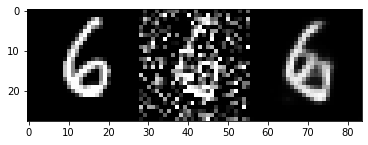

In [286]:
im=91
test = x_test[im:im+1]
test = test + np.random.normal(0.0,1.0,test.shape)
preds = sess.run(model.recon_im, feed_dict={model.im:test})
plt.imshow(np.concatenate((x_test[im],test[0],preds[0]),axis=1), cmap='gray',vmin=-1,vmax=1)
plt.show()


In [288]:
sess.close()

Similar to the previous questions, train the DAE by looping over all the mini-batches. For proper training you should input enough noisy versions per image. 
- Plot the training/validation curves and discuss why your trained model is not under/over fitting.
When the training is finished, inject noise into the test data and reconstruct them through a forward pass. For each test image, input 20 noisy versions of it and compute the average accuracies. 

- Test the robustness of the trained network to different levels of noise, demonstrate the results (figure or Table) and discuss them in your report. 
- Why this architecture is able to remove noise from data? 

### Task 8 - Building a Variational AutoEncoder (VAE) 12 Points

<br>

#### Why use a VAE?

<br>

<p style='text-align: justify;'>
Building on the standard AutoEncoder which was a way of learning some lower dimensional manifold the data could lie on, we want to impose a form of regularisation, that is, we want some topology structure. We want inputs to the AutoEncoder that have a certain structure to be mapped to similar areas in this lower dimensional latent space. But the standard AutoEncoder merely learns how to essentially compress data. In this task, we are interested in learning a more structured latent space where we can sample in this space to then generate a new image that theoretically belongs to the same dataset.
    
In this exercise, we will assume the structure in the latent space follows a standard bi-variate Gaussian i.e. mean $\begin{bmatrix}0\\0\end{bmatrix}$ and covariance $\begin{bmatrix}1&0\\0&1\end{bmatrix}$. This assumption is for simplicity but we can infact assume other distributions (outside the scope for this exercise). We will be using the MNIST dataset for this task.
    
</p>

<br>

#### Architecture

<img src="vae-diagram.png" alt="The Variational AutoEncoder" title="VAE Architecture" />

<br>

#### Notation

<br>

Before diving into some maths, lets define a few terms:
1. $\mathbf{X}$: the dataset distribution we wish to generate from
2. $\mathbf{z}$: the compressed latent variable which quantifies a set of attributes of our dataset
3. $\boldsymbol{\theta}$ : the parameters for the ***encoder*** network
4. $\boldsymbol{\phi}$: the parameters for the ***decoder*** network
5. $p(\mathbf{z})$: the probability of the compressed latent space (given it should follow a standard normal)
6. $q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{X})$: the conditional probability distribution of sampling the compressed latent variable given the dataset approximated by our encoder network with parameters $\boldsymbol{\phi}$
7. $p_{\boldsymbol{\theta}}(\mathbf{X}|\mathbf{z})$: the conditional probability distribution of generating the dataset given the compressed latent space by our decoder network with parameters $\boldsymbol{\theta}$

<br>

#### Optimisation

<br>

The quantity we are interested in maximising for the $i$-th observation is:

$
\begin{align}
    \log p (\mathbf{x}_i) && \text{which can be rewritten as...}\\
    &= \int_{\mathbf{z}\in\mathcal{Z}} q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) \log p (\mathbf{x}_i) \text{d}\mathbf{z} & \text{as the integral over a distribution is 1...}\\
    &= \int_{\mathbf{z}\in\mathcal{Z}} q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i)[-\log p (\mathbf{z}|\mathbf{x}_i) + \log p(\mathbf{z}) + \log p_\boldsymbol{\theta}(\mathbf{x}_i|\mathbf{z})]\text{d}\mathbf{z} & \text{consider Baye's rule...}\\
    &= \int_{\mathbf{z}\in\mathcal{Z}} -q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) \log \frac{p (\mathbf{z}|\mathbf{x}_i)}{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} + q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i)\log \frac{p (\mathbf{z})}{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} + q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) \log p_\boldsymbol{\theta}(\mathbf{x}_i|\mathbf{z})\text{d}\mathbf{z}\\
    &= \text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z}|\mathbf{x}_i)) - \text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z})) + \mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} [\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})]\\
    &=  \text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z}|\mathbf{x}_i)) + \mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i) &\text{where the last two terms have been grouped as $\mathcal{L}$}
\end{align}
$

<br>


As the first term in the line above is intractable to compute, we can say that $\log p_\boldsymbol{\theta} (\mathbf{x}_i) \ge \mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i)$ as the KL-divergence is a distance measure (and hence non-negative) and $\mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i)$ is known as the **variational lower bound**. Instead of maximising the log probability directly, we can instead maximise this lower bound! If you are unfamiliar with the KL-divergence, check out this [Wikipedia](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

<br>

The lower bound can be clearly seen as two main components:

$
\begin{align}
\mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i) = \color{blue}{\mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} [\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})]} - \color{green}{\text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z}))}
\end{align}
$
+ <font color='blue'> How well can we reconstruct our original data from the latent space?</font>
+ <font color='green'> How similar is the latent space to a standard Gaussian?</font>

A remark on the second point - we are trying to find a Gaussian distribution manifold in latent space for our dataset. This is known as a *variational* method which should be part of the Bayesian Machine Learning module.

<br>

#### Derivations

Given that $\mathbf{\hat{x}}_i$ is a draw from $p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})\sim\mathcal{N}(\mathbf{x},\sigma^2\mathbf{I})$, the expectation of $\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})$ can be computed as:

$
\begin{align}
\mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} [\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})] &= -\frac{m}{2}\log 2\pi\sigma^2 - \frac{1}{2}(\mathbf{\hat{x}}_i - \mathbf{x}_i)^\text{T}(\sigma^2\mathbf{I})^{-1}(\mathbf{\hat{x}}_i - \mathbf{x}_i)\\
\mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{Z}|\mathbf{X})} [\log p_{\boldsymbol{\theta}} (\mathbf{X}|\mathbf{Z})] &\propto \sum_{i = 1}^{i = n}\sum_{j = 1}^{j = m} (\hat{x}_{ij} - x_{ij})^2 & \text{as everything else is just a constant}
\end{align}
$

<font color='red'>Given that $q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i) \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2\mathbf{I})$, derive the KL-divergence term between this and $p_\boldsymbol{\theta} (\mathbf{z})$ i.e. $\text{D}_{\text{KL}} (\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2\mathbf{I}), \mathcal{N}(0, \mathbf{I}))$:</font>

$
\begin{align}
\text{D}_{\text{KL}} (\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2\mathbf{I}), \mathcal{N}(0, \mathbf{I})) &= \int_{\mathbf{z}\in\mathcal{Z}} ?\text{ d}\mathbf{z}
\end{align}
$

Further readings: There are many useful online tutorials that provide deep insight as how VAEs work or to implement them; for instace [tutorial1](https://arxiv.org/abs/1606.05908) [tutorial2](http://ruishu.io/2018/03/14/vae/). 

#### Defining the Data and Helper Functions

In [569]:
from scipy.stats import norm
(x_train, y_train),(x_test, y_test) = mnist.load_data()

image_size       = x_train.shape[1]
original_dim     = image_size * image_size

# Flatten each image to be a vector (you can try convolutional layers as an extension)
x_train          = np.reshape(x_train, [-1, original_dim])
x_test           = np.reshape(x_test, [-1, original_dim])
x_train          = x_train.astype('float32') / 255
x_test           = x_test.astype('float32') / 255

# Visualisation parameters (for after the implementation of the VAE - start playing with these after the VAE seems to work!)
n                = 29 # Number of digits to show per row / col
dsize            = 28 # Digit size

z1               = norm.ppf(np.linspace(0.01, 0.99, n))
z2               = norm.ppf(np.linspace(0.01, 0.99, n))
z_grid           = np.dstack(np.meshgrid(z1, z2))

Zf               = lambda x : sess.run(z_mean, feed_dict = {t_X : x})
Xf               = lambda z_grid : sess.run(t_X_hat, feed_dict = {z : z_grid.reshape(n * n, nlatent)}).reshape(n, n, dsize, dsize)

def get_batch(*args, size):
    """ Loops through each argument in batches of [size] """
    
    n = len(args[0])
    if size is None or size >= n:
        yield from args
        return None
    r = np.random.permutation(n)
    for i in range(n // size + 1):
        yield (arg[r[i * size : (i + 1) * size]] for arg in args)
        
def visualise(X, y, sep = 2):
    """ Visualise the mapped 2D manifold """
    # Feel free to modify this code for your visualisations...
    Z = Zf(x_test)
    Xh = Xf(z_grid)

    plt.figure(figsize = (12, 10))
    plt.scatter(Z[:, 0], Z[:, 1], c = y)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")

    plt.figure(figsize = (12, 10))
    plt.imshow(np.block(list(map(list, Xh))), cmap = 'gray')
    start_range    = dsize // 2
    end_range      = n * dsize + start_range
    pixel_range    = np.arange(start_range, end_range, dsize)
    sample_range_x = np.round(z1, 2)
    sample_range_y = np.round(z2, 2)
    plt.xticks(pixel_range[::sep], sample_range_x[::sep])
    plt.yticks(pixel_range[::sep], sample_range_y[::sep])

#### Task 8.1 Implementation of VAE

<br>

The simpler implementation of the VAE is to build off the MLP i.e. no convolutional layers. The code below is designed for this but feel free to swap out this assumption for convolutions should you feel more confident. Feel free to add `tf.summary` definitions in a similar way to previous tasks for tensorboard visualisations.

 #### Note: If implementing task 8.1 in TF (as guided bellow) is not straightforward for you, use an easier option: [Keras](https://keras.io/examples/variational_autoencoder/) implementation of VAE. In these case, you will be marked down 4 points but you can immediately proceed to task 8.2. 

In [557]:
# Hyperparameters...
layers   = [512, 256, 128]
nlatent  = 2
batch    = 64
epochs   = 20
alpha    = 1e-3

# General dtype to use
dtype    = 'float32'

# Number of features
m        = x_train.shape[1]

# Reset the graph to ensure blank graph initially...
tf.reset_default_graph()

# Define placeholder for 'X' data
t_X      = tf.placeholder(dtype = dtype, shape = [None, m], name = 'X')

# Define how t_X maps to the layer before the latent space
with tf.name_scope('Encoder'):
    h        = t_X
    for i, layer in enumerate(layers, 1):
        with tf.name_scope(f'Layer_{i}'):
            ######### Map how we get from the previous layer to the next hidden layer #########
            h    = tf.layers.Dense(layer, activation='relu')(h)
    
# Define how we get the mean and variance from the previous hidden layer
with tf.name_scope('Latent'):
    with tf.name_scope('Mean'):
        z_mean   = tf.layers.Dense(nlatent, activation='linear')(h)

    with tf.name_scope('Variance'):
        z_var    = tf.layers.Dense(nlatent, activation='relu')(h)+1e-8
        
    # Code the "reparameterisation trick"
    with tf.name_scope('Sample'):
        epsilon  = tf.random.normal(tf.shape(z_mean) ,z_mean , tf.sqrt(z_var)) 
        z_sample = z_mean + z_var*epsilon
        z        = tf.placeholder_with_default(z_sample, shape = [None, nlatent], name = 'z')
    
# Define how "z" decodes to our reconstructed "t_X" estimate
with tf.name_scope('Decoder'):
    h        = z
    for i, layer in enumerate(layers[::-1], 1):
        with tf.name_scope(f'Layer_{i}'):
            h    = tf.layers.Dense(layer,activation='relu')(h)
    
    with tf.name_scope('Final'):
        t_X_hat  = tf.layers.Dense(m, activation='sigmoid')(h)

# Define the loss function as defined in the derivation section
with tf.name_scope('Loss'):
    with tf.name_scope('AutoEncoder'):
        # The normal AutoEncoder loss should measure how far our t_X_hat is from t_X
        loss_ae  = tf.reduce_sum((t_X-t_X_hat)**2, axis=-1)
        tf.summary.scalar('loss_ae', tf.reduce_mean(loss_ae))
        
    with tf.name_scope('KL_Divergence'):
        # The KL-divergence between z and a standard normal you derived earlier
        loss_kl  = 0.5*tf.reduce_sum(z_var+z_mean**2-tf.log(z_var),axis=-1)
        tf.summary.scalar('loss_kl', tf.reduce_mean(loss_kl))
        
    loss = tf.reduce_mean(loss_ae+loss_kl , name = 'loss')
    tf.summary.scalar('loss', loss)
    
# Define final components before training the model
optim    = tf.train.AdamOptimizer(alpha).minimize(loss)
train    = {t_X : x_train}
merged_summ = tf.summary.merge_all()
sess     = tf.InteractiveSession()
writer   = tf.summary.FileWriter('./VAE_MLP_logdir', sess.graph)
sess.run(tf.global_variables_initializer())

# Gradient descent loop with verbose loss check...
# Hopefully we see our loss reduce!
for i in range(20):
    losses  = []
    for xb, in get_batch(x_train, size = batch):
        nb = len(xb)
        sess.run([optim], feed_dict = {t_X : xb})
        
        losses.append(nb * sess.run(loss, feed_dict = {t_X : xb}))
        print(f'\rIteration {i:2d}: loss = {losses[-1] / nb:6,.2f}', end = '')
    writer.add_summary(sess.run(merged_summ, feed_dict = {t_X: x_test}) ,i)
    print(f'\rIteration {i:2d}: loss = {sum(losses) / len(x_train):6,.2f}')

Iteration  0: loss =  43.98
Iteration  1: loss =  37.11
Iteration  2: loss =  34.99
Iteration  3: loss =  33.82
Iteration  4: loss =  33.30
Iteration  5: loss =  32.61
Iteration  6: loss =  32.11
Iteration  7: loss =  31.64
Iteration  8: loss =  31.43
Iteration  9: loss =  31.52
Iteration 10: loss =  31.10
Iteration 11: loss =  30.95
Iteration 12: loss =  30.81
Iteration 13: loss =  30.83
Iteration 14: loss =  30.87
Iteration 15: loss =  30.56
Iteration 16: loss =  30.38
Iteration 17: loss =  30.30
Iteration 18: loss =  30.48
Iteration 19: loss =  30.36


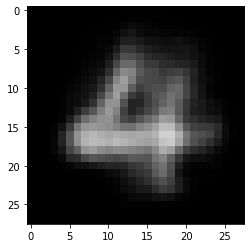

In [599]:
#Try generating some random images from the network
rnd=np.random.normal((0,0),(1,1),(1,nlatent))
pic=sess.run(t_X_hat, feed_dict= {z:rnd})
plt.imshow(pic.reshape(28,28),cmap='gray',vmin=0, vmax=1)
plt.show()

#### Visualisation Check

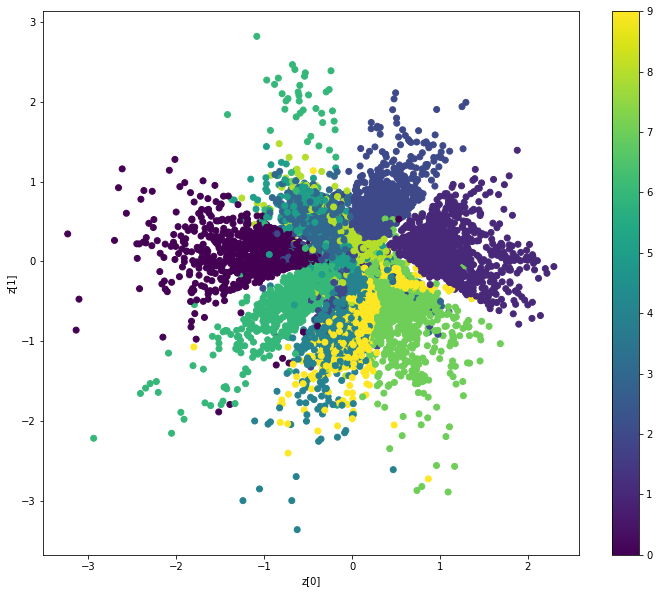

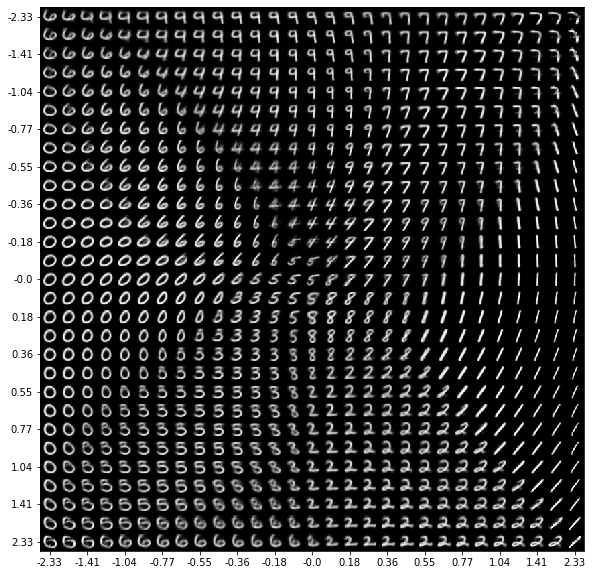

In [570]:
visualise(x_test, y_test)

####  Task 8.2

<br>

 - Plot the learning curve for your VAE
 - Generate new handwritten digits from your model by sampling `Z` = $\mathbf{z}\in\mathbb{R}^{n,2}$ and running `sess.run(t_X_hat, feed_dict = {z : Z))` in a separate code cell
     - Discuss how good / bad are these images?
         - Why are they good / bad? (consider the assumptions of your implementation of the VAE)
 - From observing your learnt manifold (by using the `visualise` function or otherwise), draw a comparison between the direct mapped points on your manifold (scatter plot) and the images that lay on the manifold (imshow)
     - Why are some points images more mixed than others?
     - Can we be smarter in where we should sample to get *better* generated handwritten digits?